In [1]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from skimage import filters, morphology
import skimage
import os
import random
import cv2

print(np.__version__)

%matplotlib inline

1.15.4


In [2]:
imagesPath = "../dataset/"
N = 200

# birdsPath = imagesPath + "birds/"
# testImageName = "birds/001.Black_footed_Albatross/Black_footed_Albatross_0027_2134388676.jpg"

In [3]:
def plot_images(images, _cmap=None):
    fig=plt.figure(figsize=(8, 16))
    rows = len(images)
    columns = 1
    for i, image in enumerate(images):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(image, cmap=_cmap)
    plt.show()
    

Fetching from  ['birds', 'drones']


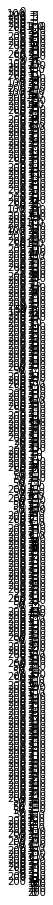

200


In [4]:

images = []
imageNames = []

directories = os.listdir(imagesPath)
directories.sort()
print("Fetching from ", directories)


for directory in directories:
    ims = os.listdir(imagesPath + directory + '/')
    ims.sort()
    numOfImages = len(ims)
    for imageName in ims:
        imageNames.append((imagesPath + directory + '/' + imageName, directory))
#         images.append(Image.open(imagesPath + directory + '/' + imageName).convert('L'))

random.shuffle(imageNames)

for i in range(N):
    images.append(Image.open(imageNames[i][0]).convert('L'))
# images.append(Image.open("/Users/dheeraj/Downloads/IMG_0330.JPG").convert("L"))
plot_images(images)
    
numOfImages = len(images)
print(numOfImages)

0.14.1


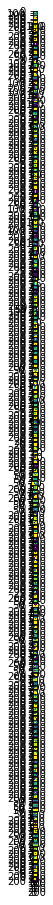

In [5]:
# Run Gaussian Filter
print(skimage.__version__)

smooth = []
for image in images:
#     edge = filters.laplace(np.asarray(image))
    smooth.append(filters.gaussian(np.asarray(image), 1))

plot_images(smooth)
    
# smoothIm = filters.gaussian(np.asarray(im), 1)
# print(type(smoothIm))
# imshow(smoothIm)

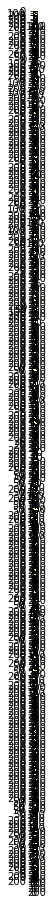

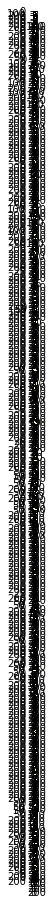

In [6]:
# Run Sobel Filter
edges = []

for image in smooth:
    sobel = filters.prewitt(image)
    edge = filters.threshold_local(sobel, 3)
    otsu = filters.threshold_otsu(edge)
    edges.append(edge > otsu)
    
#     low = 0.1
#     high = 0.35

#     lowt = (sobel > low).astype(int)
#     hight = (sobel > high).astype(int)
#     hyst = filters.apply_hysteresis_threshold(sobel, low, high)

#     edges.append(hyst)
    
plot_images(edges, 'magma')
    
for i, image in enumerate(edges):
#     edges[i] = imfill(edges[i], 'holes')
#     edges[i] = morphology.erosion(edges[i], morphology.disk(1))
#     edges[i] = morphology.remove_small_holes(edges[i], 100)
    edges[i] = morphology.remove_small_objects(edges[i], 300)
#     edges[i] = morphology.thin(edges[i])
#     edges[i] = np.array(edges[i], dtype=np.uint8)
#     points = cv2.findNonZero(edges[i])
#     for j in range(10):
#         print(points[j])
#     print(len(points))
#     edges[i] = morphology.convex_hull_image(edges[i])
#     edges[i] = morphology.opening(edges[i], morphology.disk(2))
plot_images(edges, 'magma')
# imshow(hight + hyst, cmap='magma')

(180,)
0 173 15 156
19 207 45 177
35 180 48 179
58 184 80 138
0 102 0 83
17 205 1 193
17 196 13 192
7 218 0 224
30 31 30 31
223 224 223 224
0 48 0 38
12 69 0 76
17 180 100 215
23 195 56 156
6 219 32 168
0 115 49 83
4 136 29 147
15 204 14 224
0 145 27 120
8 171 61 188
0 224 0 224
40 139 8 99
41 185 57 211
44 111 12 41
0 221 0 221
59 190 14 176
0 216 6 203
15 222 53 170
0 224 52 163
0 224 5 147
8 216 28 199
44 178 29 223
8 210 41 167
0 214 44 216
8 76 9 74
60 177 29 180
38 75 83 132
0 215 25 224
0 224 36 189
26 198 58 134
20 202 70 165
30 31 30 31
26 216 62 170
34 185 7 205
98 99 82 83
40 147 16 149
0 224 72 204
15 209 21 221
40 184 59 136
4 224 37 216
0 149 0 148
34 202 15 215
0 224 52 174
35 88 9 73
9 215 29 195
59 188 0 224
11 213 18 157
23 96 142 224
0 215 50 224
30 31 30 31
36 187 67 167
10 215 8 216
4 224 20 202
0 224 23 201
16 204 52 153
0 224 5 223
39 187 39 186
28 192 0 206
7 70 4 97
21 207 4 221
10 223 17 188
0 224 46 177
35 189 23 185
5 221 25 193
0 224 23 201
9 196 22 169
1 2

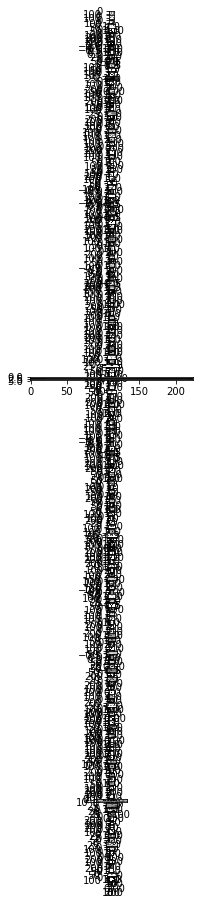

In [7]:
print(edges[0][0, :].shape)

for j, edge in enumerate(edges):
    l = 0
    d = edge.shape[0] - 1
    u = 0
    r = edge.shape[1] - 1
    for i in range(l, r):
        maxi = np.amax(edge[:, i])
        if (maxi == True):
            break
        l = i
    
    for i in range(r, l, -1):
        maxi = np.amax(edge[:, i])
        if (maxi == True):
            break
        r = i
    
    for i in range(u, d):
        maxi = np.amax(edge[i, :])
        if (maxi == True):
            break
        u = i
    
    for i in range(d, u, -1):
        maxi = np.amax(edge[i, :])
        if (maxi == True):
            break
        d = i
    
    images[j] = images[j].crop((l, u, r, d))
    
    print(l, r, u, d)
    
plot_images(images)

## Get straight lines

In [8]:
print(cv2.__version__)

3.4.3


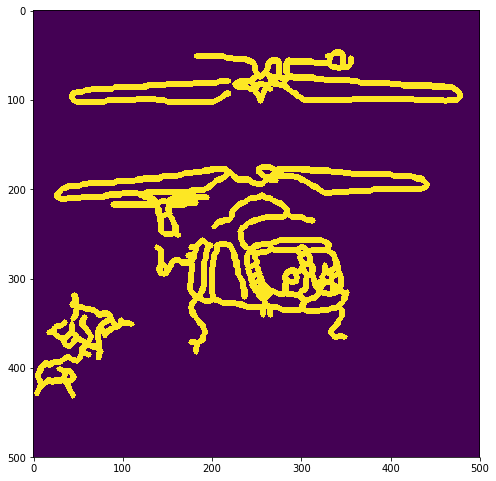

[65.0, 62.0, 57.0, 56.0, 56.0, 55.0, 54.0, 52.0, 51.0, 49.0, 49.0, 48.0, 48.0, 48.0, 47.0, 46.0, 46.0, 46.0, 45.0, 45.0, 44.0, 42.0, 41.0, 41.0, 40.0, 40.0, 40.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.019992006393608, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 2

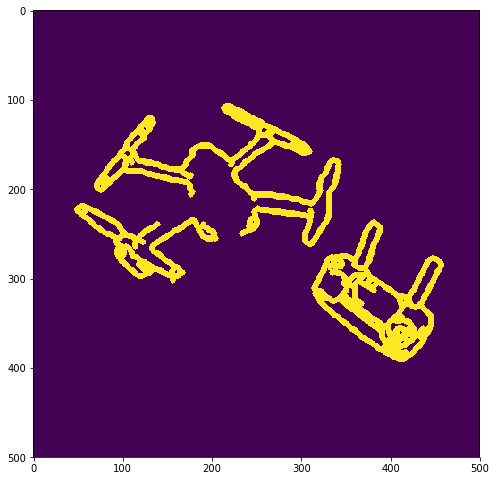

[49.0, 44.0, 42.0, 41.0, 41.0, 41.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.

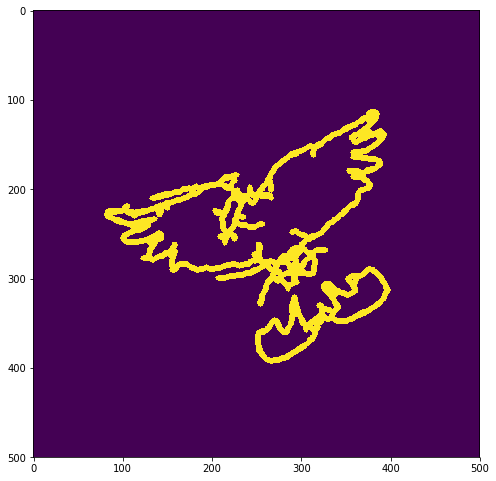

[45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 41.0, 41.0, 36.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.

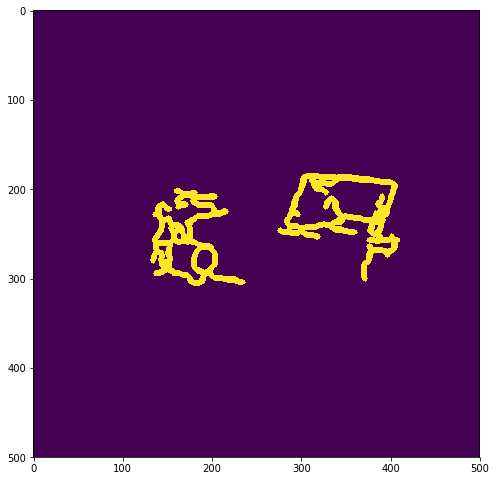

[63.0, 54.0, 53.0, 49.0, 42.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 33.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.

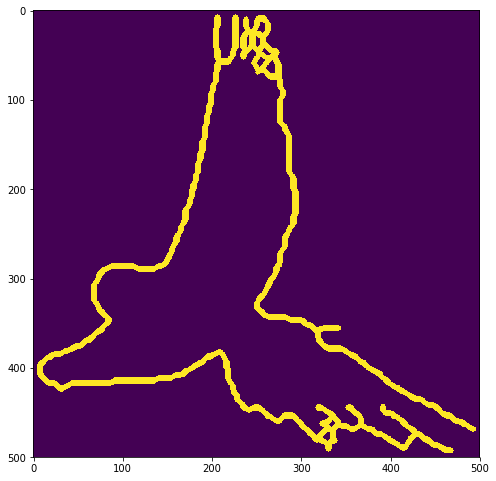

[77.0, 76.0, 73.0, 71.0, 70.0, 63.0, 61.0, 61.0, 60.0, 58.0, 57.0, 57.0, 54.0, 52.0, 52.0, 51.0, 51.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 46.0, 45.0, 45.0, 45.0, 42.0, 42.0, 41.0, 40.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

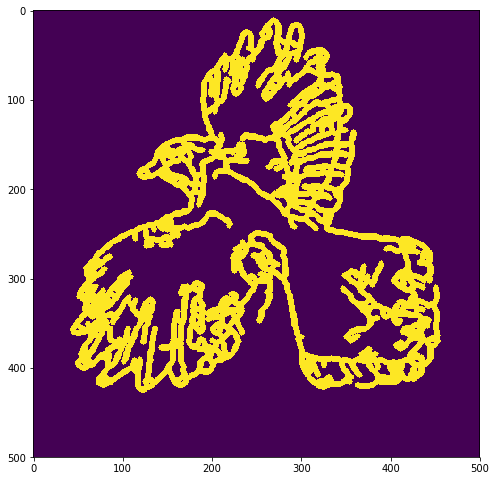

[97.0, 95.0, 92.0, 91.0, 78.0, 75.0, 72.0, 72.0, 72.0, 71.0, 70.0, 70.0, 70.0, 69.0, 69.0, 68.00735254367721, 68.0, 67.0, 66.0, 64.0, 63.0, 63.0, 62.0, 62.0, 61.0, 61.0, 61.0, 60.0, 59.0, 59.0, 59.0, 59.0, 58.0, 58.0, 58.0, 58.0, 58.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 56.0, 55.0, 55.0, 54.0, 54.0, 54.0, 54.0, 54.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 47.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38

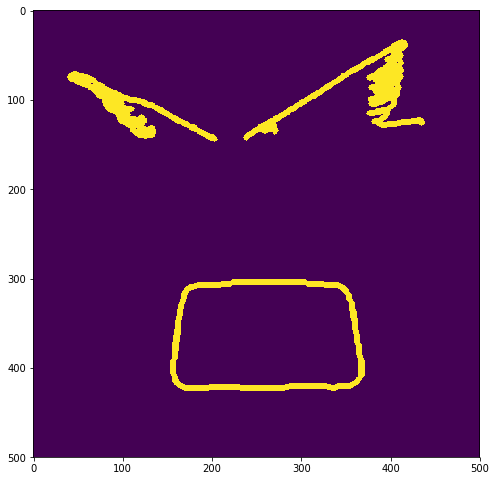

[73.0, 72.0, 72.0, 72.0, 72.0, 71.0, 63.0, 62.0, 61.0, 61.0, 59.0, 54.0, 54.0, 53.0, 51.0, 51.0, 50.0, 50.0, 49.0, 49.0, 48.0, 48.0, 47.0, 46.0, 45.0, 45.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 37.0, 36.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 30.0, 29.0, 29.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.

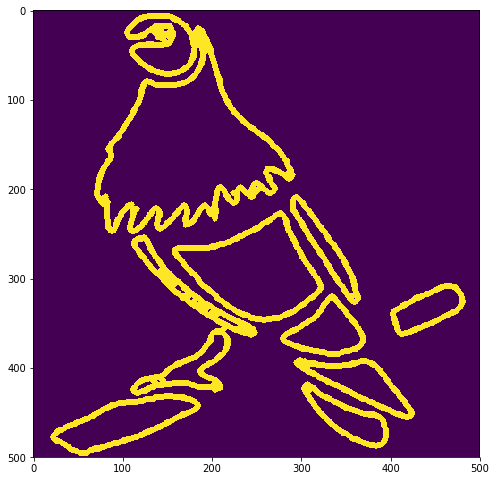

[50.0, 47.0, 44.0, 42.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 31.0, 30.0, 29.0, 29.0, 29.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.

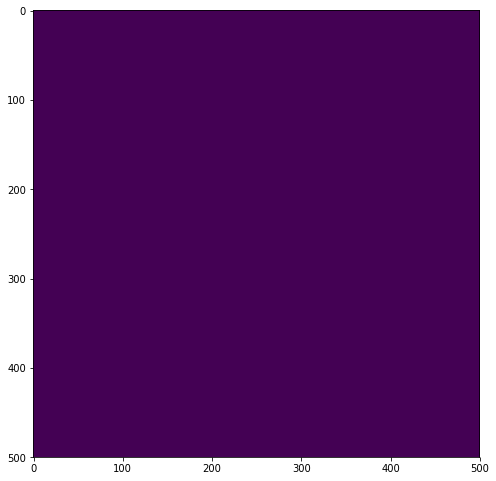

[]


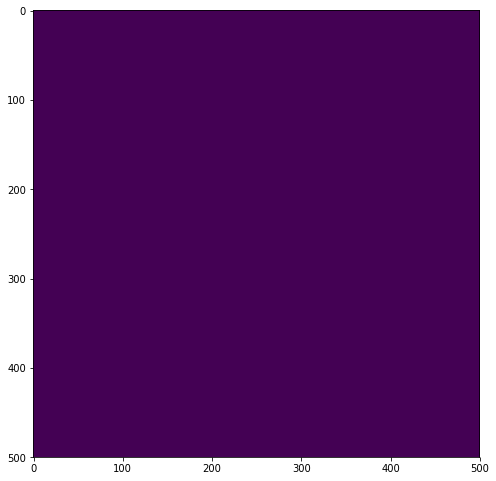

[]


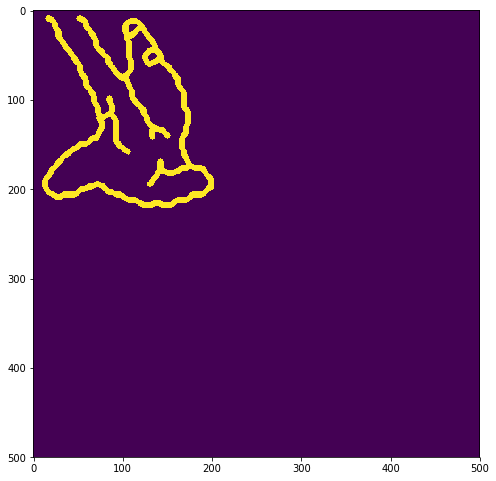

[79.0, 52.0, 49.0, 48.0, 47.0, 44.0, 43.0, 43.0, 42.0, 40.0, 38.0, 36.0, 36.0, 35.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 30.0, 29.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.

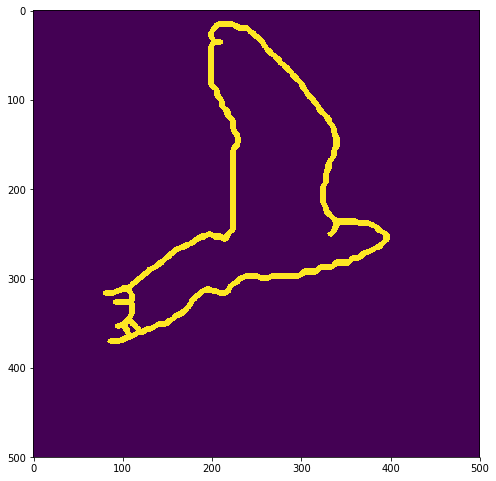

[122.0, 98.0, 98.0, 98.0, 97.0, 96.0, 95.0, 77.0, 72.0, 70.0, 68.0, 56.0, 50.0, 50.0, 49.0, 48.0, 47.0, 46.0, 46.0, 44.0, 43.0, 42.0, 42.0, 38.0, 34.0, 30.0, 29.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 23.0, 22.0, 22.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0,

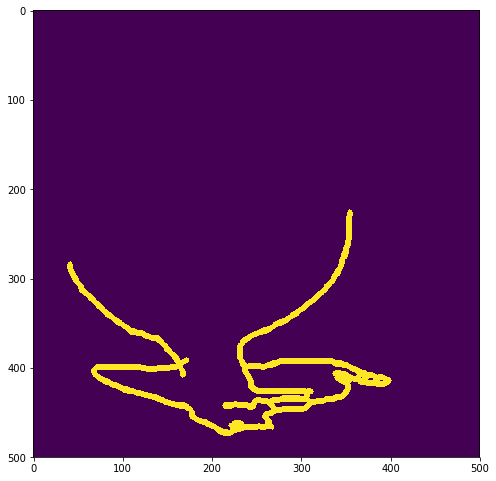

[49.0, 48.0, 47.0, 46.0, 42.0, 39.0, 37.0, 32.0, 30.0, 28.0, 28.0, 26.0, 25.0, 25.0, 25.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 

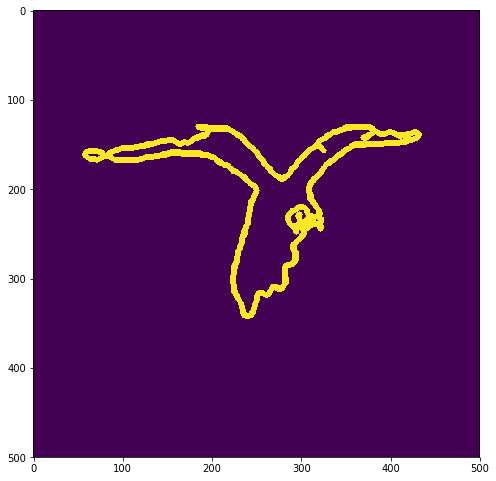

[54.0, 46.0, 38.0, 34.0, 32.0, 32.0, 32.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.

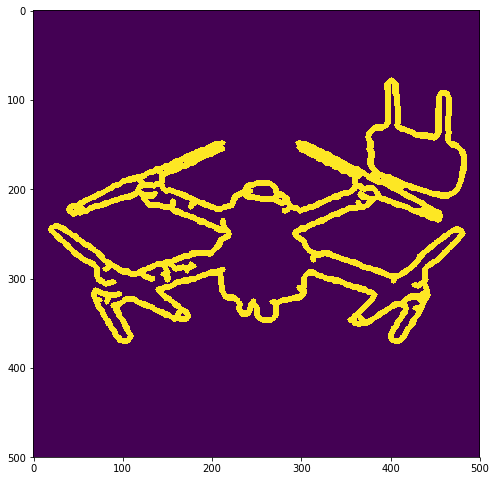

[59.0, 59.0, 59.0, 58.0, 58.0, 57.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 51.0, 50.0, 50.0, 50.0, 49.0, 49.0, 48.0, 47.0, 46.0, 46.0, 46.0, 45.0, 45.0, 44.0, 44.0, 43.0, 41.0, 40.0, 40.0, 39.0, 36.0, 36.0, 36.0, 35.0, 34.0, 33.0, 31.0, 31.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

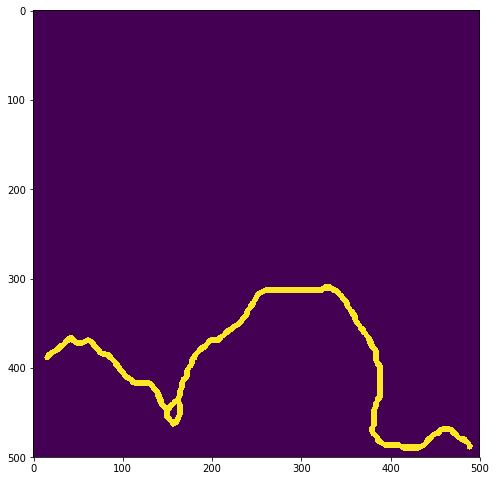

[67.0, 63.0, 45.0, 45.0, 44.0, 44.0, 44.0, 42.0, 41.0, 40.0, 39.0, 38.0, 38.0, 36.0, 33.0, 32.0, 32.0, 32.0, 29.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 19.0, 19.0, 19.0, 19.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0,

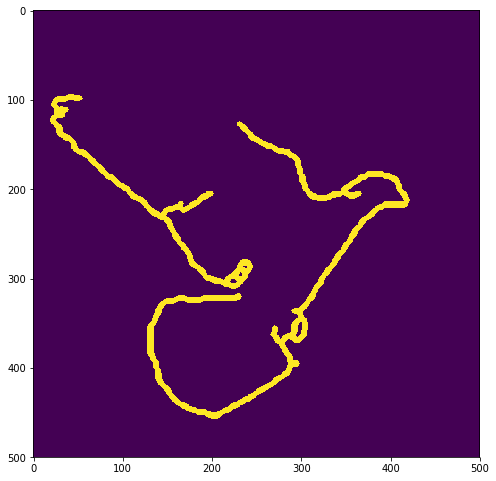

[58.0, 48.0, 44.0, 41.0, 39.0, 37.0, 35.0, 34.0, 32.0, 31.0, 28.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.

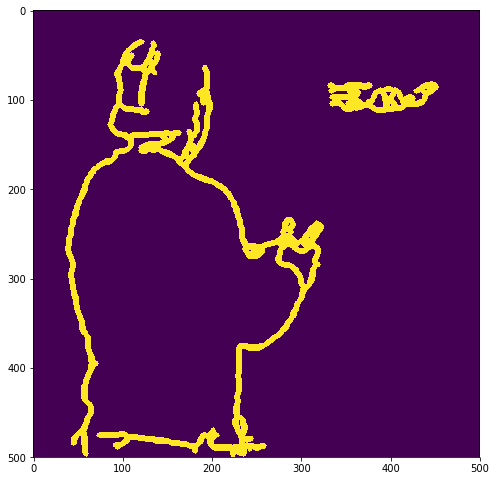

[104.0, 99.0, 96.0, 86.0, 85.0, 81.0, 79.0, 76.0, 69.0, 68.0, 58.0, 54.0, 54.0, 50.0, 50.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 46.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 39.0, 39.0, 39.0, 39.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22

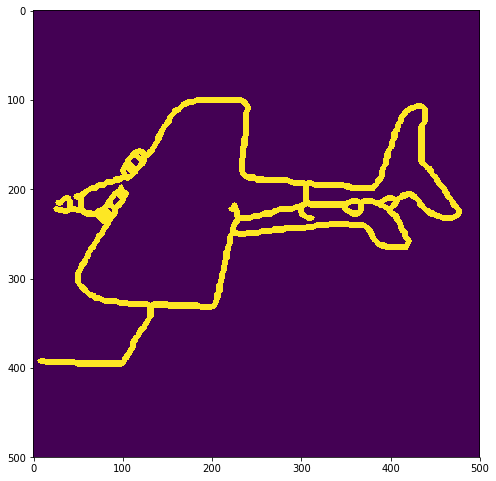

[76.0, 73.0, 70.0, 70.0, 69.0, 64.0, 52.0, 49.0, 48.0, 46.0, 45.0, 43.0, 42.0, 42.0, 39.0, 39.0, 36.0, 36.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

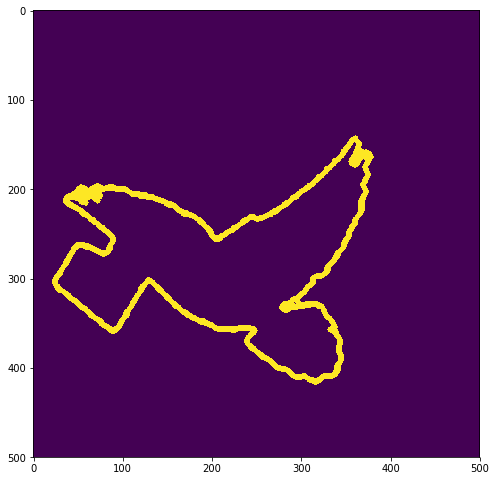

[56.0, 54.0, 47.0, 43.0, 40.0, 39.0, 38.0, 38.0, 35.0, 34.0, 34.0, 33.0, 32.0, 30.0, 29.0, 28.0, 27.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.

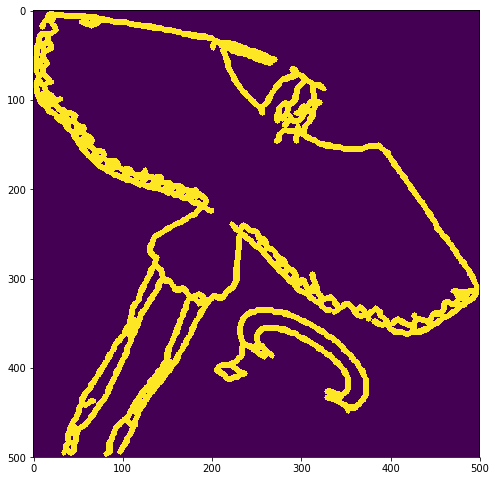

[90.0, 78.0, 75.0, 71.0, 68.0, 61.0, 61.0, 56.0, 56.0, 54.0, 51.0, 50.0, 49.0, 48.0, 48.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 45.0, 44.0, 44.0, 43.0, 43.0, 42.0, 42.0, 42.0, 41.0, 40.0, 40.0, 39.0, 39.0, 39.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.

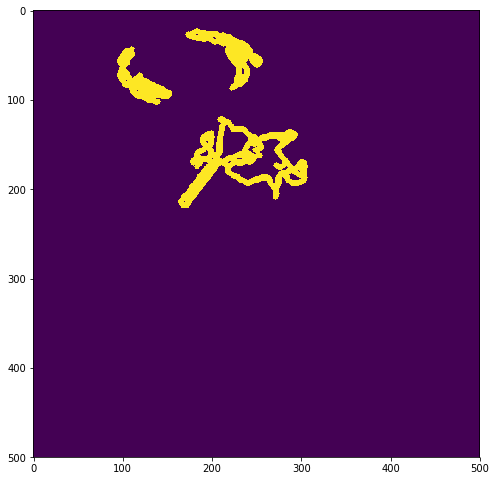

[56.0, 55.0, 54.0, 54.0, 53.0, 53.0, 53.0, 52.0, 52.0, 51.0, 51.0, 47.0, 45.0, 45.0, 43.0, 42.0, 41.0, 40.0, 40.0, 40.0, 38.0, 36.0, 35.0, 35.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

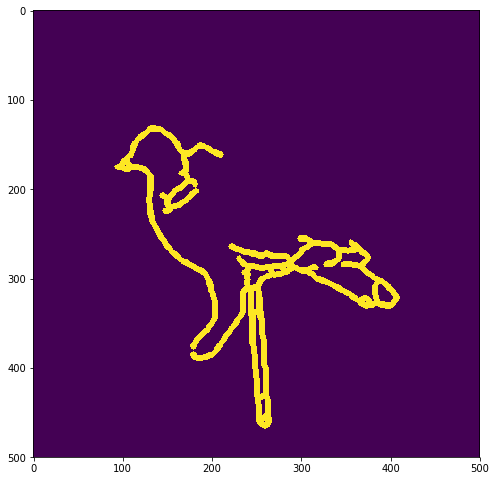

[111.0, 106.0, 105.0, 104.0, 99.0, 97.0, 97.0, 93.0, 90.0, 89.0, 84.0, 83.0, 82.0, 78.0, 77.0, 76.0, 70.0, 69.0, 67.0, 67.0, 63.0, 61.0, 58.0, 57.0, 57.0, 57.0, 57.0, 54.0, 54.0, 52.0, 51.0, 51.0, 46.0, 46.0, 43.0, 42.0, 40.0, 39.0, 36.0, 36.0, 36.0, 35.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 29.0, 28.0, 28.0, 27.0, 26.0, 26.0, 25.0, 25.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0,

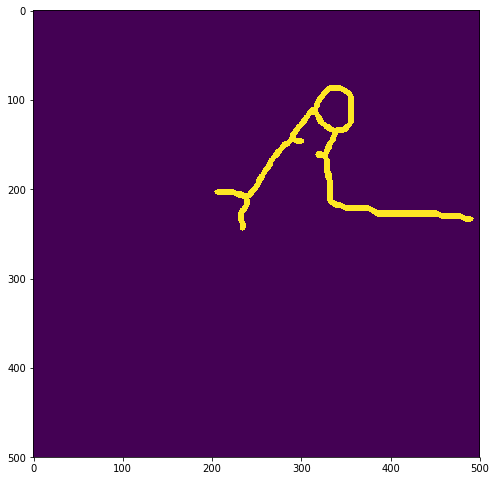

[65.0, 50.0, 49.0, 44.0, 43.0, 41.0, 39.0, 39.0, 37.0, 37.0, 35.0, 35.0, 33.0, 30.0, 29.0, 28.0, 27.0, 27.0, 27.0, 26.0, 24.0, 23.0, 23.0, 22.0, 21.0, 21.0, 20.0, 20.0, 19.0, 19.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0

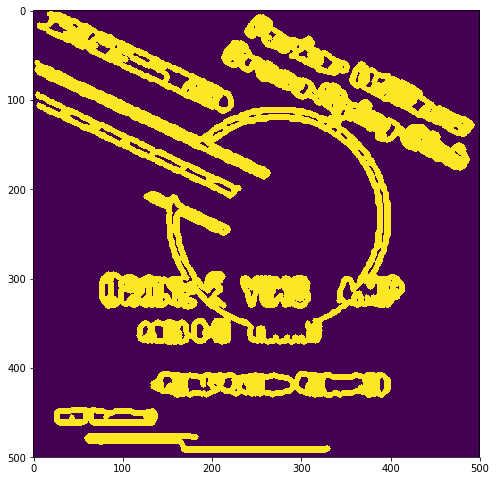

[91.0, 88.0, 80.0, 79.0, 77.0, 76.0, 75.0, 73.0, 64.0, 61.0, 61.0, 61.0, 60.0, 60.0, 59.0, 58.0, 57.0, 55.0, 52.0, 50.0, 50.0, 50.0, 49.0, 49.0, 48.0, 48.0, 47.0, 46.0, 46.0, 45.0, 43.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.014282800023196, 35.014282800023196, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.015148038438355, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.

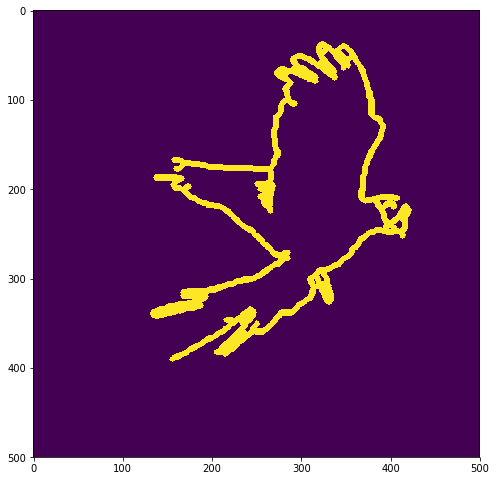

[60.00833275470999, 59.0, 58.0, 57.0, 55.0, 53.0, 52.0, 52.0, 52.0, 47.0, 43.0, 42.0, 40.0, 40.0, 39.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16

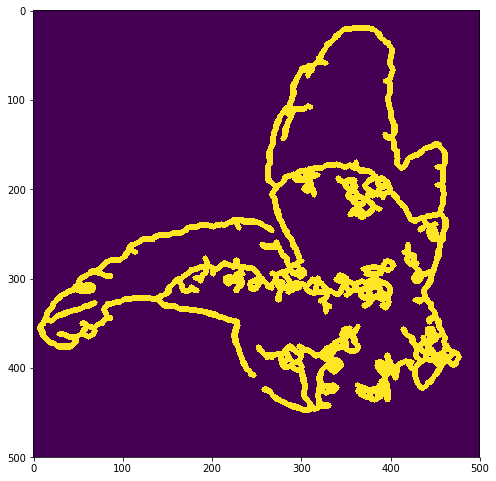

[113.0, 92.0, 91.0, 84.0, 71.0, 65.0, 61.0, 57.0, 55.0, 54.0, 53.0, 53.0, 49.0, 49.0, 49.0, 49.0, 46.0, 46.0, 45.0, 45.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25

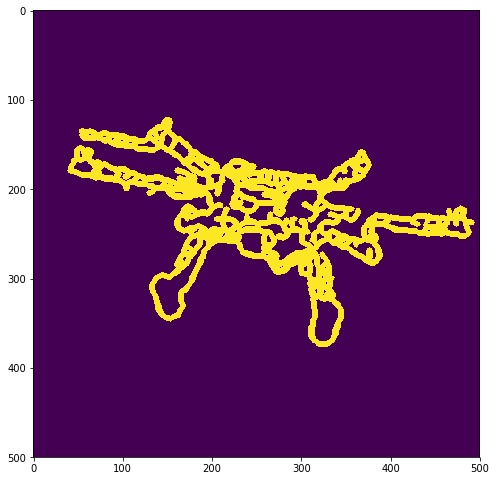

[73.0, 73.0, 71.0, 65.0, 59.0, 58.0, 52.0, 51.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 47.0, 46.0, 46.0, 45.0, 45.0, 44.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 38.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.

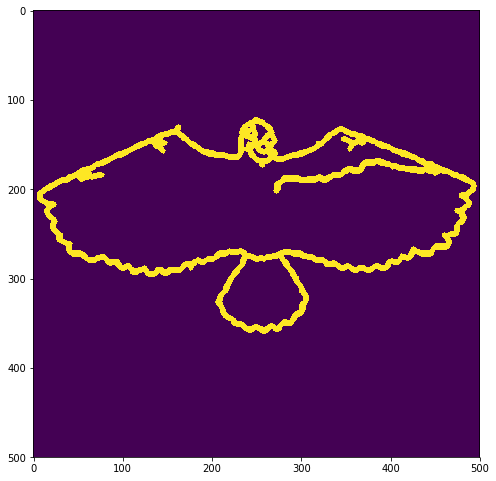

[44.0, 36.0, 35.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 30.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.

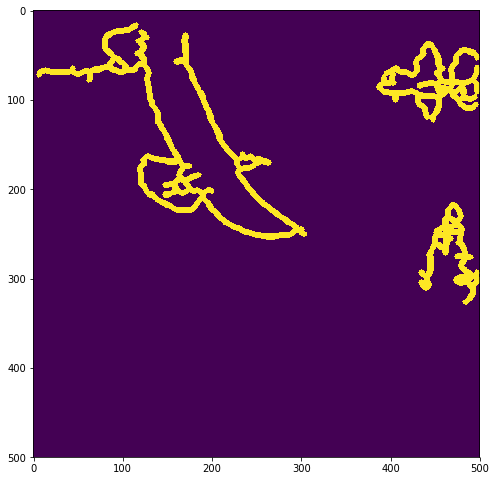

[68.0, 66.0, 62.0, 53.0, 52.0, 52.0, 51.0, 51.0, 45.0, 44.0, 44.0, 44.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 37.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

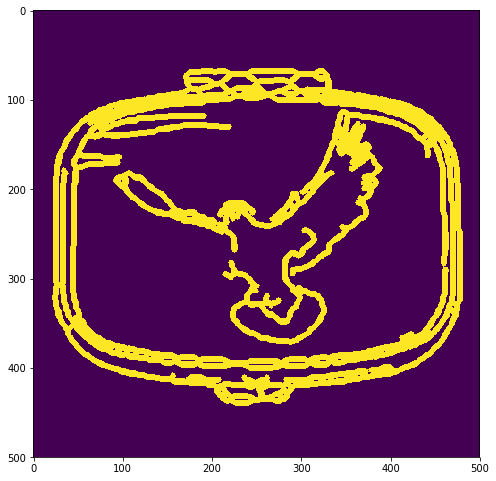

[198.0, 193.0, 185.0, 182.0, 181.0, 181.0, 175.0028571195339, 174.0, 174.0, 173.0, 170.0, 167.0, 163.0, 163.0, 160.0, 160.0, 160.0, 160.0, 159.0, 157.0, 152.0, 147.0, 144.0, 137.0, 135.0, 133.0, 128.00390619039717, 128.0, 124.0, 123.0, 121.0, 120.0, 118.0, 117.0, 114.0, 109.0, 106.0, 87.0, 87.0, 81.0, 77.0, 74.0, 73.0, 70.0, 70.0, 57.0, 54.0, 53.0, 53.0, 53.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 47.0, 45.0, 44.0, 44.0, 43.0, 43.0, 42.0, 42.0, 41.0, 41.0, 40.0, 39.0, 39.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 2

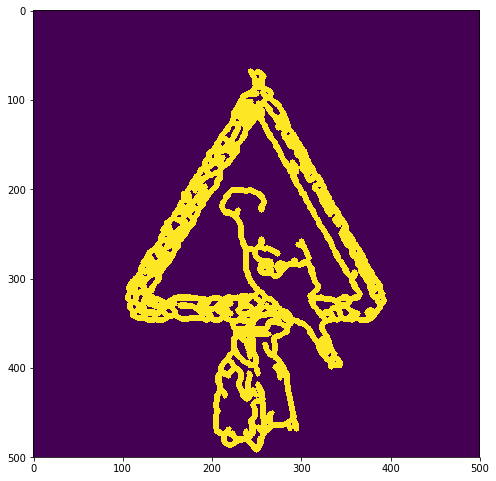

[77.0, 69.0, 69.0, 69.0, 65.0, 60.0, 60.0, 60.0, 58.0, 57.0, 57.0, 57.0, 57.0, 55.0, 55.0, 55.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 47.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.

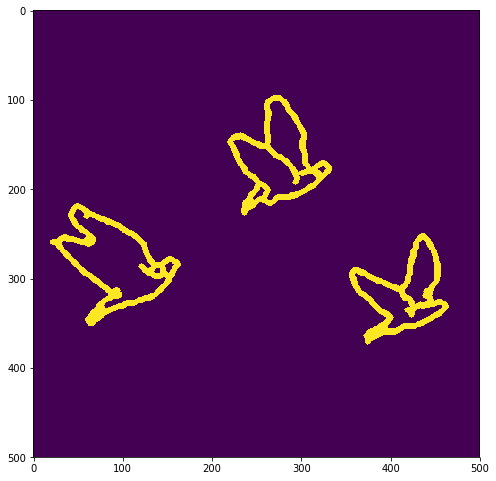

[61.0, 60.0, 58.0, 56.0, 53.0, 45.0, 42.0, 42.0, 42.0, 41.0, 41.0, 38.0, 35.0, 34.0, 34.0, 32.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.

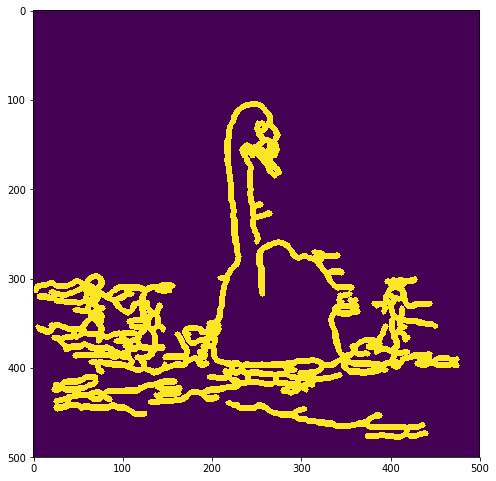

[99.0, 90.0, 86.0, 78.0, 76.0, 76.0, 74.0, 70.0, 66.0, 65.0, 64.0, 62.0, 60.0, 59.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 53.0, 53.0, 52.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 47.0, 47.0, 46.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.

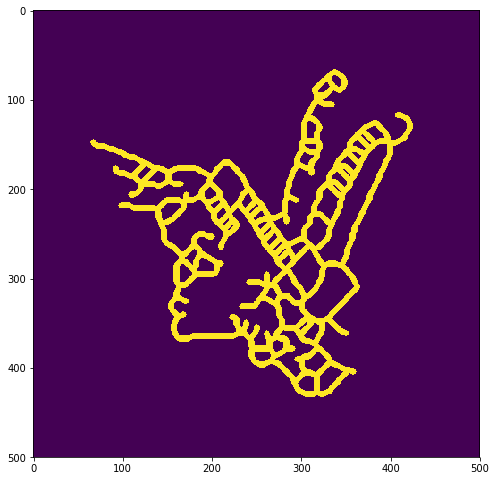

[58.0, 48.0, 47.0, 46.0, 45.0, 45.0, 44.0, 43.0, 42.01190307520001, 42.0, 40.0, 40.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 35.0, 34.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20

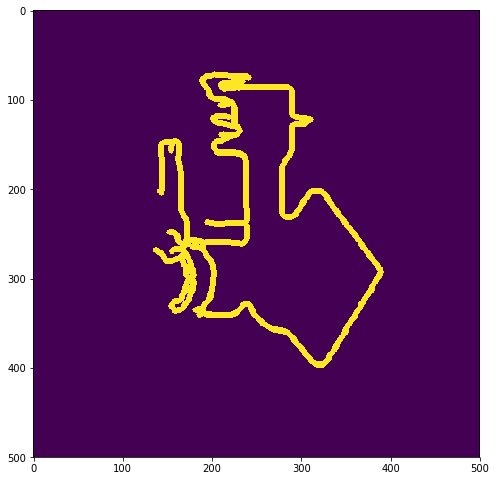

[103.0, 102.0, 100.0, 97.0, 94.0, 83.0, 82.0, 81.0, 80.0, 73.0, 69.0, 69.0, 68.0, 65.0, 63.0, 63.0, 61.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 59.0, 58.0, 58.0, 57.0, 55.0, 53.0, 51.0, 51.0, 48.0, 46.0, 46.0, 42.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 24.0, 21.0, 21.0, 21.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 

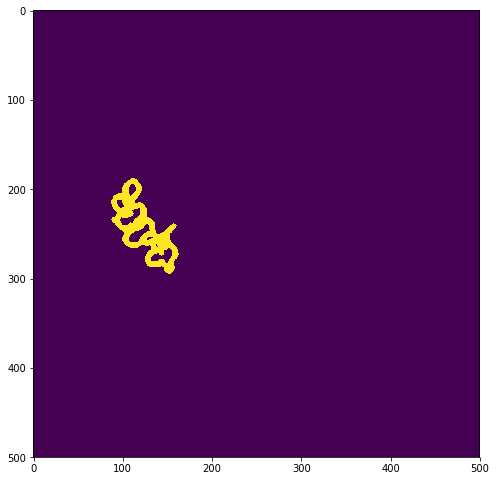

[41.0, 41.0, 40.0, 39.0, 38.0, 37.0, 35.0, 32.0, 31.0, 30.0, 29.0, 28.0, 28.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0,

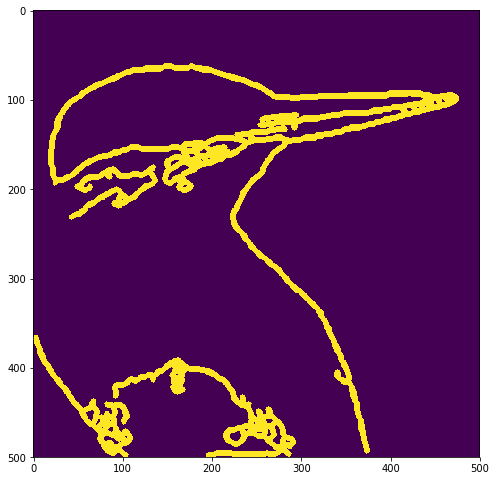

[63.0, 62.0, 54.0, 49.0, 45.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.

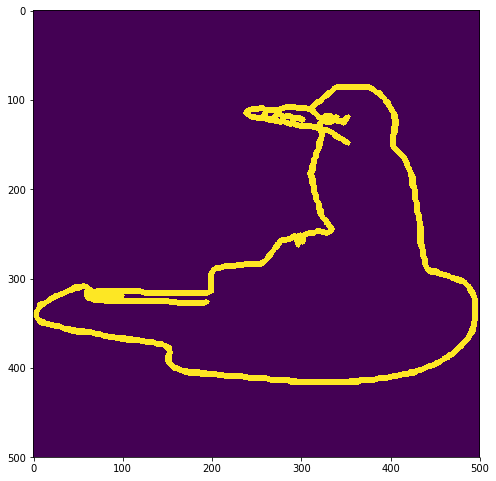

[61.0, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 43.0, 42.0, 42.0, 42.0, 40.0, 39.0, 39.0, 38.0, 38.0, 35.0, 34.0, 33.0, 32.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.

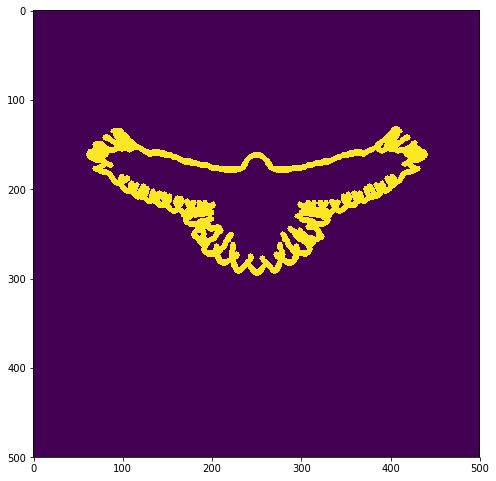

[40.0, 39.0, 38.0, 37.0, 37.0, 36.0, 36.0, 35.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

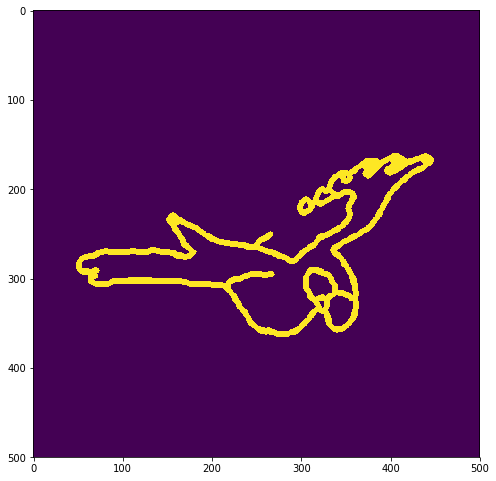

[54.0, 51.0, 48.0, 44.0, 36.0, 35.0, 35.0, 33.0, 32.0, 31.0, 28.0, 28.0, 27.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.

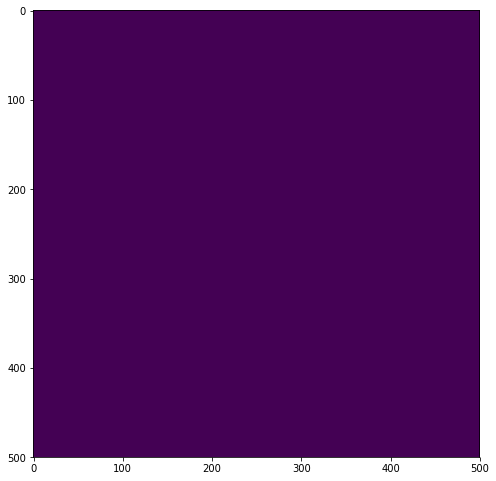

[]


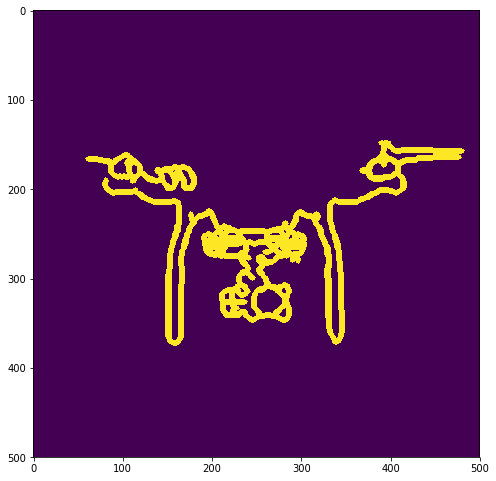

[119.0, 116.0, 115.0, 112.0, 112.0, 110.0, 110.0, 108.0, 108.0, 106.0, 105.0, 104.0, 104.0, 102.0, 101.0, 101.0, 101.0, 100.0, 100.0, 98.0, 86.0, 81.0, 77.0, 72.0, 70.0, 68.0, 68.0, 59.0, 46.0, 46.0, 44.0, 43.0, 43.0, 43.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21

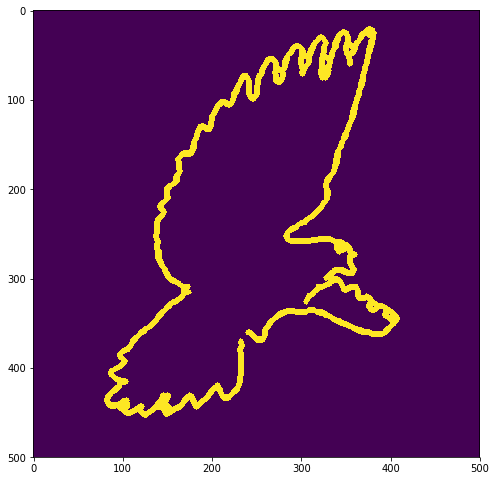

[57.0, 56.0, 55.0, 55.0, 52.0, 52.0, 50.0, 49.0, 49.0, 48.0, 48.0, 48.0, 45.0, 40.0, 38.0, 37.0, 37.0, 37.0, 36.0, 35.0, 35.0, 34.0, 34.0, 34.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.

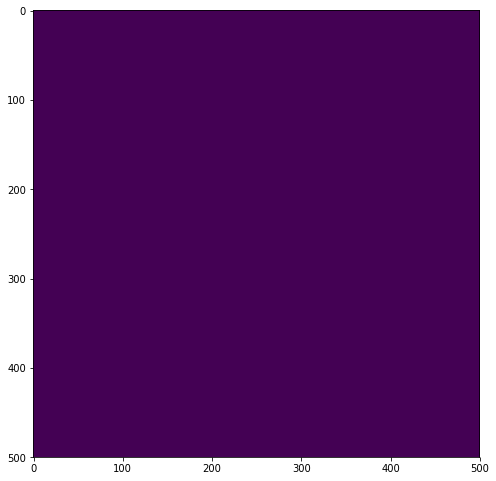

[]


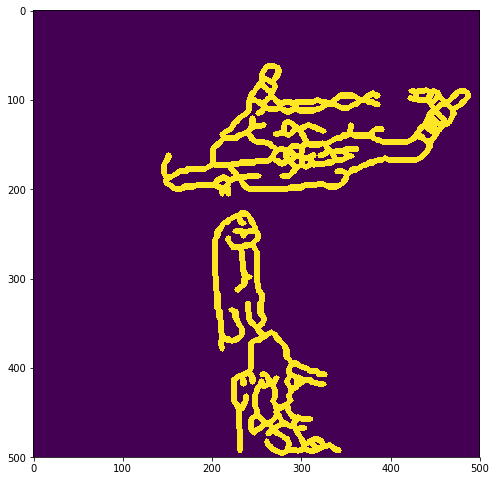

[103.0, 100.0, 90.0, 86.0, 75.0, 75.0, 74.0, 72.0, 68.0, 64.0, 64.0, 63.0, 62.0, 61.0, 59.0, 57.0, 56.0, 55.0, 55.0, 54.0, 54.0, 53.0, 53.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 48.0, 46.0, 45.0, 45.0, 43.0, 41.0, 41.0, 40.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 1

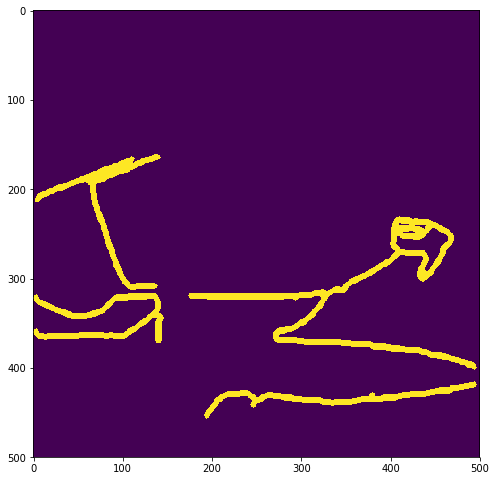

[52.0, 51.0, 48.0, 46.0, 45.0, 44.0, 39.0, 36.0, 34.0, 34.0, 33.0, 32.0, 32.0, 31.0, 31.0, 29.0, 28.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 23.0, 23.0, 23.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.

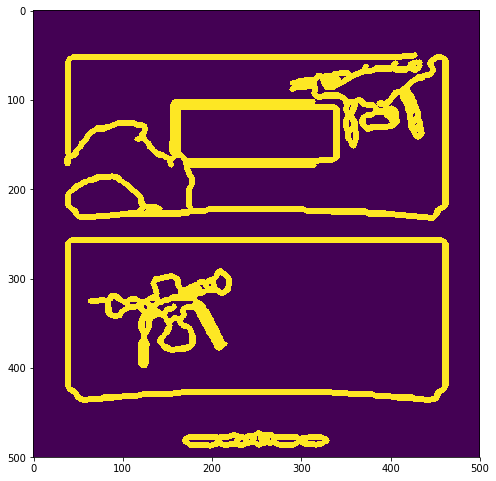

[174.0, 173.0028901492689, 173.0, 171.00292395160966, 171.0, 170.00294115102832, 170.0, 170.0, 168.0, 168.0, 165.00303027520434, 165.0, 161.00310556011024, 161.0, 161.0, 120.01666550941998, 120.00416659433121, 120.0, 120.0, 103.0, 84.0, 77.0, 76.0, 74.0, 74.0, 73.0, 67.0, 67.0, 67.0, 66.0, 66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 64.0, 64.0, 63.0, 63.0, 62.0, 62.0, 61.0, 60.0, 59.0, 58.0, 58.0, 55.0, 55.0, 55.0, 54.0, 52.0, 51.0, 49.0, 49.0, 48.0, 48.0, 47.0, 47.0, 46.0, 46.0, 46.0, 45.0, 45.0, 44.0, 44.0, 43.0, 43.0, 42.01190307520001, 41.0, 41.0, 41.0, 41.0, 41.0, 39.0, 39.0, 38.0, 38.0, 37.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 

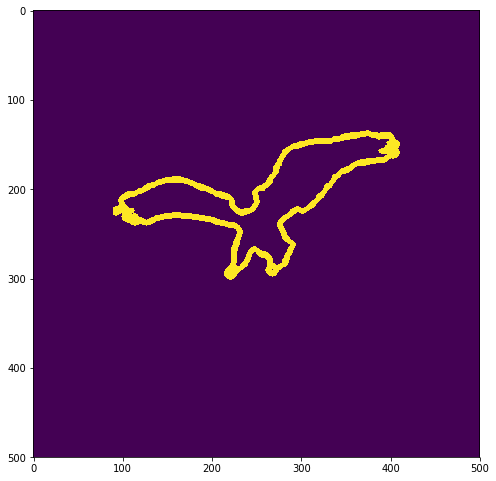

[44.0, 43.0, 42.0, 37.0, 36.0, 31.0, 31.0, 30.0, 29.0, 29.0, 29.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8

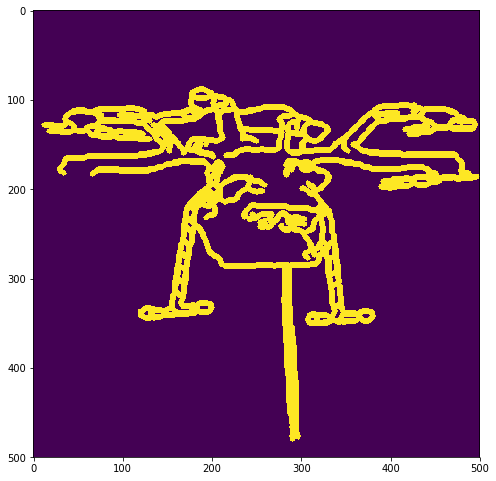

[199.0, 187.0, 179.0, 171.0, 169.0, 166.0, 150.0, 143.0, 129.0, 127.0, 126.0, 117.0, 114.0, 104.0, 89.0, 75.0, 73.0, 70.0, 70.0, 67.0, 66.0, 64.0, 62.0, 61.0, 61.0, 58.0, 58.0, 57.0, 57.0, 56.0, 55.0, 55.0, 55.0, 54.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 50.0, 50.0, 49.0, 49.0, 49.0, 48.0, 48.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 38.0, 37.013511046643494, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0,

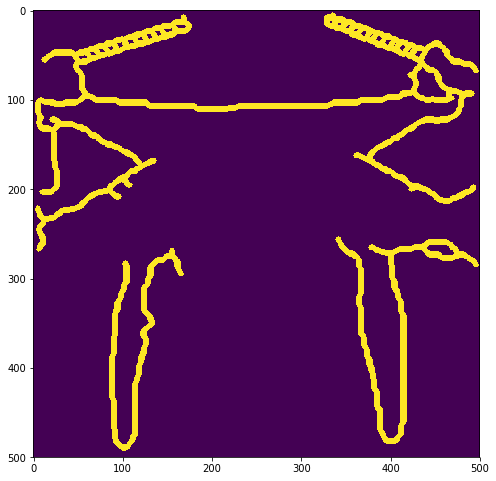

[162.0, 158.0, 155.0, 149.0, 148.0, 144.0, 140.0, 131.0, 125.0, 123.0, 119.0, 103.0, 96.0, 89.0, 88.0, 88.0, 86.0, 83.0, 82.0, 81.0, 80.0, 75.0, 75.0, 72.0, 72.0, 68.0, 68.0, 64.0, 61.0, 61.0, 52.0, 51.0, 50.0, 48.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 45.0, 44.0, 44.0, 44.0, 43.0, 42.0, 42.0, 41.0, 41.0, 41.0, 40.0, 40.0, 39.0, 37.0, 37.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.

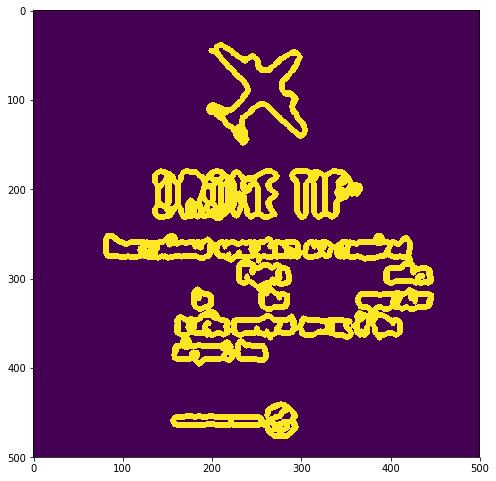

[57.0, 56.0, 56.0, 55.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 45.0, 45.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.

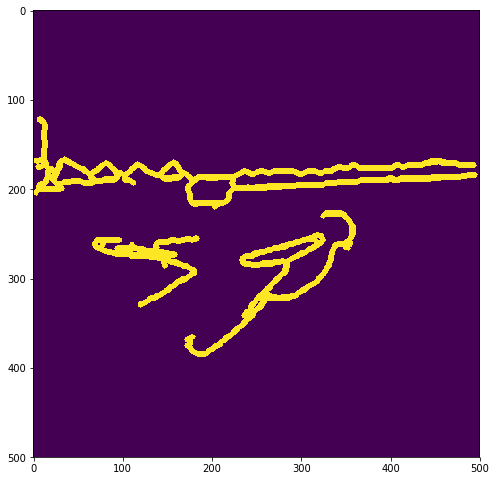

[71.0, 70.0, 57.0, 55.0, 54.0, 54.0, 37.0, 33.0, 33.0, 32.0, 31.0, 30.0, 29.0, 27.0, 27.0, 26.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.

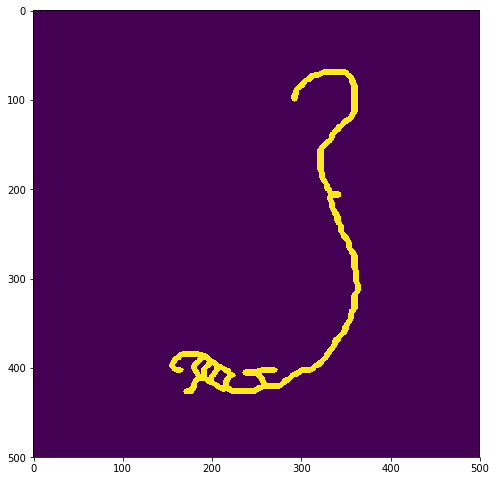

[67.0, 59.0, 58.0, 51.0, 49.0, 46.0, 43.0, 43.0, 41.0, 39.0, 38.0, 36.0, 36.0, 35.0, 34.0, 33.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 19.0, 19.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.

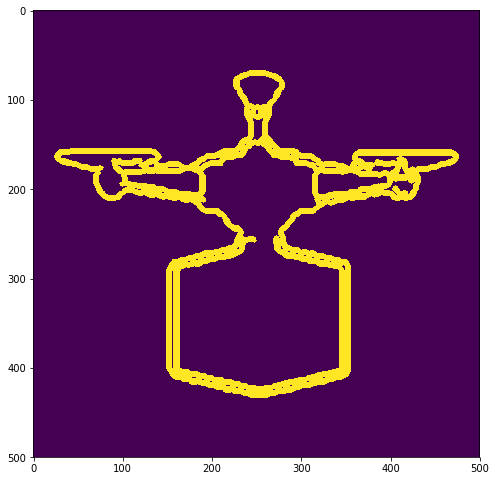

[137.0, 136.0, 136.0, 136.0, 136.0, 135.0, 135.0, 135.0, 134.0, 133.0, 131.0, 130.0, 129.0, 128.0, 127.0, 127.0, 126.0, 125.0, 125.0, 123.0, 123.0, 123.0, 120.0, 119.0, 119.0, 115.0, 114.0, 111.0, 56.0, 55.0, 53.0, 53.0, 52.0, 51.0, 50.0, 50.0, 49.0, 48.0, 48.0, 47.0, 47.0, 43.0, 42.0, 42.0, 41.0, 40.0, 38.0, 38.0, 35.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0,

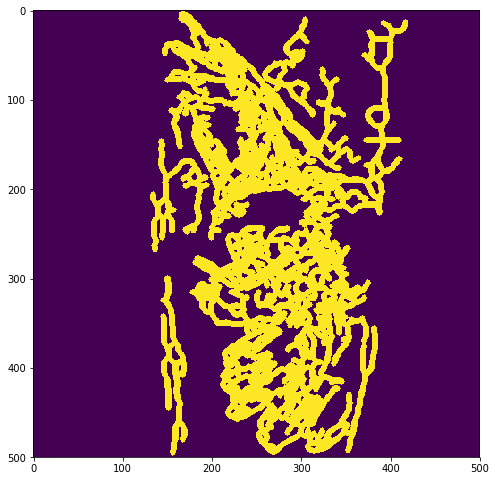

[124.0, 110.0, 110.0, 110.0, 109.0, 103.0, 102.0, 102.0, 100.0, 97.0, 93.0, 91.0, 91.0, 91.0, 91.0, 90.0, 90.0, 89.0, 85.0, 85.0, 85.0, 84.0, 84.0, 83.0, 83.0, 81.0, 80.0, 80.0, 78.0, 78.0, 77.0, 77.0, 76.0, 76.0, 76.0, 75.0, 74.0, 74.0, 74.0, 74.0, 74.0, 73.0, 73.0, 72.0, 72.0, 71.0, 71.0, 71.0, 70.0, 70.0, 70.0, 69.0, 69.0, 69.0, 69.0, 68.0, 68.0, 67.0, 67.0, 67.0, 66.0, 66.0, 65.0, 65.0, 65.0, 64.00781202322104, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62.0, 62.0, 62.0, 62.0, 61.00819617067857, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 60.0, 59.00847396772772, 59.0, 59.0, 58.0, 58.0, 58.0, 57.0, 57.0, 57.0, 57.0, 57.0, 56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 55.0, 55.0, 55.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.

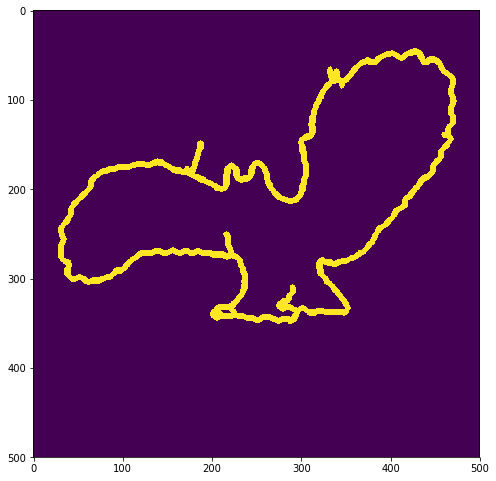

[79.0, 66.0, 60.0, 58.0, 56.0, 53.0, 49.0, 48.0, 48.0, 46.0, 44.0, 43.0, 42.0, 37.0, 37.0, 36.0, 36.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.

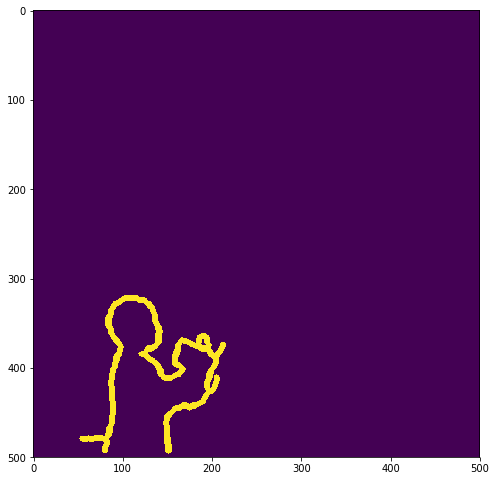

[78.0, 77.0, 76.0, 76.0, 74.0, 47.0, 45.0, 44.0, 41.0, 41.0, 40.0, 38.0, 37.0, 34.0, 32.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0,

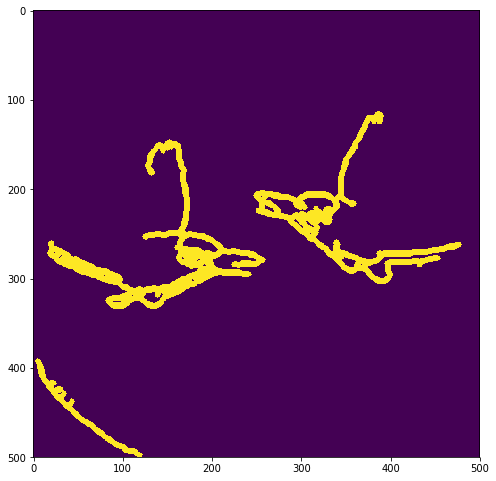

[82.0, 68.0, 50.0, 48.0, 48.0, 45.0, 44.0, 43.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 40.0, 39.0, 39.0, 39.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

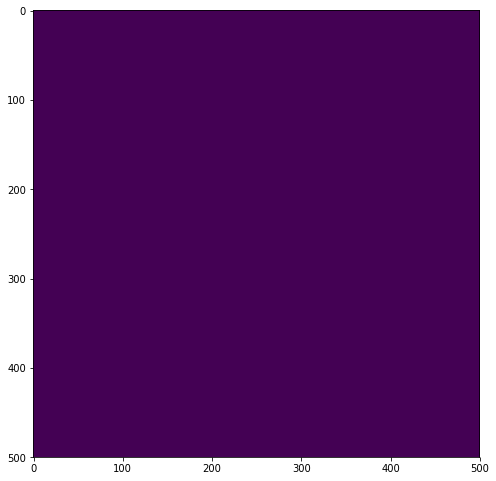

[]


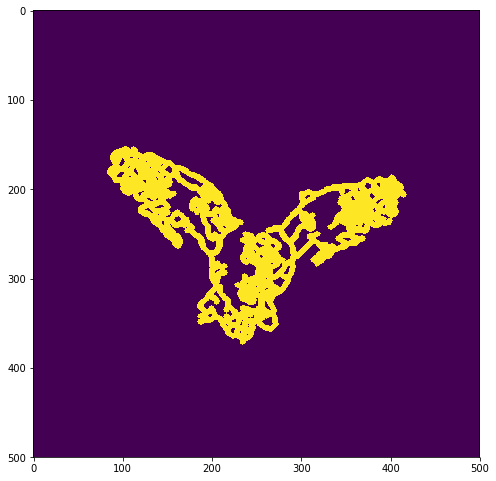

[89.0, 88.0, 86.0, 82.0, 81.0, 80.0, 79.0, 79.0, 79.0, 79.0, 78.0, 71.0, 66.0, 65.0, 64.0, 62.0, 62.0, 60.0, 58.0, 58.0, 58.0, 57.0, 56.0, 56.0, 56.0, 55.0, 54.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.

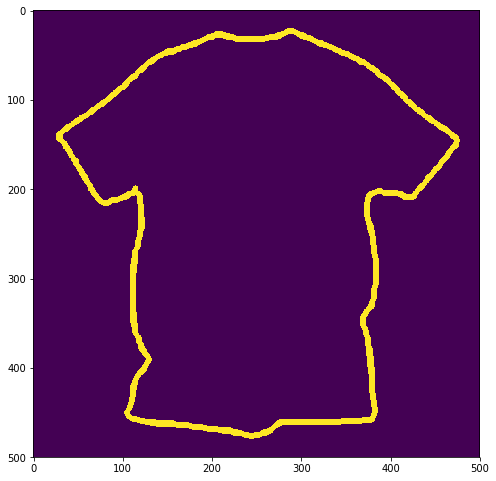

[109.0, 99.0, 95.0, 92.0, 91.0, 85.0, 82.0, 79.0, 77.0, 73.0, 72.0, 69.0, 67.0, 66.0, 65.0, 63.0, 63.0, 60.0, 60.0, 59.0, 51.0, 50.0, 49.0, 48.0, 46.0, 44.0, 44.0, 43.0, 43.0, 41.0, 40.0, 39.0, 38.0, 37.0, 37.0, 36.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 23.0, 20.0, 20.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10

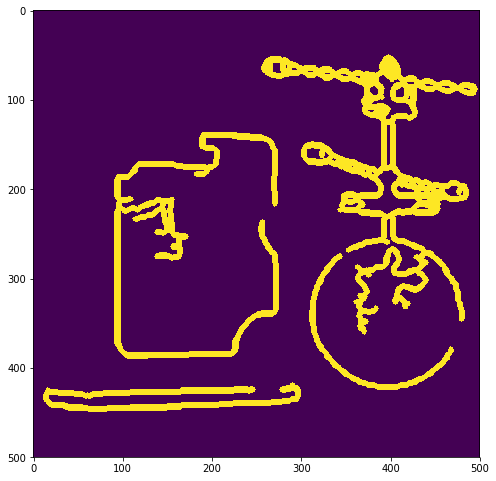

[200.0, 199.0, 196.0, 194.0, 161.0, 152.0, 148.0, 78.0, 77.0, 76.0, 75.0, 74.0, 74.0, 74.0, 72.0, 72.0, 71.0, 71.0, 71.0, 70.0, 70.0, 68.0, 66.0, 66.0, 66.0, 64.0, 64.0, 64.0, 62.0, 62.0, 60.0, 57.0, 57.0, 57.0, 56.0, 54.0, 52.0, 50.0, 50.0, 49.0, 49.0, 47.0, 46.0, 46.0, 45.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 40.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.02271554554524, 22.0, 22.0, 22.0, 2

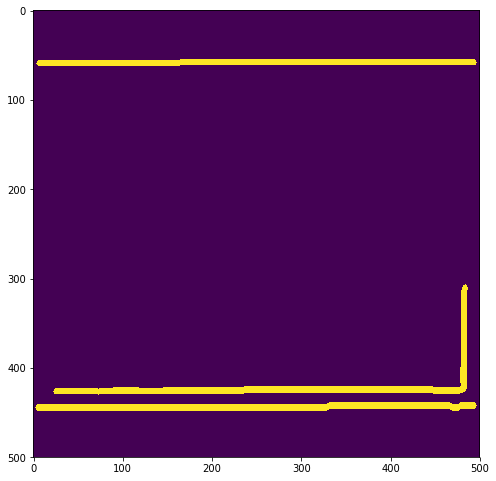

[118.0, 118.0, 118.0, 117.0, 115.0, 114.0, 90.0, 17.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 

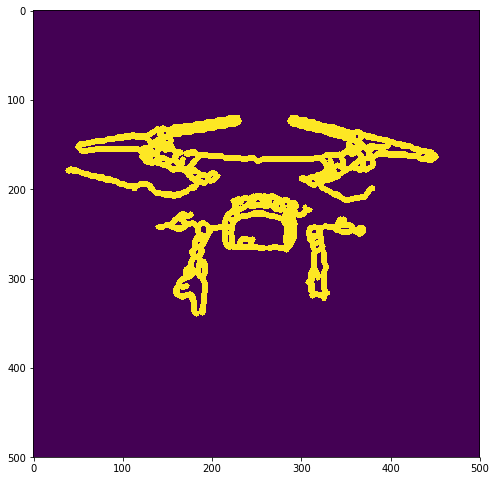

[72.0, 71.0, 71.0, 66.0, 64.0, 64.0, 62.0, 62.0, 62.0, 61.0, 61.0, 60.0, 59.0, 58.0, 55.0, 54.0, 53.0, 52.0, 52.0, 52.0, 51.0, 50.0, 50.0, 50.0, 47.0, 47.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 41.0, 41.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.

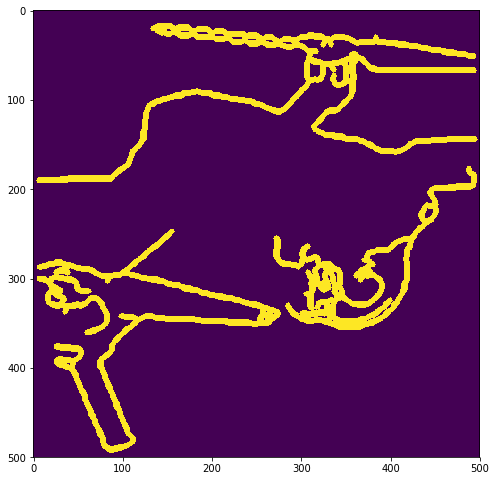

[60.0, 58.0, 54.0, 53.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 48.0, 48.0, 47.0, 47.0, 46.0, 45.0, 44.0, 44.0, 43.0, 42.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.

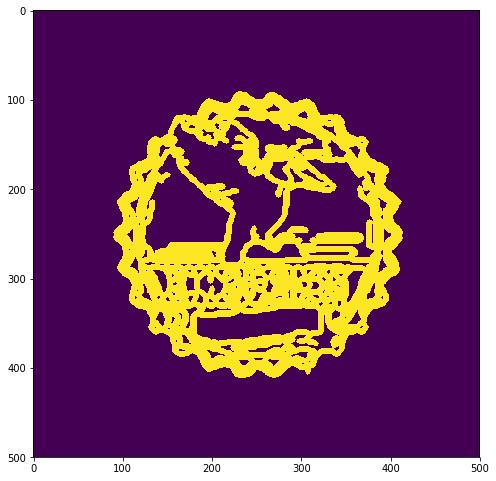

[165.0, 165.0, 164.0, 164.0, 163.0, 110.0, 108.0, 96.0, 96.0, 94.0, 94.0, 94.0, 93.0, 92.0, 92.0, 89.0, 87.0, 86.0, 86.0, 86.0, 85.0, 84.0, 80.0, 80.0, 79.0, 79.0, 79.0, 79.0, 78.0, 77.0, 77.0, 77.0, 76.0, 76.0, 75.0, 75.0, 75.0, 74.0, 73.0, 73.0, 73.0, 71.0, 71.0, 69.0, 68.0, 68.0, 67.0, 67.0, 66.0, 64.0, 64.0, 63.0, 63.0, 63.0, 62.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 60.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 58.0, 58.0, 58.0, 58.0, 58.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 55.0, 55.0, 54.0, 54.0, 54.0, 54.0, 53.0, 53.0, 52.0, 52.0, 52.0, 51.0, 51.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43

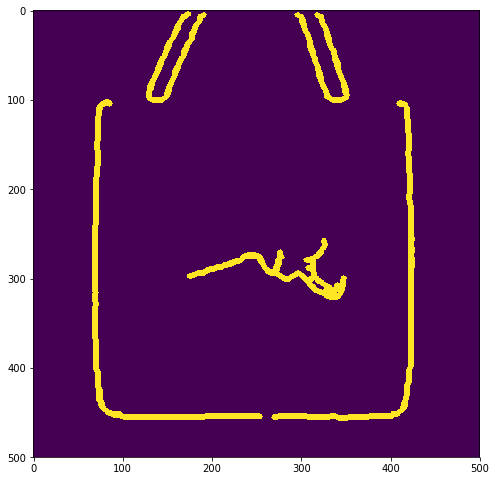

[332.0, 328.0, 328.0, 322.0, 312.0, 303.0, 296.0, 229.0, 215.0, 194.0, 188.0, 180.0, 148.0, 127.0, 113.0, 82.0, 78.0, 74.0, 74.0, 43.0, 42.0, 42.0, 41.0, 38.0, 37.0, 36.0, 34.0, 31.0, 30.0, 30.0, 29.0, 28.0, 28.0, 28.0, 28.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 

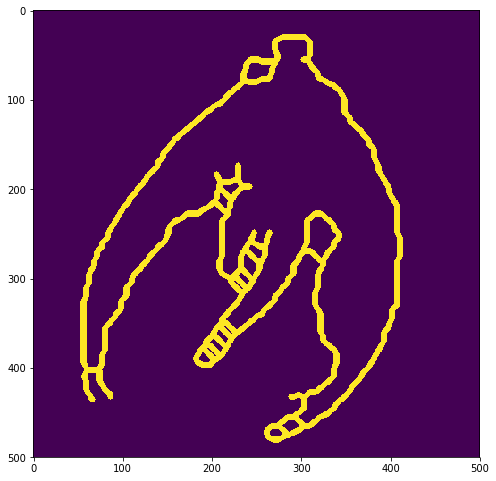

[135.0, 122.0, 120.0, 118.0, 117.0, 114.0, 110.0, 90.0, 77.0, 73.0, 70.0, 69.0, 67.0, 65.0, 65.0, 63.0, 60.0, 58.0, 57.0, 54.0, 49.0, 48.0, 47.0, 46.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19

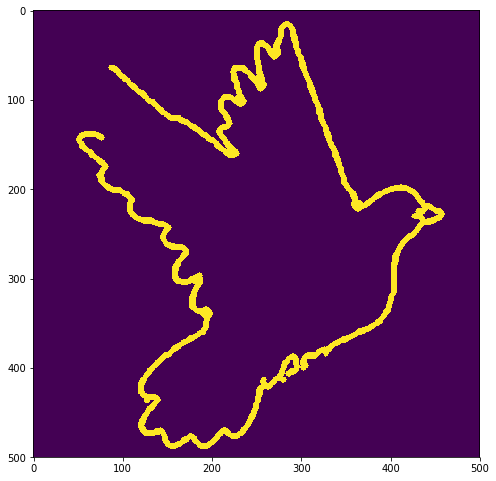

[56.0, 55.0, 54.0, 53.0, 53.0, 50.0, 50.0, 50.0, 50.0, 48.0, 43.0, 35.0, 35.0, 33.0, 32.0, 32.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.

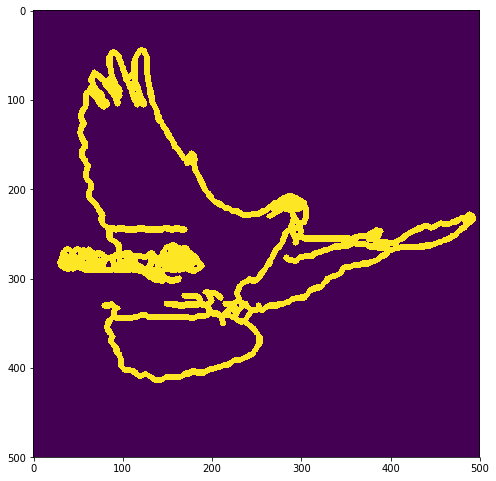

[65.0, 62.0, 62.0, 57.0, 56.0, 53.0, 52.0, 51.0, 51.0, 50.0, 49.0, 48.0, 48.0, 48.0, 47.0, 47.0, 44.0, 43.0, 43.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 38.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.

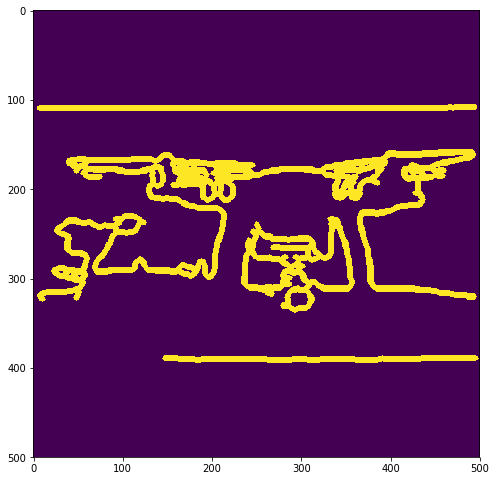

[56.0, 49.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 44.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.

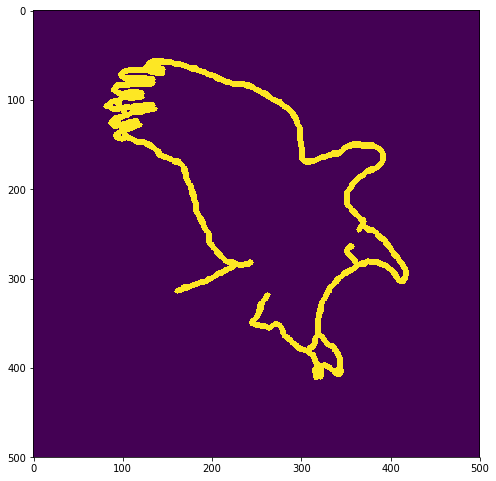

[44.0, 44.0, 43.0, 41.0, 40.0, 40.0, 40.0, 39.0, 37.0, 37.0, 36.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.

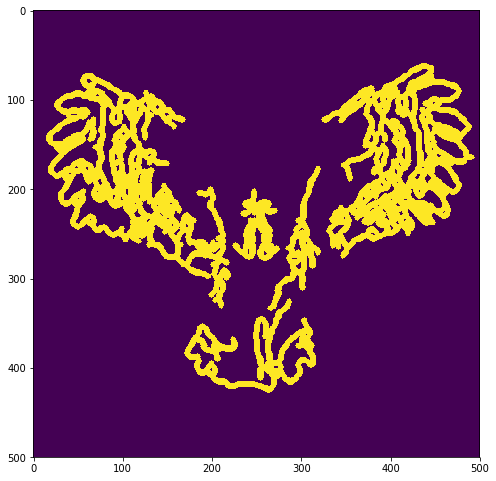

[106.0, 102.0, 101.0, 100.0, 98.0, 87.0, 84.0, 81.0, 81.0, 81.0, 81.0, 81.0, 80.0, 80.0, 75.0, 73.0, 71.0, 70.0, 69.0, 69.0, 68.0, 68.0, 68.0, 68.0, 66.0, 66.0, 64.0, 62.0, 62.0, 61.0, 60.0, 60.0, 59.0, 59.0, 58.0, 58.0, 58.0, 57.0, 57.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 54.0, 54.0, 54.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 47.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0,

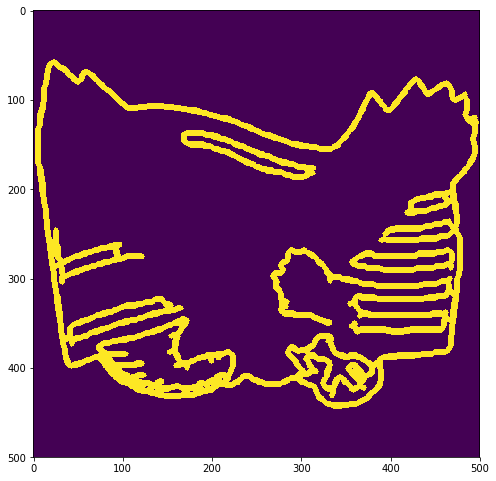

[120.0, 105.0, 95.0, 82.0, 79.0, 75.0, 71.0, 70.0, 68.0, 65.0, 63.0, 62.0, 62.0, 61.0, 59.0, 56.0, 55.0, 55.0, 55.0, 54.0, 54.0, 54.0, 53.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 47.0, 47.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 43.0, 42.0, 42.0, 42.0, 42.0, 41.0, 40.0, 39.0, 39.0, 39.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 2

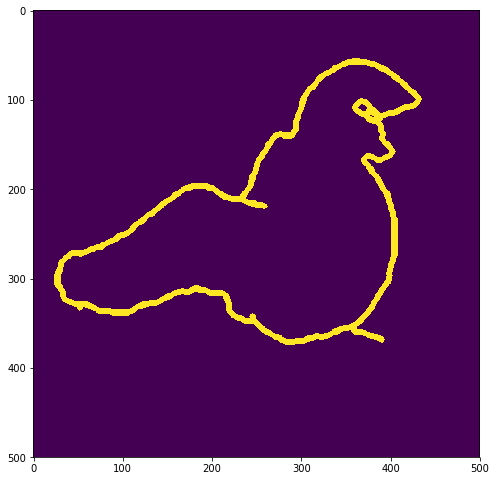

[92.0, 77.0, 71.0, 60.0, 56.0, 45.0, 41.0, 41.0, 34.0, 31.0, 31.0, 30.0, 29.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.

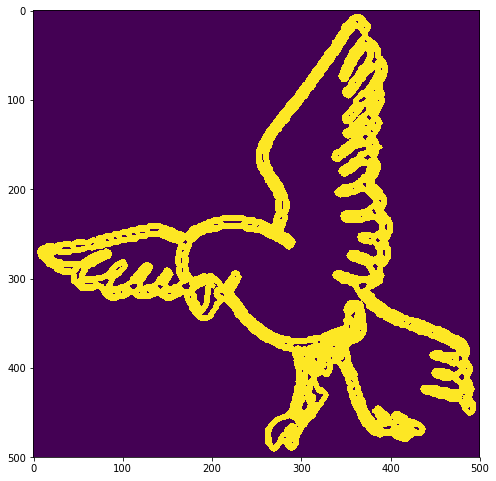

[132.0, 113.0, 109.0, 105.0, 103.0, 102.0, 102.0, 101.0, 98.0, 96.0, 95.0, 93.0, 90.0, 89.0, 89.0, 88.0, 85.0, 84.0, 83.0, 81.0, 79.0, 74.0, 73.0, 73.0, 73.0, 73.0, 73.0, 72.0, 72.0, 69.0, 67.0, 67.0, 66.0, 64.0, 63.0, 63.0, 63.0, 63.0, 62.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 59.0, 59.0, 58.0, 57.0, 57.0, 56.0, 56.0, 56.0, 54.0, 54.0, 54.0, 53.0, 53.0, 52.0, 52.0, 52.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.012193308819754, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0,

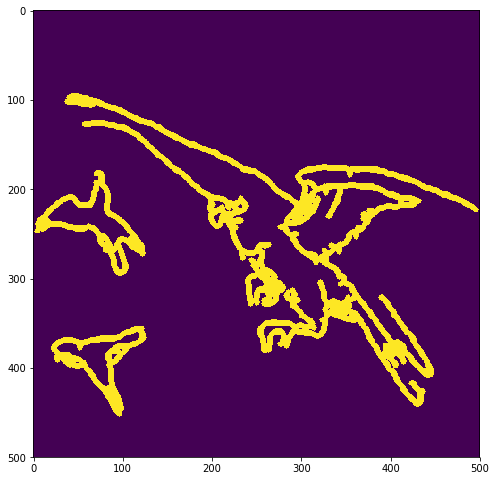

[66.0, 64.0, 61.0, 57.0, 56.0, 53.0, 49.0, 49.0, 48.0, 46.0, 46.0, 46.0, 45.0, 44.0, 43.0, 43.0, 42.0, 42.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.

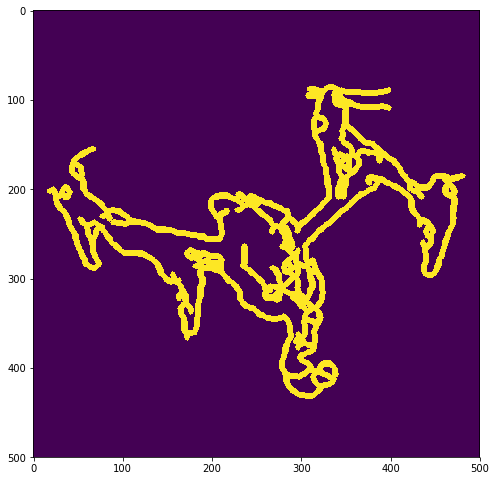

[85.0, 72.0, 66.0, 64.0, 63.0, 63.0, 62.0, 61.0, 59.0, 59.0, 58.0, 57.0, 55.0, 54.0, 52.0, 52.0, 52.0, 51.0, 50.0, 50.0, 49.0, 48.0, 47.0, 47.0, 46.0, 45.0, 45.0, 45.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.

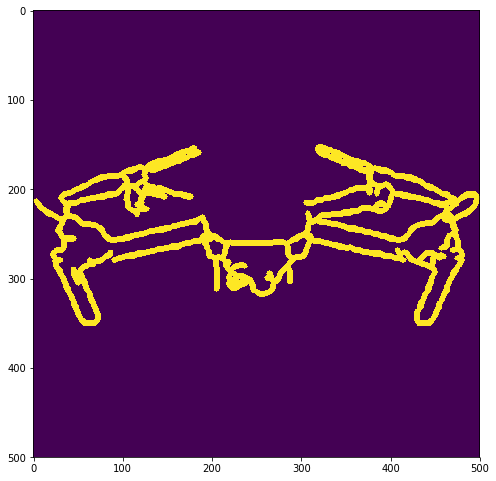

[51.0, 50.0, 49.0, 49.0, 46.0, 42.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.

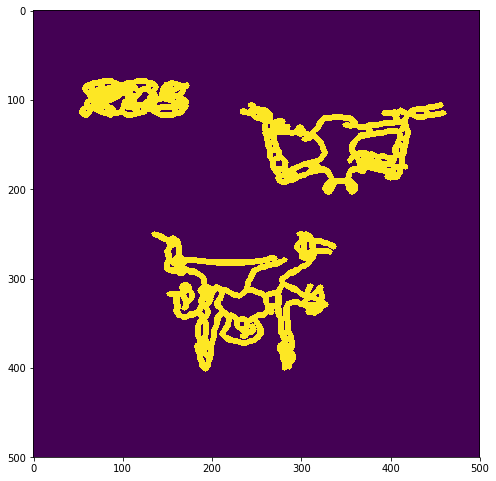

[103.0, 91.0, 78.0, 76.0, 74.0, 70.0, 68.0, 64.0, 63.0, 61.0, 60.0, 60.0, 56.0, 56.0, 56.0, 54.0, 54.0, 53.0, 52.0, 50.0, 48.0, 47.0, 47.0, 47.0, 46.0, 45.0, 45.0, 45.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27

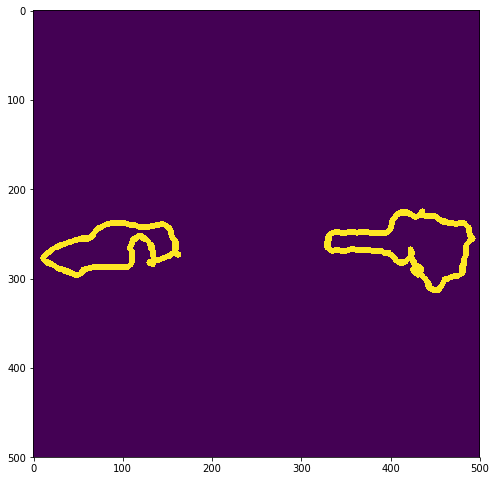

[35.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 31.0, 31.0, 29.0, 28.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 24.0, 24.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7

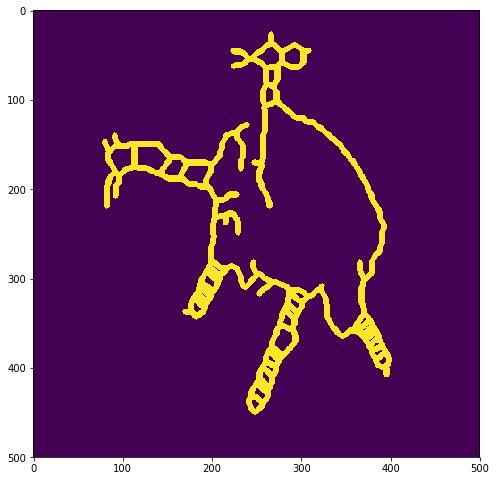

[112.0, 108.00462953040486, 98.0, 95.0, 85.0, 83.0, 82.0, 68.0, 68.0, 67.0, 65.0, 65.0, 62.0, 59.0, 55.0, 53.0, 50.0, 50.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 43.0, 41.0, 40.0, 39.0, 39.0, 39.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 

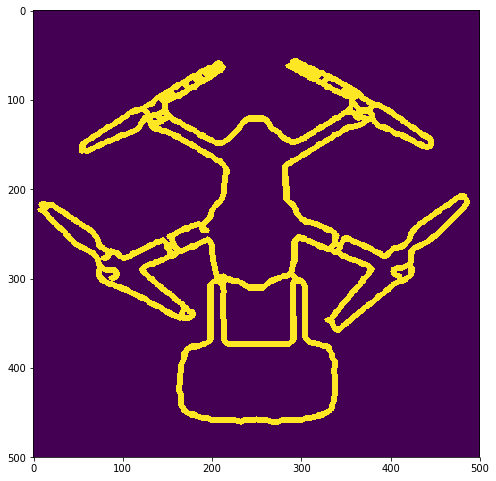

[118.0, 117.0, 79.0, 79.0, 78.0, 78.0, 76.0, 75.0, 74.0, 72.0, 71.0, 71.0, 70.0, 70.0, 69.0, 69.0, 69.0, 68.0, 68.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 66.0, 66.0, 65.0, 61.0, 61.0, 59.0, 53.0, 51.0, 50.0, 48.0, 47.0, 46.0, 46.0, 44.0, 44.0, 44.0, 42.0, 41.0, 41.0, 39.0, 38.0, 38.0, 37.0, 37.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 1

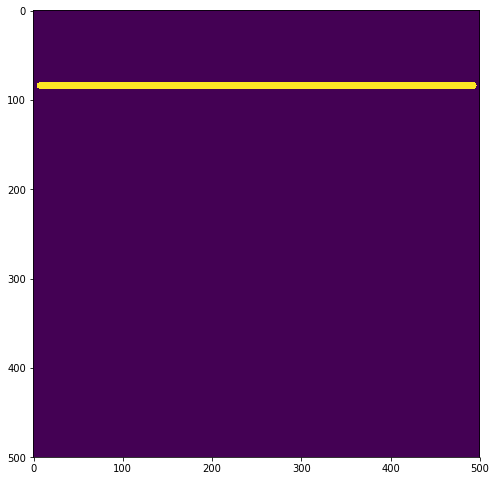

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0,

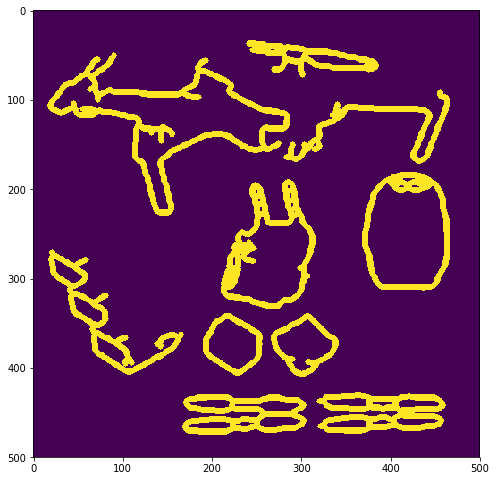

[84.0, 80.0, 70.0, 65.0, 60.0, 58.0, 56.0, 55.0, 55.0, 55.0, 52.0, 52.0, 52.0, 52.0, 51.0, 50.0, 49.0, 48.0, 48.0, 46.0, 45.0, 43.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 39.0, 39.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.

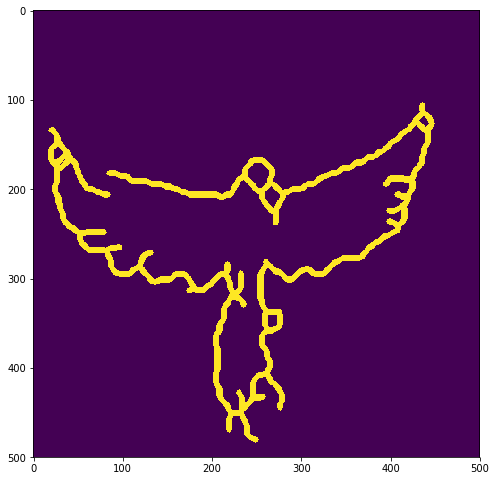

[87.0, 83.0, 79.0, 70.0, 64.0, 64.0, 63.0, 60.0, 59.0, 56.0, 50.0, 49.0, 48.0, 45.0, 41.0, 41.0, 39.0, 38.0, 37.0, 37.0, 36.0, 34.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

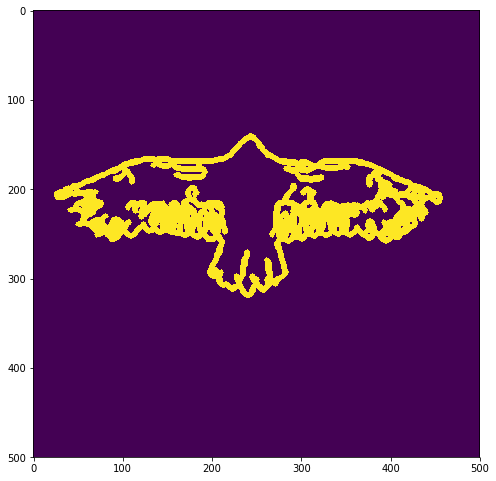

[67.0, 63.0, 63.0, 57.0, 55.0, 55.0, 55.0, 54.0, 54.0, 50.0, 49.0, 48.0, 47.0, 47.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.

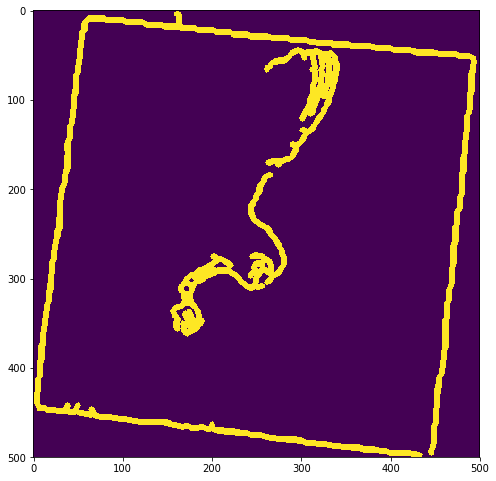

[88.0, 81.0, 79.0, 79.0, 77.0, 75.0, 74.0, 74.0, 74.0, 73.0, 73.0, 73.0, 72.0, 71.0, 71.0, 71.0, 70.0, 69.0, 69.0, 69.0, 69.0, 68.0, 68.0, 68.0, 68.0, 67.0, 67.0, 66.0, 66.0, 66.0, 65.0, 65.0, 65.0, 64.0, 64.0, 64.0, 64.0, 63.0, 63.0, 63.0, 62.0, 62.0, 61.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 59.0, 59.0, 59.0, 59.0, 58.0, 58.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 56.0, 56.0, 56.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 47.0, 46.0, 46.0, 44.0, 44.0, 43.0, 43.0, 42.0, 42.0, 42.0, 40.0, 40.0, 39.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 34.0, 34.0, 34.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.

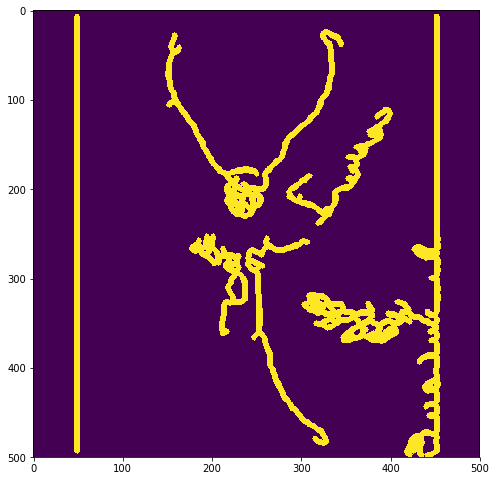

[492.0, 492.0, 492.0, 492.0, 491.0, 490.0, 490.0, 490.0, 490.0, 486.0, 486.0, 334.0, 172.0, 136.0, 92.0, 86.0, 85.0, 83.0, 77.0, 72.0, 71.0, 69.0, 67.0, 59.0, 59.0, 55.0, 54.0, 53.0, 53.0, 52.0, 48.0, 47.0, 46.0, 45.0, 44.0, 44.0, 42.0, 42.0, 42.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 37.0, 37.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 2

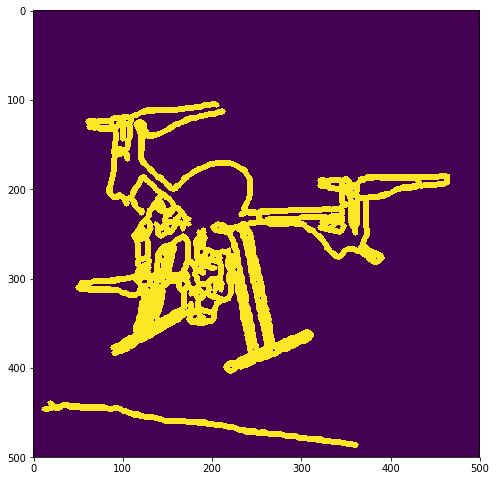

[146.0, 123.0, 106.0, 99.0, 95.0, 93.0, 92.0, 90.0, 88.0, 87.0, 87.0, 83.0, 83.0, 82.0, 81.0, 80.0, 80.0, 79.0, 77.0, 75.0, 74.0, 73.0, 72.0, 72.0, 70.0, 70.0, 70.0, 70.0, 69.0, 69.0, 68.0, 68.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62.0, 62.0, 62.0, 62.0, 61.0, 61.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 60.0, 60.0, 59.0, 59.0, 59.0, 59.0, 59.0, 58.0, 58.0, 57.0, 57.0, 57.0, 57.0, 57.0, 56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 55.0, 55.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 43.0, 42.01190307520001, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 37.0, 37.0, 37.0, 37.0,

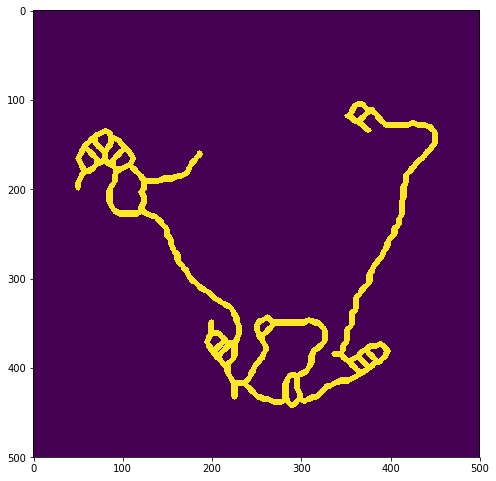

[50.0, 47.0, 46.0, 46.0, 45.0, 45.0, 44.0, 44.0, 44.0, 43.0, 41.0, 39.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.

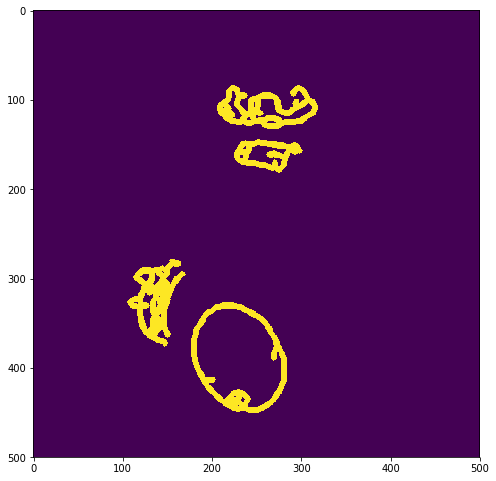

[79.0, 76.0, 75.0, 71.0, 65.0, 64.0, 64.0, 63.0, 62.0, 61.0, 61.0, 59.0, 57.0, 55.0, 53.0, 52.0, 52.0, 49.0, 48.0, 48.0, 46.0, 46.0, 44.0, 43.0, 42.0, 39.0, 39.0, 39.0, 37.0, 36.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.

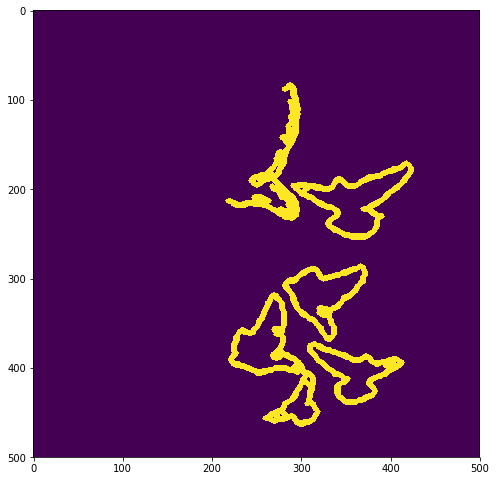

[69.0, 67.0, 67.0, 65.0, 64.0, 64.0, 60.0, 57.0, 55.0, 55.0, 52.0, 45.0, 43.0, 41.0, 41.0, 38.0, 38.0, 38.0, 37.0, 36.0, 35.0, 33.0, 33.0, 33.0, 32.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

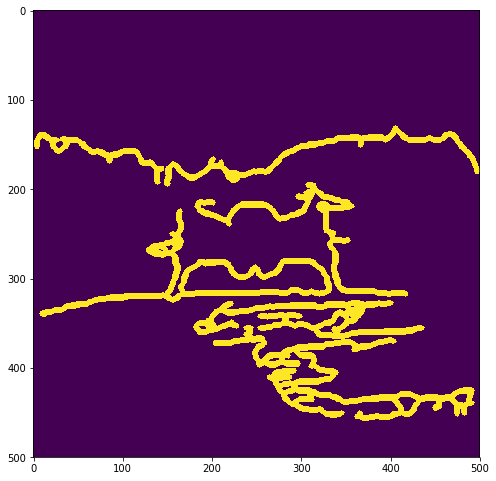

[61.0, 53.0, 45.0, 44.0, 44.0, 42.0, 41.0, 41.0, 38.0, 37.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 33.0, 31.0, 29.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

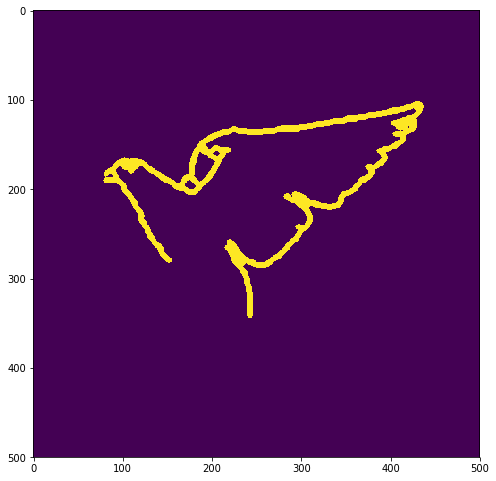

[49.0, 49.0, 46.0, 44.0, 37.0, 36.0, 35.0, 34.0, 34.0, 32.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.

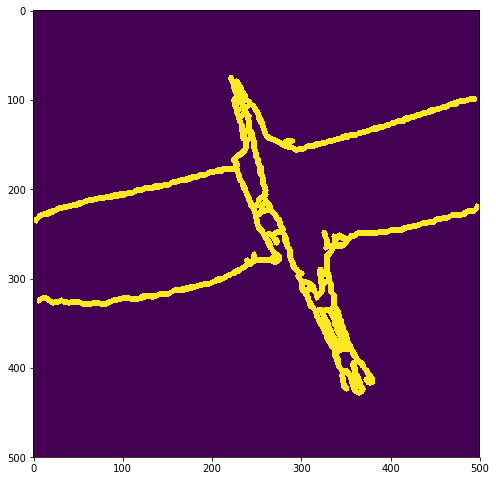

[70.0, 61.0, 57.0, 54.0, 52.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 47.0, 46.0, 46.0, 45.0, 45.0, 44.0, 44.0, 44.0, 43.0, 43.0, 41.0, 41.0, 41.0, 41.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.

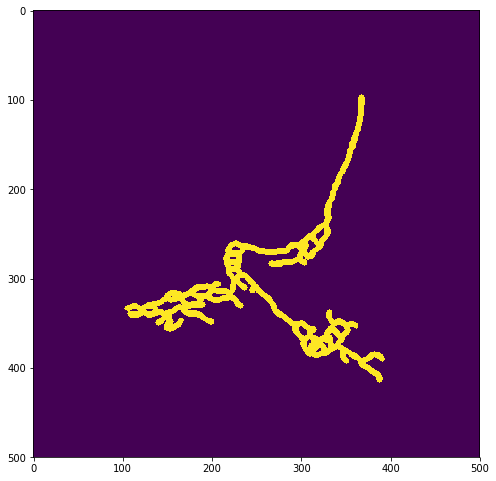

[45.0, 43.0, 42.0, 41.0, 41.0, 41.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 37.0, 36.0, 35.0, 35.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.

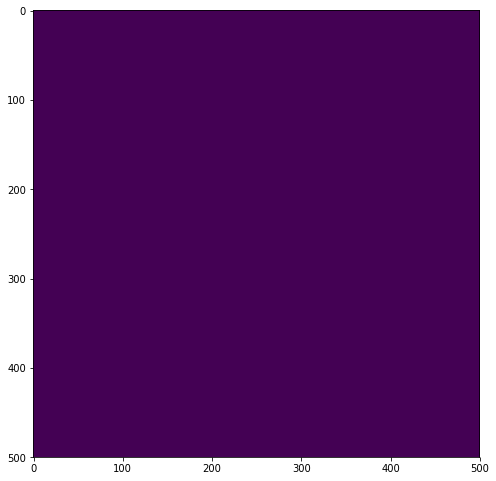

[]


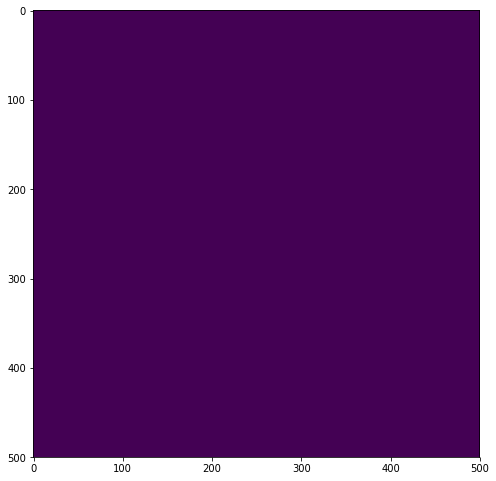

[]


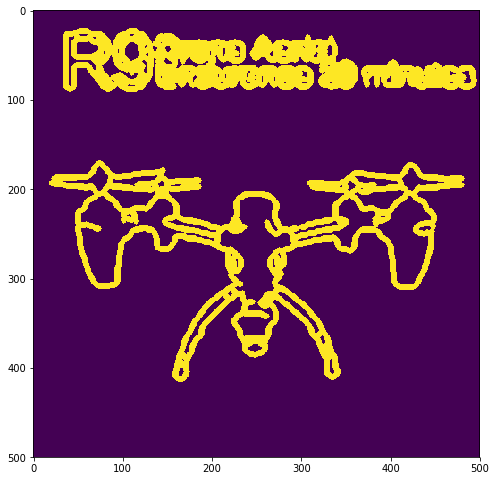

[67.0, 67.0, 66.0, 66.0, 65.0, 65.0, 64.0, 63.0, 62.0, 62.0, 62.0, 61.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 60.0, 59.0, 59.0, 59.0, 59.0, 58.0, 58.0, 58.0, 58.0, 57.0, 56.0, 56.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 47.0, 46.0, 46.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.

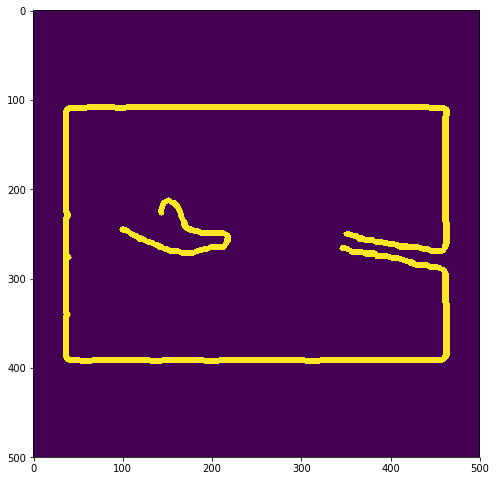

[288.0, 286.0, 286.0, 284.0, 280.0, 165.0, 165.0, 163.0, 161.0, 158.0, 155.0, 117.0, 110.0, 107.0, 105.0, 103.0, 100.0, 97.0, 94.0, 85.0, 64.0, 59.0, 58.0, 44.0, 43.0, 40.0, 39.0, 24.0, 21.02379604162864, 20.0, 19.0, 19.0, 19.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 14.0, 13.0, 13.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.

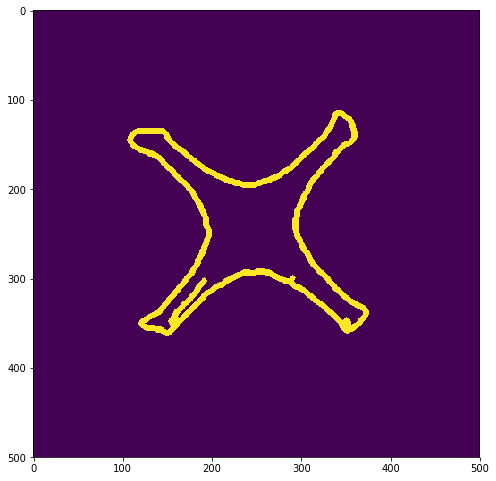

[45.0, 44.0, 41.0, 40.0, 36.0, 34.0, 34.0, 30.0, 30.0, 30.0, 27.0, 25.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 

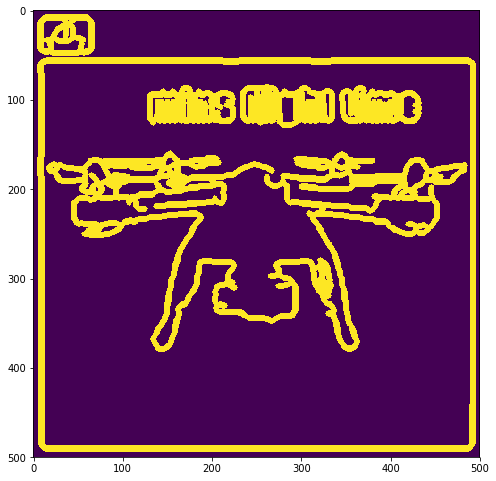

[438.0, 438.0, 436.0, 436.0, 435.0, 434.0, 433.0, 432.0, 431.0, 430.0, 428.0, 426.0, 379.0, 306.0, 51.0, 49.0, 49.0, 48.0, 47.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.01281840626232, 39.01281840626232, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.014282800023196, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0147027033899, 34.0, 34.

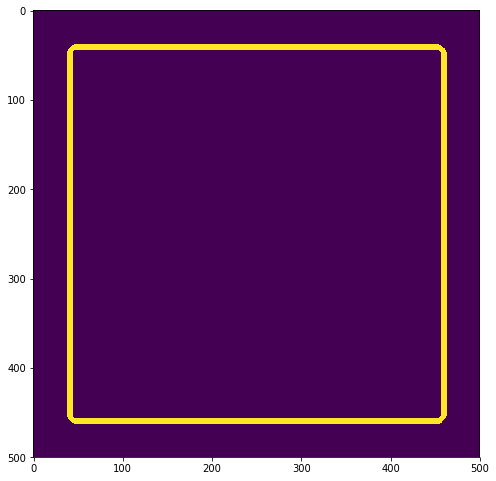

[422.0, 421.0, 420.0, 420.0, 420.0, 418.0, 418.0, 416.0, 416.0, 414.0, 412.0, 410.0, 408.0, 406.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6

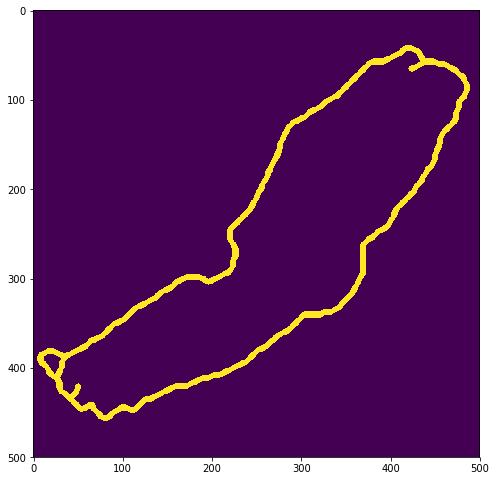

[54.0, 43.0, 42.0, 41.0, 41.0, 40.0, 39.0, 38.0, 35.0, 33.0, 29.0, 28.0, 26.0, 26.0, 26.0, 26.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.

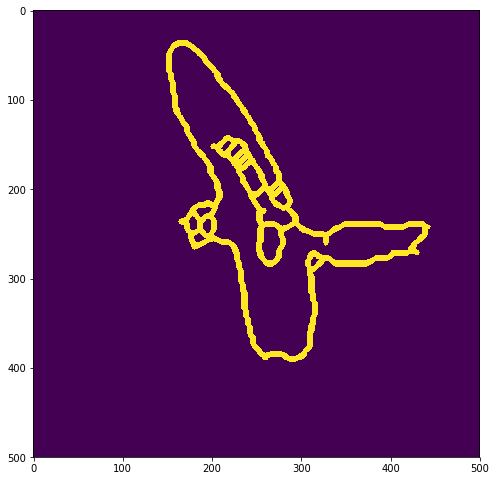

[90.0, 70.0, 65.0, 61.0, 61.0, 60.0, 60.0, 56.0, 54.0, 52.0, 51.0, 51.0, 46.0, 46.0, 46.0, 45.0, 44.0, 43.0, 43.0, 42.0, 42.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 32.0, 32.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.

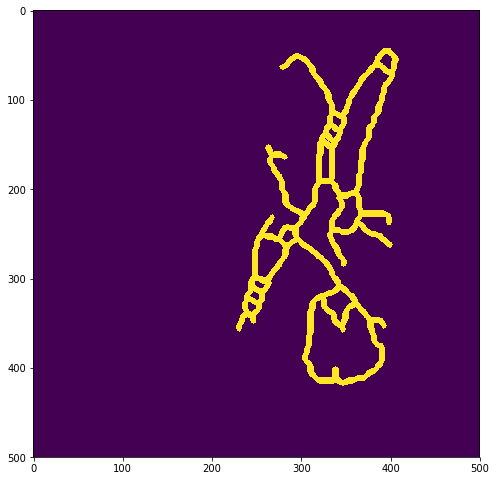

[73.0, 67.0, 66.0, 58.0, 57.0, 56.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 52.0, 51.0, 51.0, 50.0, 50.0, 49.0, 48.0, 48.0, 48.0, 47.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 43.0, 41.0, 40.0, 39.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 35.0, 35.0, 34.0, 33.0, 32.0, 32.0, 32.0, 32.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.

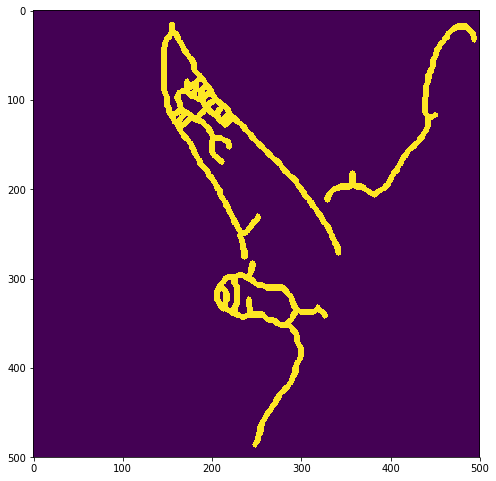

[86.0, 80.0, 78.0, 74.0, 70.0, 68.0, 68.0, 65.0, 61.0, 57.0, 49.0, 49.0, 49.0, 47.0, 47.0, 45.0, 43.0, 41.0, 41.0, 39.0, 36.0, 36.0, 34.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

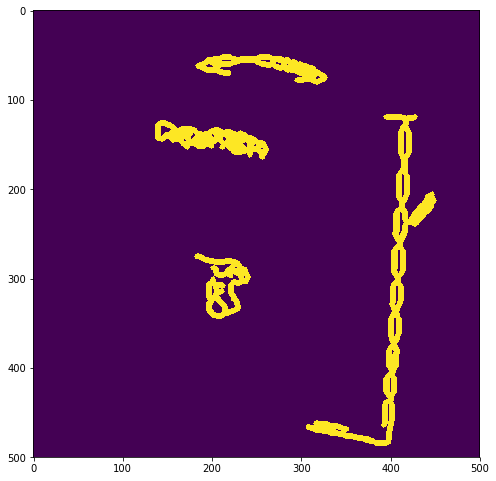

[143.0, 142.0, 110.0, 97.0, 95.0, 95.0, 94.0, 85.0, 83.0, 81.0, 76.0, 75.0, 68.0, 68.0, 67.0, 66.0, 64.0, 57.0, 57.0, 55.0, 55.0, 53.0, 51.0, 50.0, 49.0, 48.0, 48.0, 48.0, 46.0, 46.0, 44.0, 44.0, 43.0, 43.0, 41.0, 40.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 33.0, 33.0, 33.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.02271554554524, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0,

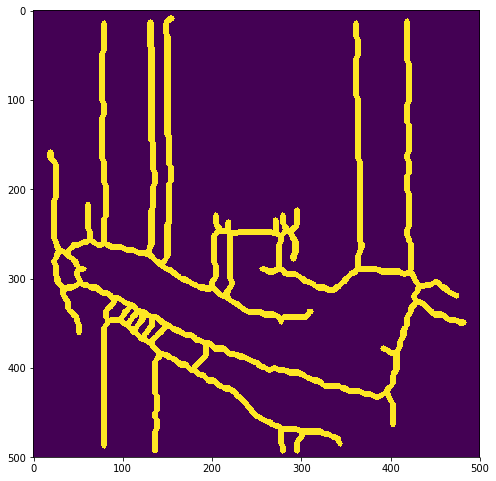

[286.0, 286.0, 284.0, 278.0, 271.0, 255.0, 252.0, 252.0, 252.0, 251.0, 249.0, 248.0, 248.0, 246.0, 245.0, 196.0, 194.0, 182.0, 181.00276240985937, 168.0, 167.0029939851379, 166.0, 163.0, 157.00318468107582, 157.0, 157.0, 157.0, 156.0, 151.0, 139.00359707575916, 139.0, 136.0, 136.0, 134.0, 133.0, 131.0, 128.0, 120.0, 119.0, 116.0, 108.0, 108.0, 106.0, 102.0, 102.0, 100.0, 99.0, 98.0, 98.0, 97.0, 96.0, 94.0, 92.0, 89.00561780022652, 88.0, 84.0, 80.0, 80.0, 79.00632886041473, 77.0, 75.0, 69.0, 68.0, 68.0, 68.0, 67.0, 66.0, 65.0, 65.0, 65.0, 57.0, 57.0, 57.0, 56.0, 53.0, 52.0, 52.0, 50.0, 48.0, 47.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 41.0, 41.0, 41.0, 41.0, 41.0, 39.0, 39.0, 39.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.015148038438355, 33.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.01666203960727, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.

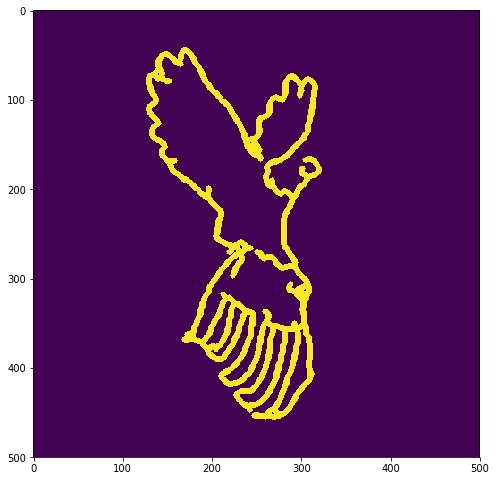

[68.0, 65.0, 63.0, 57.0, 55.0, 53.0, 52.0, 51.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 48.0, 45.0, 45.0, 44.0, 43.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 40.0, 39.0, 39.0, 38.0, 37.0, 37.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.

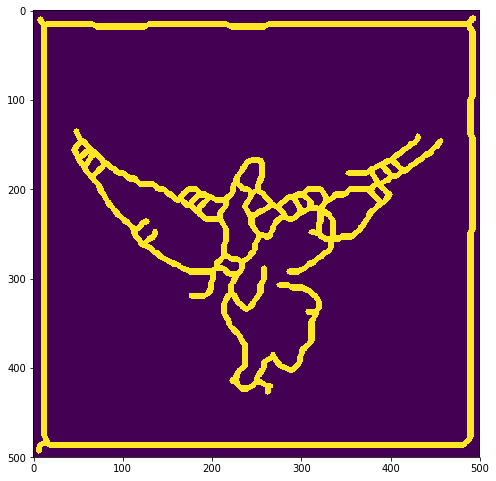

[477.0, 475.0, 475.0, 475.0, 475.0, 474.0, 474.0, 474.0, 470.0, 468.0, 461.0, 458.0, 237.0, 107.0, 103.0, 47.0, 45.0, 45.0, 44.0, 43.0, 42.0, 42.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 35.0, 35.0, 35.0, 34.0147027033899, 34.0, 34.0, 34.0, 34.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 

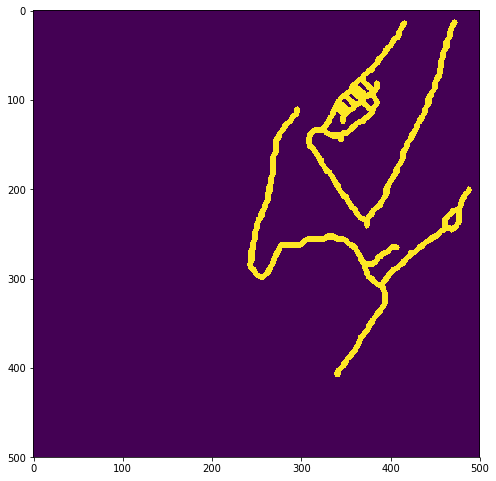

[50.0, 50.0, 50.0, 46.0, 44.0, 44.0, 44.0, 43.0, 42.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.

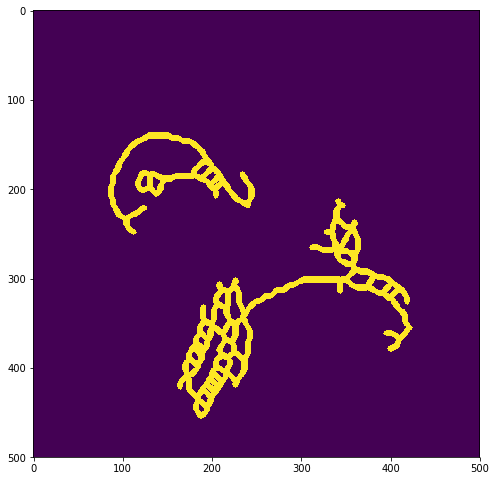

[59.0, 56.0, 52.0, 52.0, 48.0, 47.0, 46.0, 46.0, 46.0, 45.0, 44.0, 42.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.

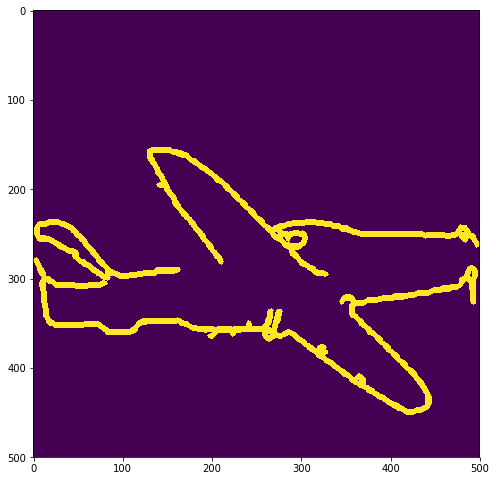

[53.0, 53.0, 53.0, 45.0, 43.0, 43.0, 42.0, 41.0, 38.0, 35.0, 32.0, 30.0, 29.0, 28.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.

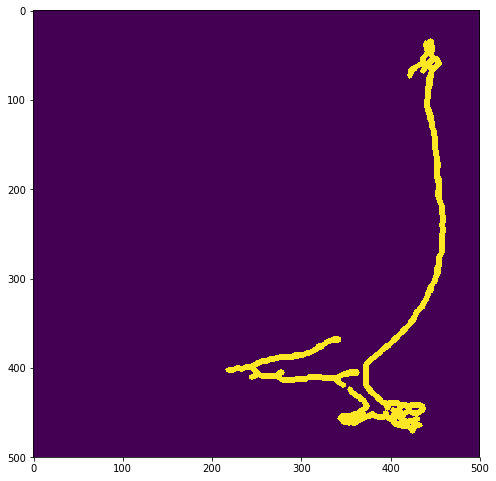

[108.0, 99.0, 78.0, 77.0, 76.0, 74.0, 68.0, 65.0, 64.0, 62.0, 61.0, 60.0, 57.0, 55.0, 55.0, 53.0, 49.0, 47.0, 47.0, 45.0, 42.0, 41.0, 39.0, 36.0, 35.0, 34.0, 34.0, 32.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 26.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10

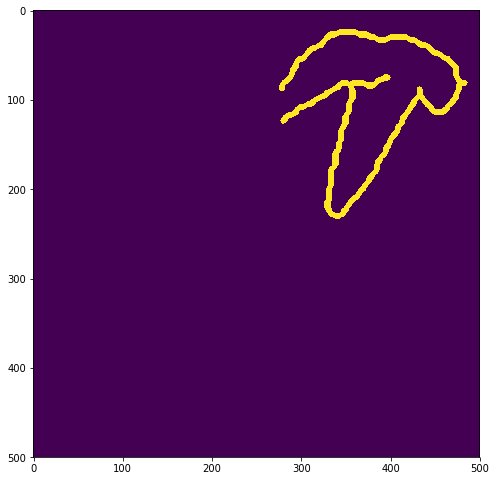

[55.0, 53.0, 50.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 37.0, 36.0, 35.0, 34.0, 31.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 24.0, 22.0, 22.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 

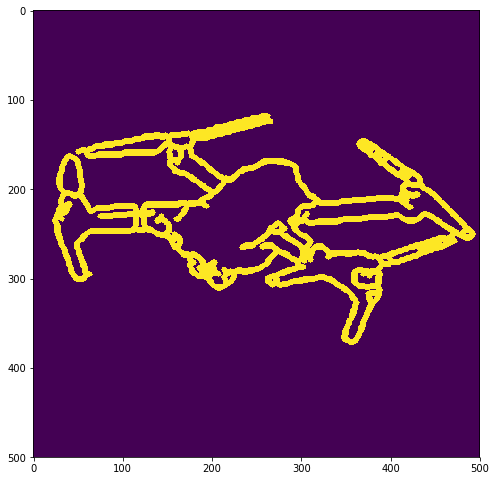

[69.0, 66.0, 49.0, 48.0, 46.0, 46.0, 43.0, 43.0, 43.0, 43.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 38.0, 37.0, 37.0, 36.0, 35.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.

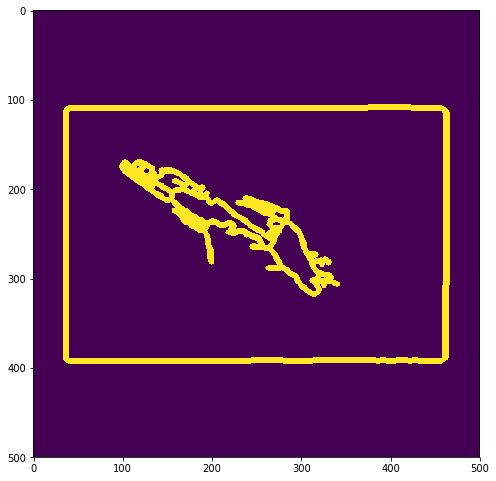

[289.0, 287.0, 287.0, 286.0, 285.0, 285.0, 283.0, 282.0, 281.0, 279.0, 278.0, 276.0, 274.0, 193.0, 86.0, 58.0, 57.0, 39.0, 36.0, 34.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 26.0, 25.0, 24.0, 24.0, 24.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 1

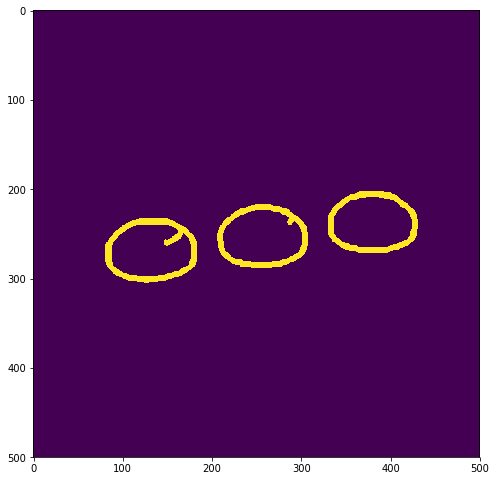

[39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 28.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 24.0, 24.0, 23.0, 22.0, 20.0, 19.0, 19.0, 17.0, 17.0, 17.0, 16.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 

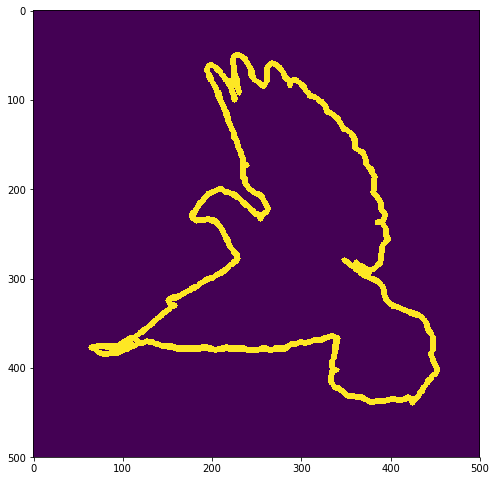

[63.0, 54.0, 53.0, 50.0, 50.0, 49.0, 48.0, 45.0, 42.0, 41.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 36.0, 35.0, 35.0, 34.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

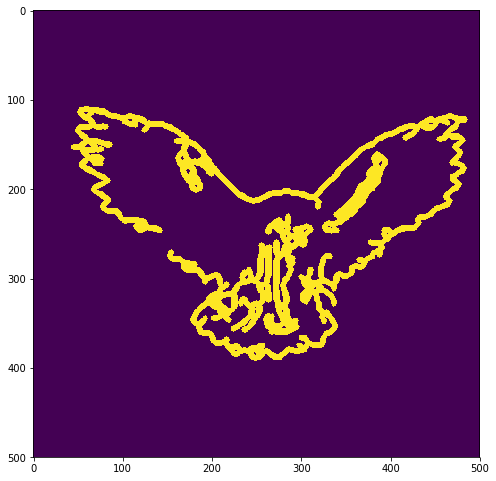

[84.0, 82.0, 81.0, 75.0, 75.0, 73.0, 72.0, 64.0, 63.0, 63.0, 60.0, 60.0, 57.0, 54.0, 54.0, 52.0, 52.0, 51.0, 51.0, 50.0, 50.0, 49.0, 49.0, 46.0, 43.0, 42.0, 42.0, 41.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.

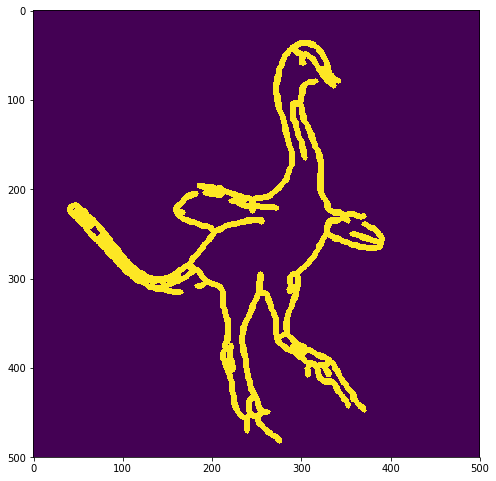

[91.0, 78.0, 68.0, 65.0, 60.0, 57.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 51.0, 50.0, 50.0, 47.0, 47.0, 46.0, 43.0, 43.0, 41.0, 41.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.

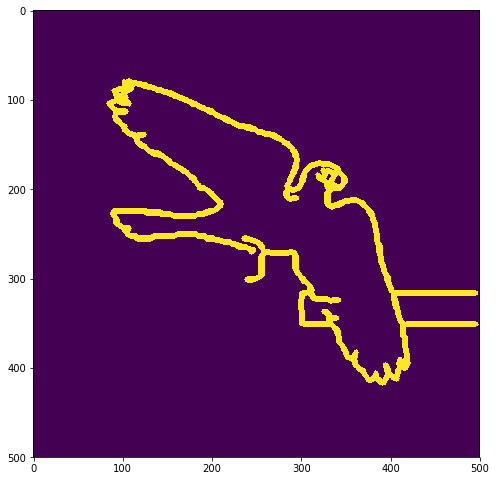

[55.0, 54.0, 41.0, 41.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

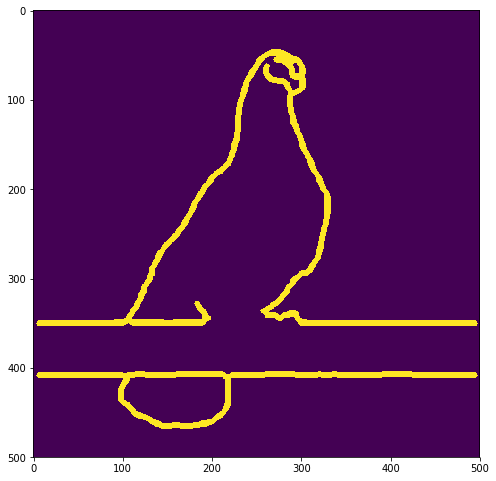

[62.0, 55.0, 49.0, 49.0, 49.0, 48.0, 48.0, 47.0, 45.0, 44.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 39.0, 38.0, 38.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 33.0, 32.0, 32.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.

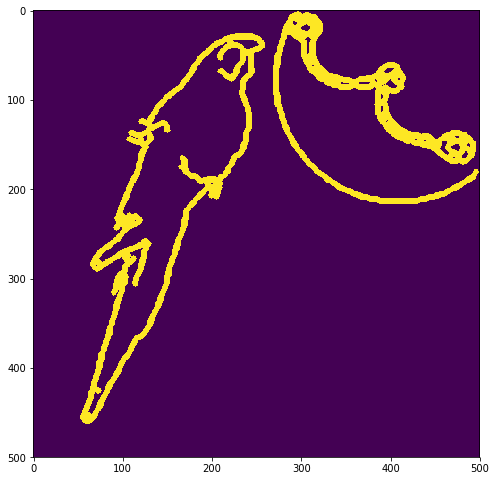

[77.0, 73.0, 70.0, 69.0, 69.0, 67.0, 63.0, 63.0, 61.0, 60.0, 59.0, 58.0, 58.0, 57.0, 56.0, 55.0, 54.0, 52.0, 48.0, 48.0, 44.0, 44.0, 43.0, 42.0, 42.0, 41.0, 39.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.

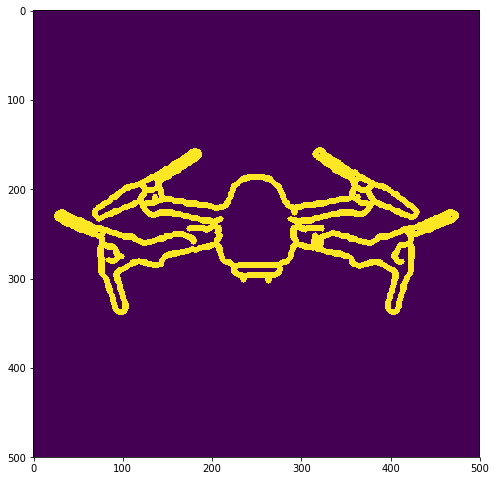

[62.0, 60.0, 59.0, 57.0, 57.0, 57.0, 57.0, 56.0, 55.0, 46.0, 40.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 33.0, 33.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 25.0, 25.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.

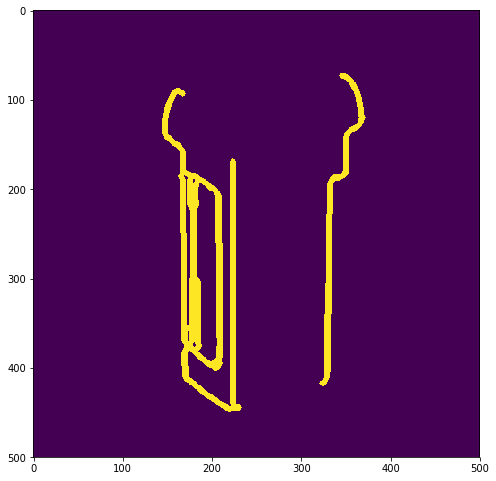

[281.0, 281.0, 281.0, 280.0, 280.0, 278.0, 271.0, 226.0, 222.0, 222.0, 222.0, 219.0, 218.0, 217.0, 204.0, 204.0, 202.0, 201.0, 200.0, 200.0, 200.0, 198.0, 194.0, 193.0, 191.0, 190.0, 189.0, 178.0, 178.0, 167.0, 166.0, 160.0, 153.0, 127.0, 119.0, 113.0, 99.0, 90.0, 90.0, 80.0, 80.0, 79.0, 78.0, 75.0, 66.0, 64.0, 62.0, 55.0, 50.0, 50.0, 50.0, 49.0, 49.0, 47.0, 46.0, 44.0, 42.0, 42.0, 41.0, 40.0, 39.0, 39.0, 39.0, 36.0, 36.0, 35.0, 32.0, 31.016124838541646, 31.0, 31.0, 30.0, 28.0, 28.0, 27.0, 27.0, 25.0, 24.0, 24.0, 24.0, 22.0, 22.0, 19.0, 19.0, 18.0, 18.0, 17.0, 17.0, 17.0, 16.0, 15.0, 15.0, 15.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.

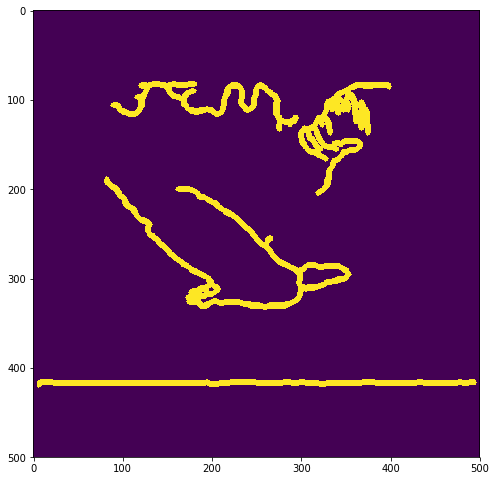

[40.0, 38.0, 37.0, 37.0, 36.0, 36.0, 35.0, 34.0, 34.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.

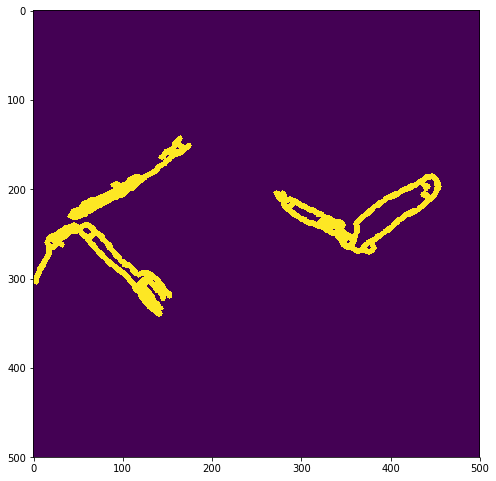

[41.0, 40.0, 39.0, 38.0, 35.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.

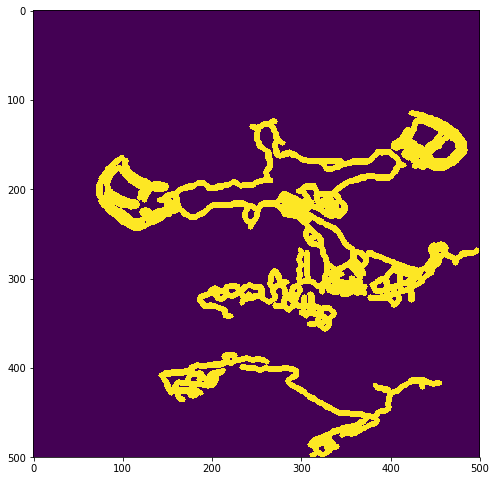

[63.0, 56.0, 56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 54.0, 52.0, 52.0, 51.0, 50.0, 50.0, 48.0, 48.0, 46.0, 46.0, 46.0, 46.0, 45.0, 44.0, 44.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.

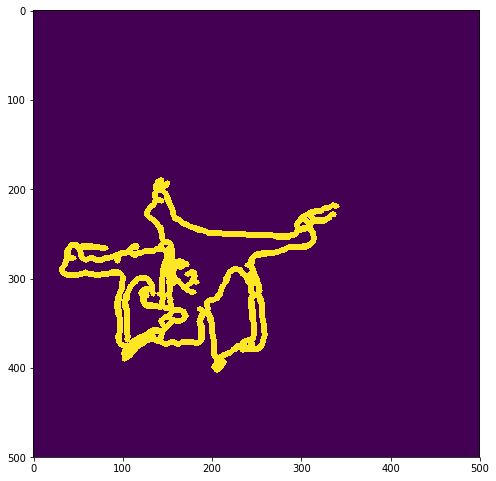

[110.0, 108.0, 107.0, 98.0, 97.0, 95.0, 93.0, 89.0, 85.0, 80.0, 73.0, 73.0, 71.0, 63.0, 62.0, 59.0, 58.0, 58.0, 58.0, 56.0, 56.0, 56.0, 55.0, 54.0, 53.0, 51.0, 48.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 45.0, 44.0, 44.0, 44.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 37.0, 35.0, 35.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 

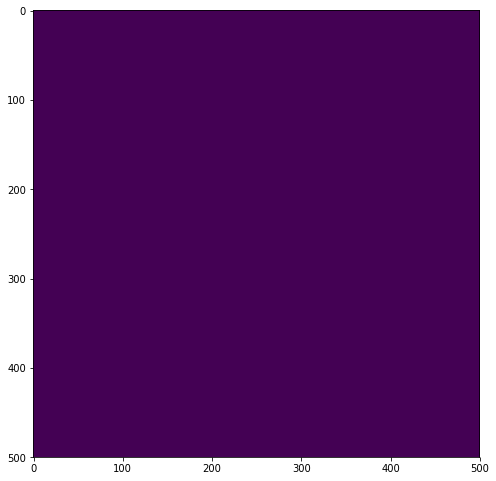

[]


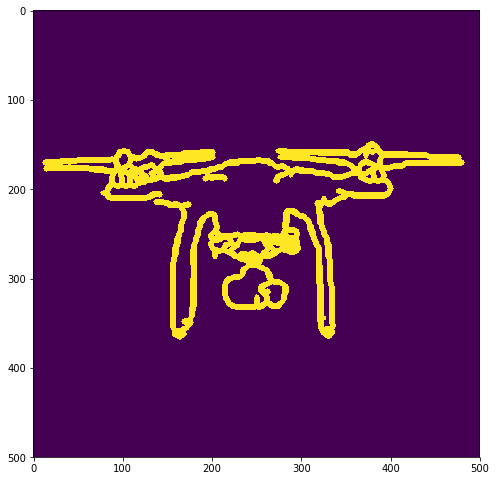

[113.0, 110.0, 106.0, 104.0, 103.0, 99.0, 98.0, 97.0, 97.0, 96.0, 96.0, 92.0, 91.0, 91.0, 90.0, 90.0, 89.0, 88.0, 88.0, 87.0, 85.0, 81.0, 78.0, 73.0, 59.0, 58.0, 56.0, 54.0, 52.0, 52.0, 52.0, 49.0, 48.0, 47.0, 47.0, 45.0, 41.0, 40.0, 40.0, 38.0, 38.0, 37.0, 37.0, 36.0, 35.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0

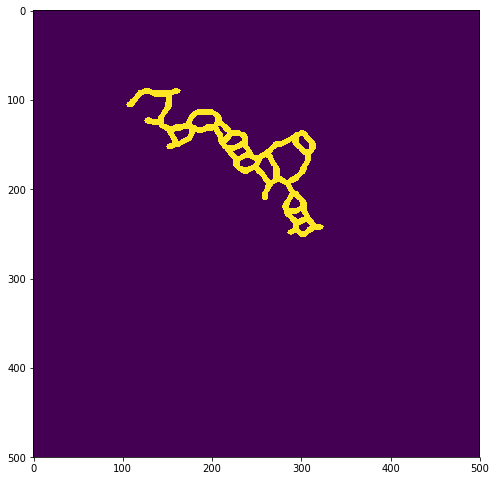

[29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.

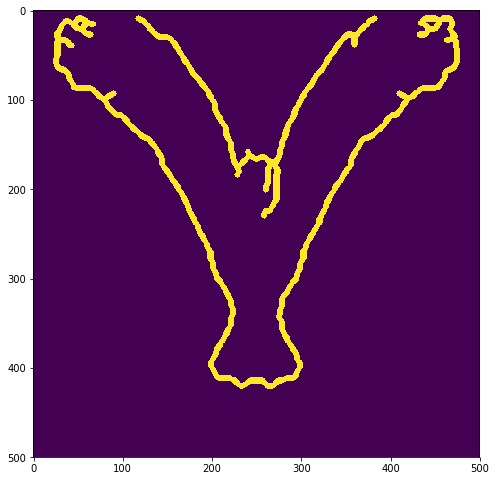

[60.0, 55.0, 55.0, 54.0, 49.0, 47.0, 46.0, 44.0, 44.0, 43.0, 42.0, 42.0, 41.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 32.0, 31.0, 31.0, 31.0, 31.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

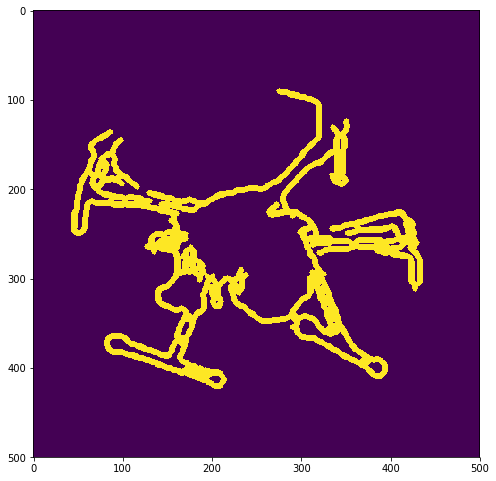

[91.0, 80.0, 78.0, 74.0, 65.0, 64.0, 64.0, 64.0, 63.0, 63.0, 63.0, 61.0, 61.0, 55.0, 54.0, 54.0, 52.0, 52.0, 52.0, 51.0, 50.0, 50.0, 49.0, 49.0, 48.0, 48.0, 47.0, 45.0, 45.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.

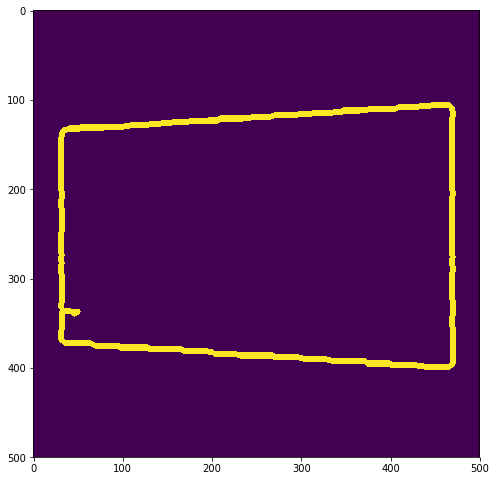

[297.0, 297.0, 295.0, 293.0, 291.0, 288.0, 243.0, 242.0, 241.0, 239.0, 237.0, 198.0, 81.0, 66.0, 59.0, 40.0, 33.0, 32.0, 30.0, 25.0, 24.0, 24.0, 17.0, 12.0, 10.0, 10.0, 10.0, 10.0, 9.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0,

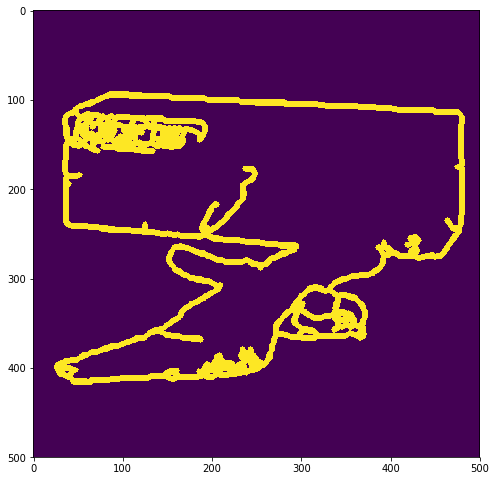

[140.0, 139.0, 137.0, 134.0, 128.0, 128.0, 127.0, 126.0, 123.0, 91.0, 62.0, 52.0, 50.0, 49.0, 45.0, 44.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 38.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 

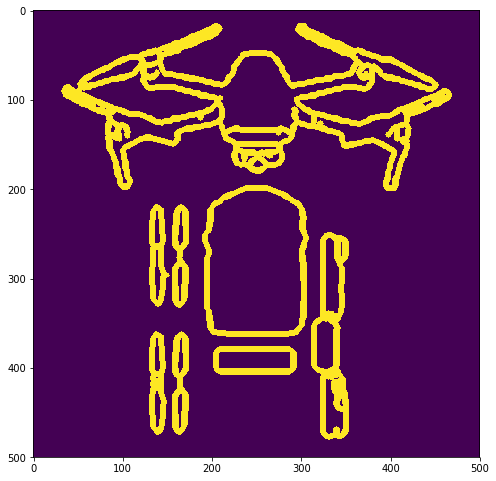

[134.0, 127.00393694685216, 124.00403219250575, 113.00442469213318, 113.0, 112.0, 111.0, 111.0, 110.0, 109.0, 109.0, 108.0, 108.0, 106.0, 106.0, 105.0, 104.0, 103.0, 103.0, 101.0, 99.0, 99.0, 98.0, 98.0, 97.0, 97.0, 97.0, 96.0, 96.0, 95.0, 95.0, 94.0, 94.0, 94.0, 93.0, 87.0, 77.0, 76.0, 76.0, 76.0, 75.0, 74.0, 74.0, 74.0, 74.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 71.0, 71.0, 69.0, 67.0, 67.0, 67.0, 63.0, 63.0, 61.0, 61.0, 59.0, 59.0, 58.0, 57.0, 57.0, 57.0, 57.0, 57.0, 56.0, 55.0, 55.0, 54.0, 54.0, 53.0, 53.0, 52.0, 52.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0

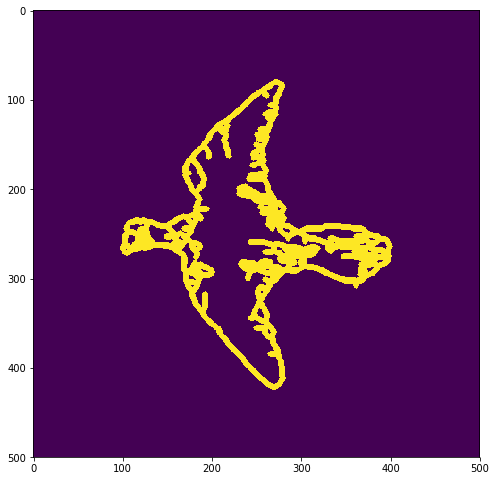

[65.0, 63.0, 55.0, 52.0, 51.0, 50.0, 49.0, 48.0, 45.0, 45.0, 44.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.

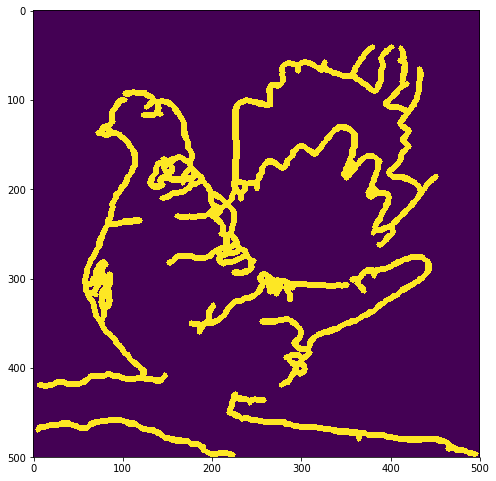

[106.0, 106.0, 104.0, 102.0, 102.0, 94.0, 81.0, 68.0, 55.0, 52.0, 52.0, 48.0, 48.0, 47.0, 47.0, 46.0, 46.0, 45.0, 45.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0

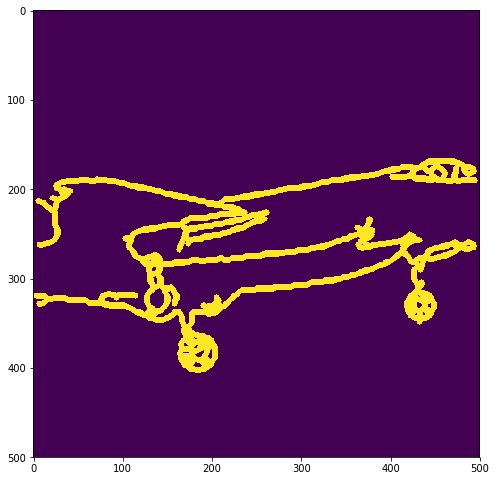

[67.0, 66.0, 63.0, 62.0, 52.0, 52.0, 51.0, 50.0, 48.0, 46.0, 45.0, 43.0, 42.0, 42.0, 42.0, 41.0, 40.0, 39.0, 39.0, 39.0, 38.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

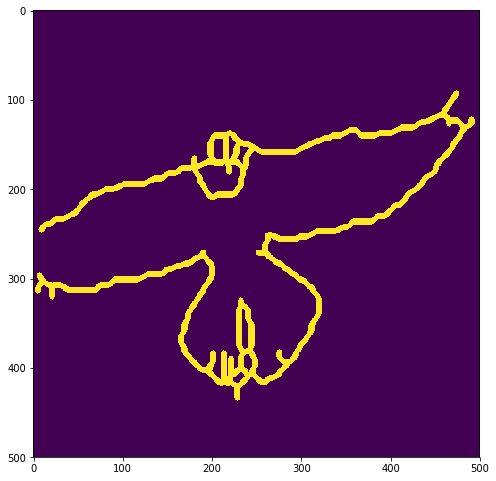

[83.0, 82.0, 82.0, 62.0, 59.0, 55.0, 53.0, 53.0, 52.0, 48.0, 48.0, 45.0, 45.0, 43.0, 41.0, 39.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.018512172212592, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 1

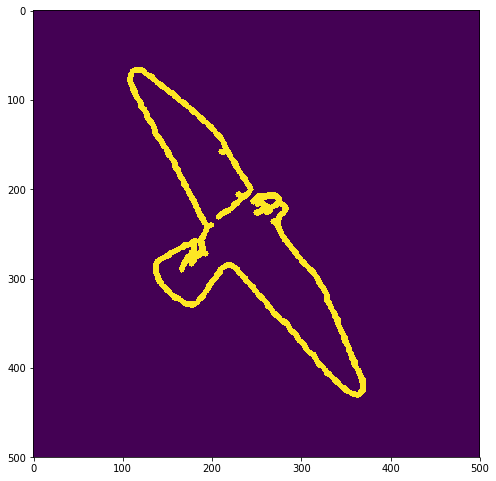

[31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.

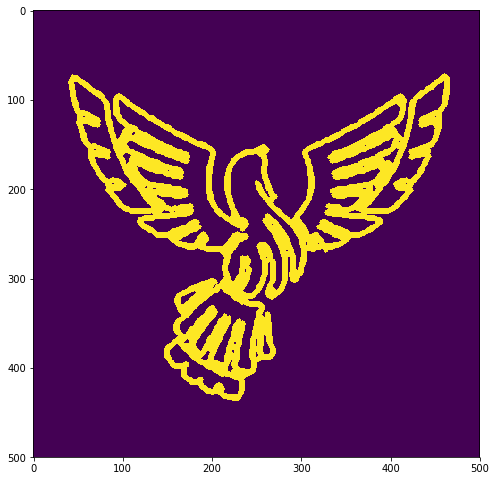

[72.0, 70.0, 68.0, 67.0, 67.0, 66.0, 66.0, 65.0, 65.0, 65.0, 64.0, 61.0, 60.0, 60.0, 59.0, 59.0, 58.0, 58.0, 58.0, 56.0, 55.0, 55.0, 55.0, 55.0, 54.0, 54.0, 53.0, 53.0, 53.0, 52.0, 51.0, 51.0, 50.0, 50.0, 50.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.

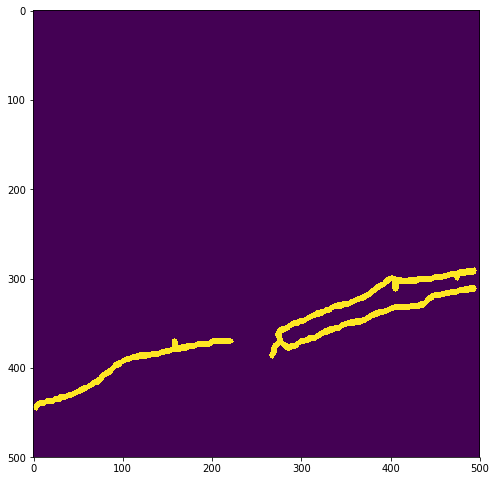

[21.0, 20.0, 20.0, 20.0, 19.0, 16.0, 16.0, 16.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 12.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0,

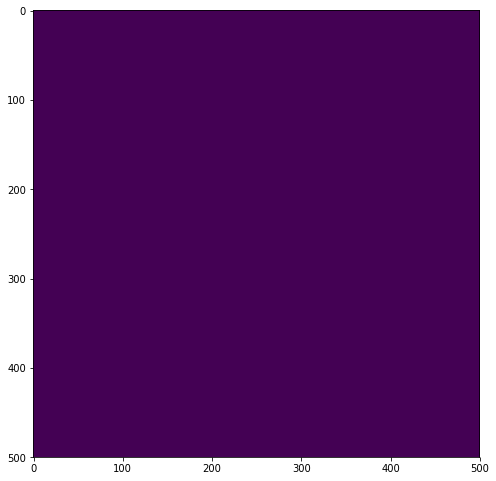

[]


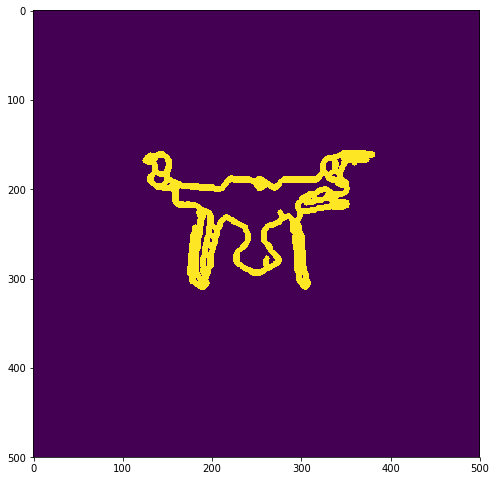

[98.0, 95.0, 94.0, 93.0, 91.0, 86.0, 71.0, 70.0, 70.0, 70.0, 68.0, 67.0, 67.0, 66.0, 64.0, 61.0, 60.0, 60.0, 60.0, 59.0, 59.0, 58.0, 58.0, 58.0, 54.0, 53.0, 52.0, 48.0, 48.0, 43.0, 42.0, 42.0, 42.0, 41.0, 41.0, 39.0, 37.0, 36.0, 36.0, 36.0, 35.0, 34.0, 34.0, 34.0, 33.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

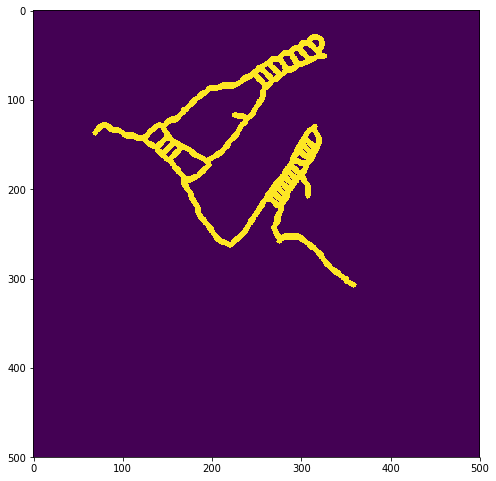

[34.0, 32.0, 32.0, 29.0, 29.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.

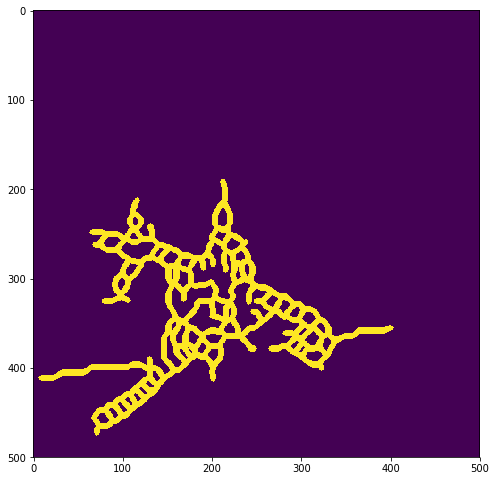

[84.0, 58.0, 56.0, 54.0, 54.0, 53.0, 52.0, 48.0, 47.0, 46.0, 46.0, 45.0, 45.0, 45.0, 44.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.

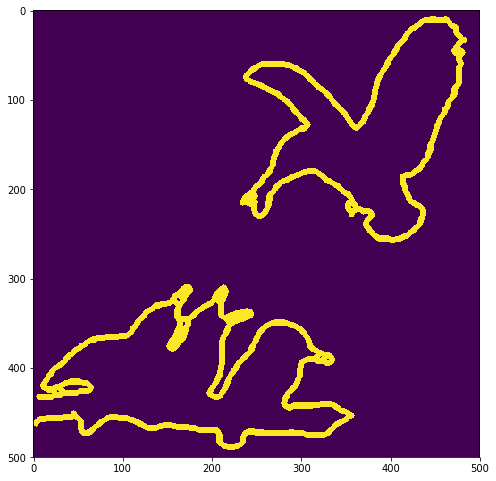

[66.0, 63.0, 60.0, 54.0, 53.0, 52.0, 51.0, 47.0, 47.0, 47.0, 46.0, 46.0, 44.0, 43.0, 40.0, 40.0, 39.0, 38.0, 38.0, 37.0, 37.0, 36.0, 35.0, 35.0, 33.0, 33.0, 33.0, 33.0, 32.0, 31.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

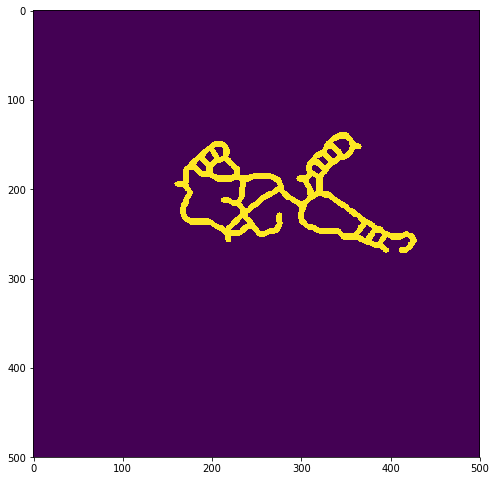

[49.0, 46.0, 45.0, 45.0, 37.0, 36.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.

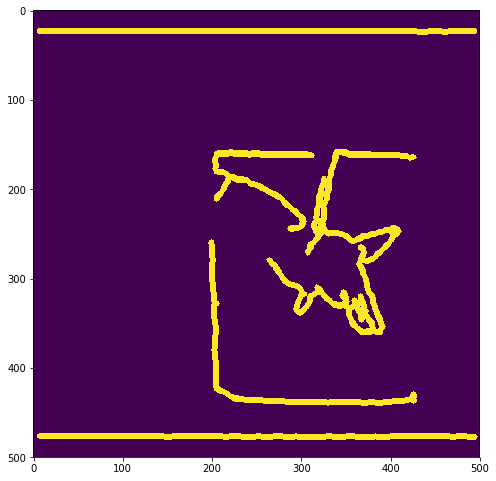

[165.0, 165.0, 163.0, 121.0, 111.0, 94.0, 70.0, 66.0, 65.0, 65.0, 57.0, 53.0, 50.0, 48.0, 46.0, 44.0, 43.0, 40.0, 39.0, 36.0, 35.0, 35.0, 35.0, 35.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 26.019223662515376, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12

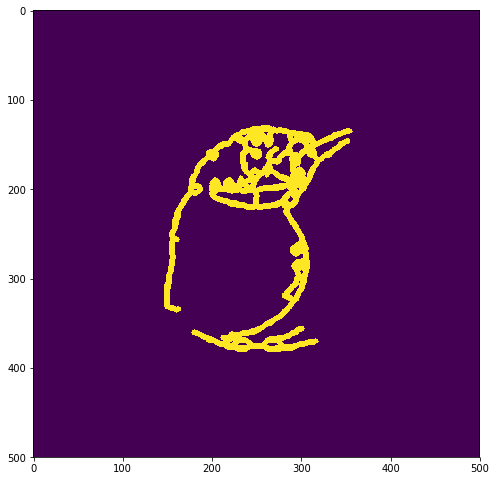

[74.0, 65.0, 64.0, 62.0, 61.0, 61.0, 60.0, 60.0, 60.0, 59.0, 59.0, 58.0, 57.0, 54.0, 50.0, 49.0, 46.0, 45.0, 42.0, 41.0, 40.0, 40.0, 40.0, 39.0, 38.0, 38.0, 37.0, 37.0, 37.0, 35.0, 34.0, 31.0, 31.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.

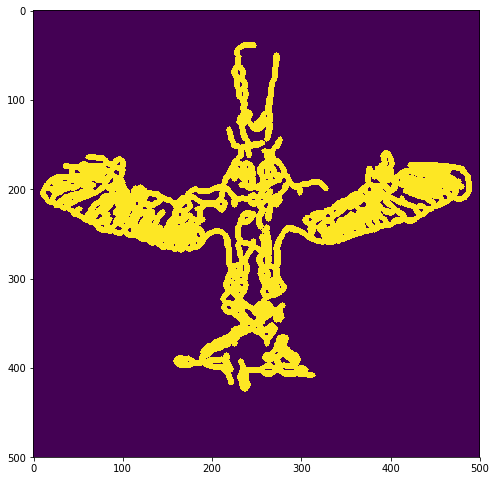

[107.0, 87.0, 83.0, 81.0, 80.00624975587844, 80.0, 79.0, 79.0, 76.0, 74.0, 74.0, 73.0, 72.0, 70.0, 70.0, 69.0, 68.0, 67.0, 66.007575322837, 66.0, 66.0, 66.0, 66.0, 64.0, 64.0, 64.0, 64.0, 64.0, 62.0, 62.0, 62.0, 61.0, 61.0, 60.0, 59.0, 58.0, 58.0, 58.0, 58.0, 58.0, 57.0, 57.0, 57.0, 57.0, 57.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 54.0, 54.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40

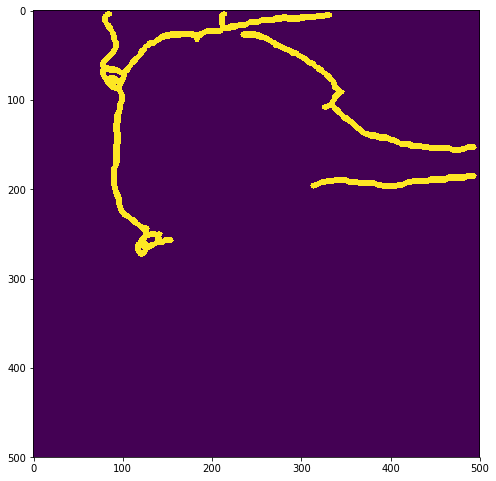

[105.0, 96.0, 94.0, 92.0, 72.0, 72.0, 55.0, 50.0, 48.0, 34.0, 33.0, 32.0, 32.0, 32.0, 31.0, 29.0, 29.0, 26.0, 26.0, 26.0, 25.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0,

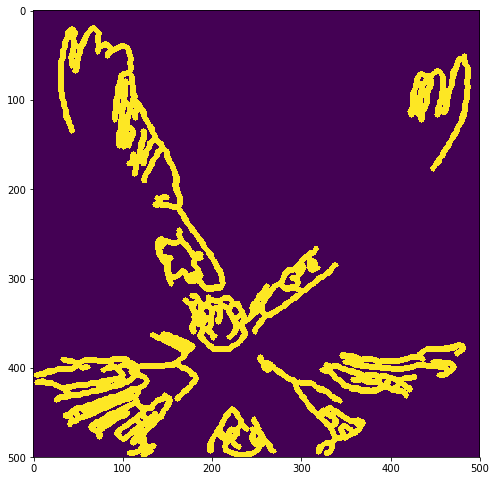

[88.0, 88.0, 87.0, 86.0, 84.0, 83.0, 83.0, 78.0, 75.0, 72.0, 71.0, 70.0, 66.0, 61.0, 57.0, 57.0, 57.0, 55.0, 53.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 51.0, 50.0, 49.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.

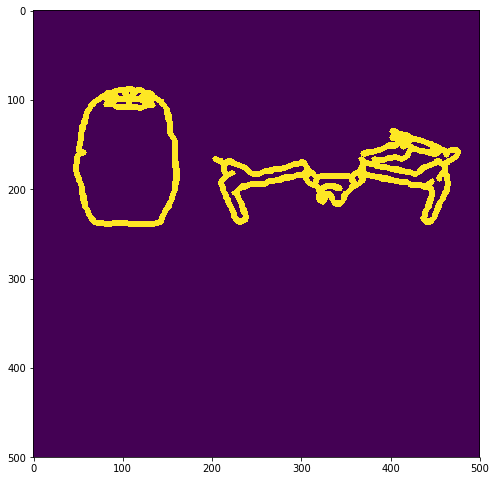

[76.0, 71.0, 70.0, 66.0, 61.0, 59.0, 57.0, 52.0, 47.0, 46.0, 43.0, 42.0, 42.0, 41.0, 40.0, 39.0, 37.0, 36.0, 36.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.

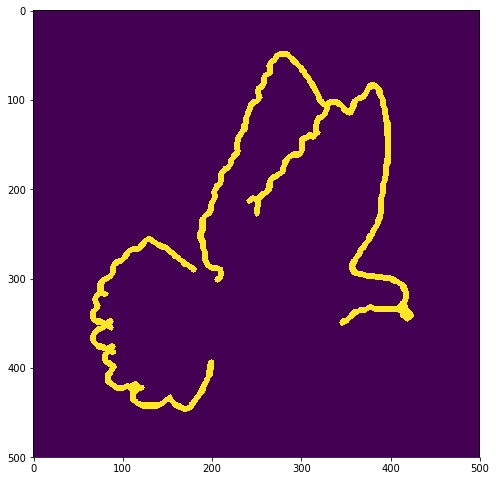

[106.0, 86.0, 80.0, 68.0, 57.0, 55.0, 54.0, 51.0, 50.0, 47.0, 46.0, 44.0, 44.0, 43.0, 43.0, 41.0, 41.0, 41.0, 39.0, 38.0, 35.0, 34.0, 34.0, 34.0, 33.0, 31.0, 31.0, 29.0, 29.0, 29.0, 29.0, 29.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15

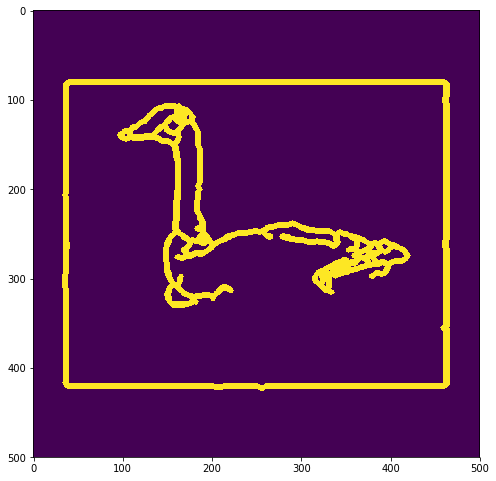

[346.0, 346.0, 345.0, 344.0, 344.0, 344.0, 343.0, 342.0, 340.0, 340.0, 337.0, 175.0, 128.0, 120.0, 119.0, 114.0, 112.0, 109.0, 105.0, 105.0, 104.0, 100.0, 88.0, 86.0, 77.0, 77.0, 72.0, 62.0, 52.0, 51.0, 49.0, 47.0, 46.0, 44.0, 44.0, 43.0, 41.0, 41.0, 41.0, 40.0, 39.0, 39.0, 36.0, 35.0, 34.0, 33.0, 33.0, 33.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0,

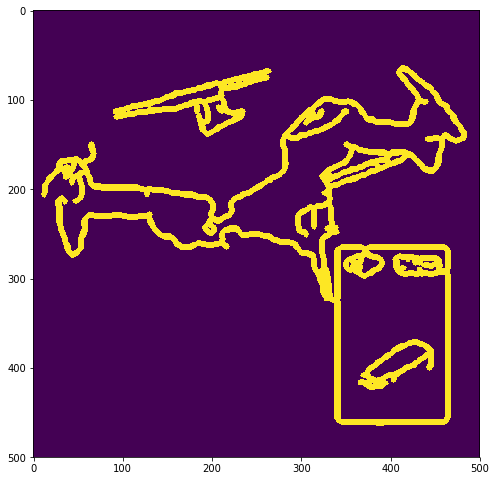

[199.0, 199.0, 198.0, 197.0, 197.0, 195.0, 195.0, 192.0, 192.0, 191.0, 188.0, 164.0, 160.0, 137.0, 79.0, 74.0, 70.0, 68.0, 60.0, 59.0, 59.0, 58.0, 51.0, 49.0, 48.0, 47.0, 46.0, 45.0, 45.0, 45.0, 44.0, 43.0, 43.0, 42.0, 40.0, 40.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 2

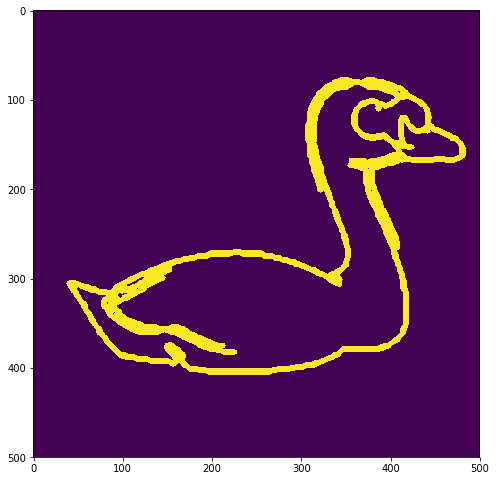

[102.0, 98.0, 92.0, 89.0, 83.0, 78.0, 72.0, 70.0, 69.0, 65.0, 63.0, 61.0, 59.0, 57.0, 57.0, 56.0, 55.0, 55.0, 51.0, 51.0, 51.0, 50.0, 50.0, 48.0, 47.0, 47.0, 44.0, 43.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19

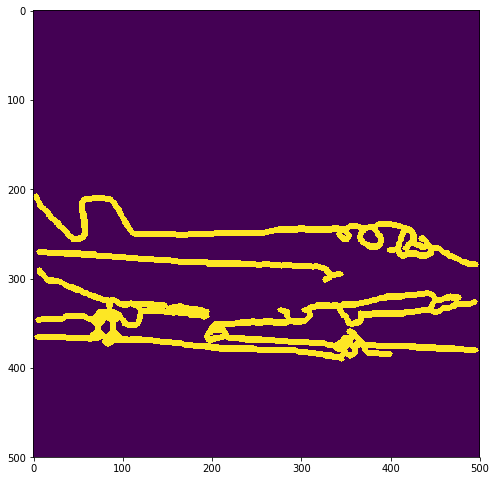

[54.0, 53.0, 48.0, 48.0, 47.0, 40.0, 39.0, 38.0, 37.0, 36.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 31.0, 31.0, 30.0, 30.0, 29.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.

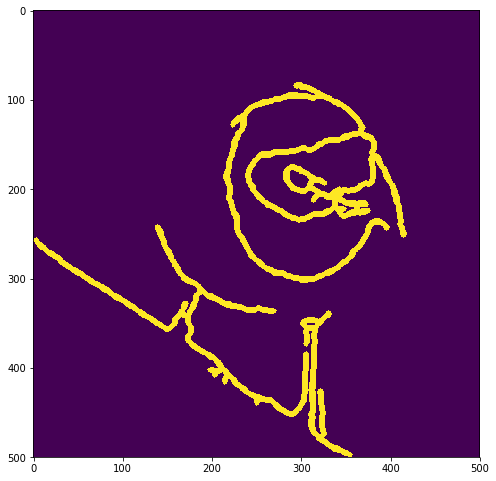

[124.0, 123.0, 119.0, 99.0, 79.0, 71.0, 69.0, 62.0, 60.0, 59.0, 59.0, 58.0, 58.0, 57.0, 56.0, 56.0, 56.0, 55.0, 55.0, 53.0, 53.0, 53.0, 49.0, 48.0, 48.0, 47.0, 47.0, 43.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 

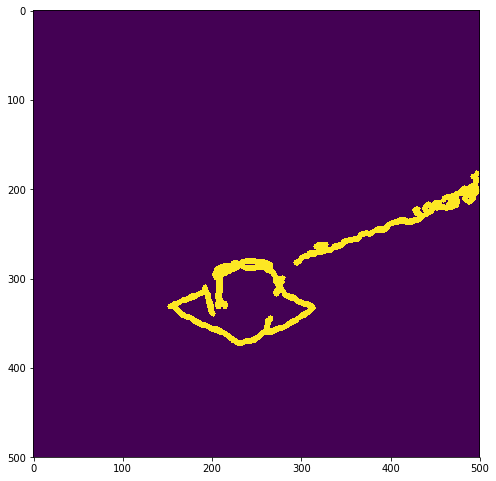

[49.0, 49.0, 48.0, 47.0, 47.0, 47.0, 32.0, 31.0, 31.0, 31.0, 30.0, 28.0, 26.0, 26.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0,

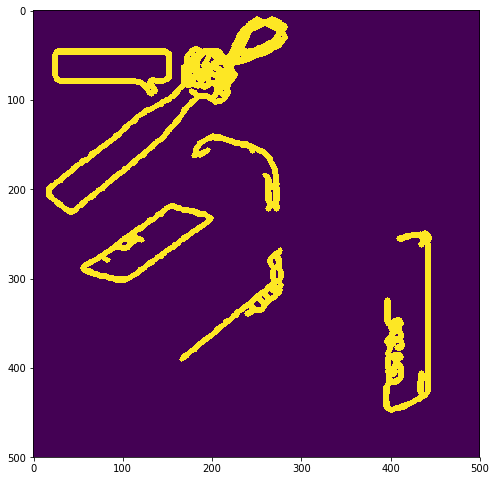

[188.0, 187.0, 186.0, 185.0, 182.0, 179.0, 165.0, 96.0, 85.0, 83.0, 70.0, 69.0, 67.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 51.0, 51.0, 50.0, 50.0, 49.0, 49.0, 48.0, 47.0, 46.0, 46.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22

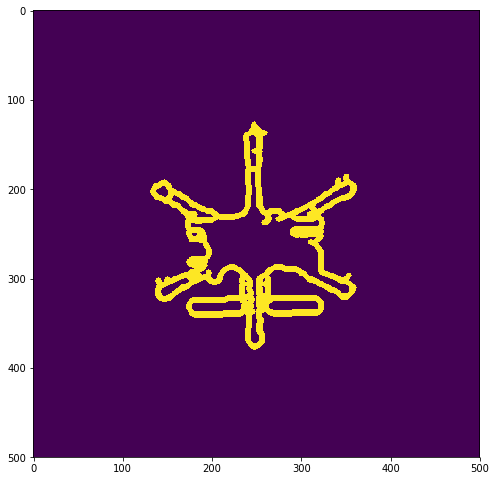

[94.0, 93.0, 92.0, 92.0, 92.0, 92.0, 91.0, 91.0, 89.0, 81.0, 80.0, 79.0, 78.0, 78.0, 75.0, 65.0, 63.0, 60.0, 55.0, 53.0, 52.0, 52.0, 51.0, 50.0, 49.0, 49.0, 48.0, 48.0, 47.0, 46.0, 45.0, 39.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 35.0, 33.0, 33.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.

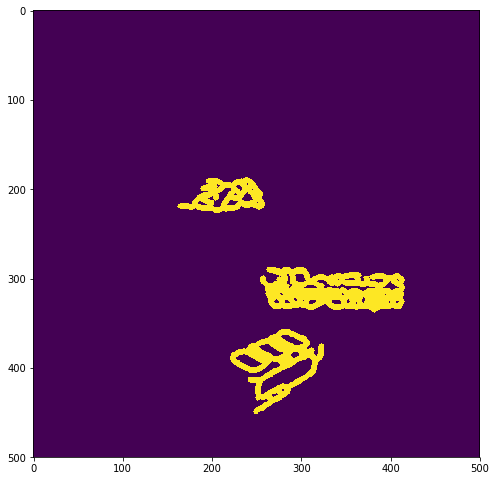

[45.0, 45.0, 42.0, 42.0, 39.0, 38.0, 37.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.

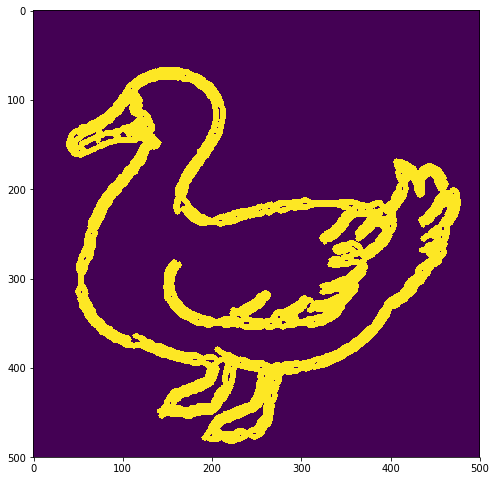

[76.0, 75.0, 74.0, 73.0, 73.0, 73.0, 71.0, 71.0, 70.0, 70.0, 68.0, 63.0, 63.0, 62.0, 61.0, 61.0, 61.0, 59.0, 59.0, 57.0, 57.0, 57.0, 56.0, 55.0, 55.0, 55.0, 54.00925846556311, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.013886210738214, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 

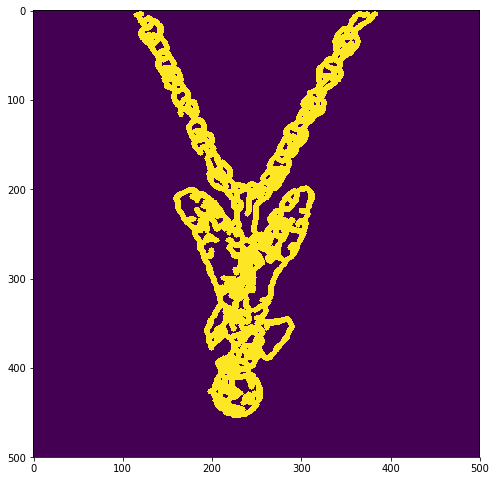

[92.0, 89.0, 87.0, 86.0, 86.0, 81.0, 79.0, 77.0, 75.0, 74.0, 74.0, 74.0, 74.0, 73.0, 71.0, 68.0, 65.0, 63.0, 63.0, 62.0, 62.0, 62.0, 60.0, 59.0, 58.0, 58.0, 57.0, 57.0, 57.0, 56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 49.0, 48.0, 48.0, 47.0, 46.0, 46.0, 46.0, 45.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.013511046643494, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.015148038438355, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0,

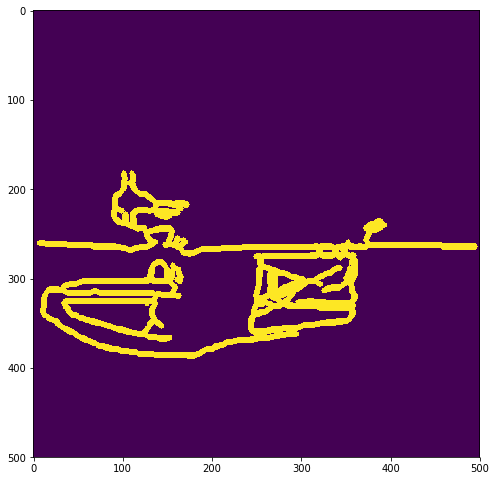

[76.0, 74.0, 59.0, 53.0, 46.0, 45.0, 45.0, 43.0, 40.0, 39.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.

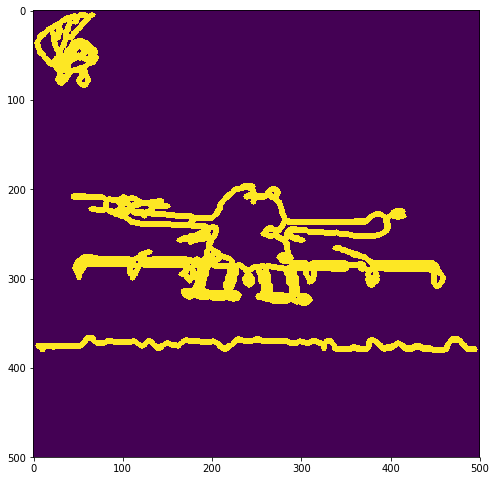

[67.0, 59.0, 58.0, 56.0, 55.0, 54.0, 53.0, 53.0, 51.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 45.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 35.0, 35.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.

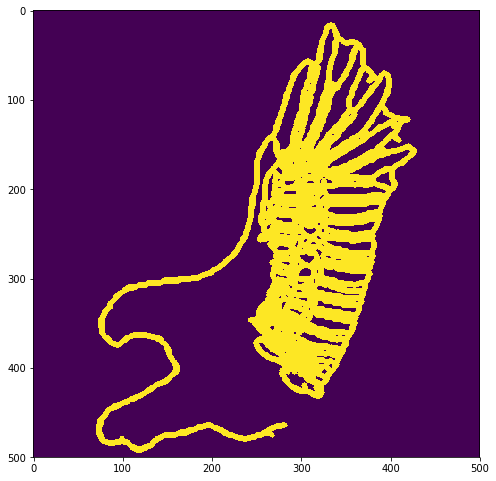

[214.0, 168.0, 165.0, 150.0, 144.0, 144.0, 143.0, 127.0, 118.0, 115.0, 115.0, 113.0, 113.0, 104.0, 102.0, 101.0, 100.0, 100.0, 99.0, 94.00531899844816, 90.0, 88.0, 87.0, 86.0, 86.0, 85.0, 85.0, 84.0, 84.0, 83.0, 81.0, 80.0, 80.0, 77.0, 77.0, 74.0, 74.0, 74.0, 74.0, 73.0, 73.0, 73.0, 73.0, 72.0, 71.0, 71.0, 71.0, 71.0, 70.0, 70.0, 70.0, 69.0, 69.0, 68.00735254367721, 68.0, 68.0, 68.0, 68.0, 67.0, 66.0, 66.0, 66.0, 66.0, 65.0, 65.0, 65.0, 64.0, 64.0, 64.0, 64.0, 63.0, 63.0, 63.0, 62.0, 61.0, 60.0, 60.0, 59.0, 59.0, 59.0, 58.0, 58.0, 58.0, 57.0, 57.0, 56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 55.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 50.00999900019995, 50.0, 50.0, 49.01020301937138, 49.0, 49.0, 48.0, 47.01063709417264, 47.01063709417264, 47.01063709417264, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 46.010868281309364, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 

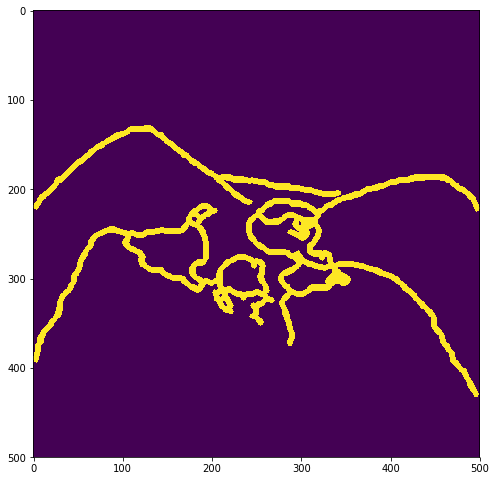

[51.0, 49.0, 41.0, 41.0, 39.0, 39.0, 37.0, 37.0, 35.0, 35.0, 34.0, 34.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 29.0, 29.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.

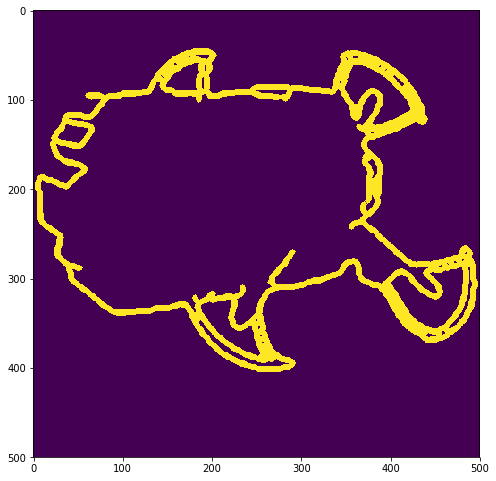

[67.0, 63.0, 58.0, 58.0, 56.0, 56.0, 55.0, 55.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 51.0, 51.0, 50.0, 50.0, 49.0, 49.0, 49.0, 48.0, 48.0, 47.0, 46.0, 45.0, 45.0, 45.0, 44.0, 44.0, 43.0, 43.0, 43.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.013886210738214, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 2

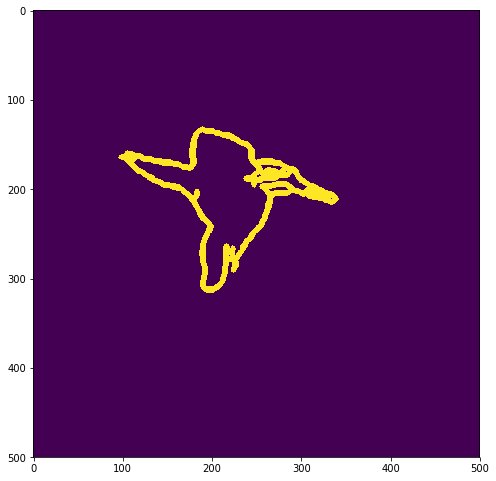

[67.0, 65.0, 61.0, 58.0, 42.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 37.0, 37.0, 35.0, 35.0, 32.0, 31.0, 29.0, 29.0, 28.0, 28.0, 27.0, 27.0, 26.0, 25.0, 25.0, 23.0, 23.0, 23.0, 22.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.

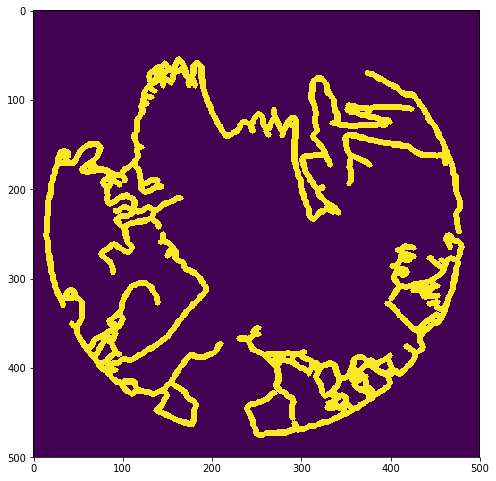

[99.0, 81.0, 73.0, 72.0, 70.0, 69.0, 69.0, 68.0, 67.0, 65.0, 63.0, 62.0, 61.0, 60.0, 59.0, 59.0, 58.0, 57.0, 55.0, 54.0, 52.0, 51.0, 51.0, 50.0, 49.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 46.0, 45.0, 45.0, 44.0, 43.0, 43.0, 42.0, 41.0, 41.0, 41.0, 40.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.

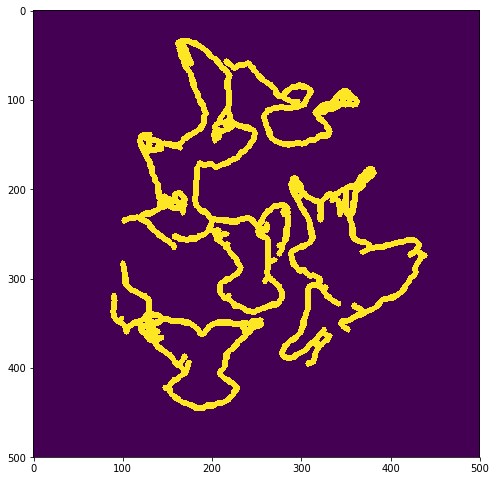

[71.0, 69.0, 59.0, 57.0, 55.0, 54.0, 53.0, 53.0, 53.0, 52.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 49.0, 49.0, 47.0, 47.0, 46.0, 44.0, 44.0, 44.0, 44.0, 44.0, 42.0, 42.0, 41.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.

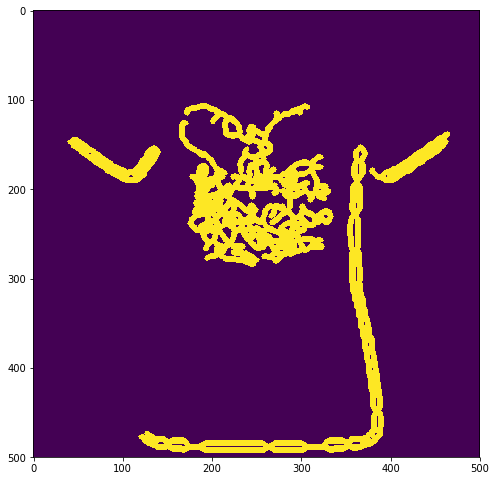

[191.0, 179.0, 169.0, 144.0, 131.0, 125.0, 122.0, 121.0, 118.0, 98.0, 97.0, 96.0, 96.0, 93.0, 91.0, 90.0, 85.0, 82.0, 79.0, 79.0, 77.0, 77.0, 76.0, 75.0, 74.0, 74.0, 73.0, 73.0, 73.0, 72.0, 67.0, 66.0, 64.0, 64.0, 63.0, 62.0, 62.0, 61.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 59.0, 58.0, 57.0, 57.0, 57.0, 56.0, 55.0, 55.0, 54.0, 54.0, 53.0, 53.0, 51.0, 51.0, 51.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 42.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 

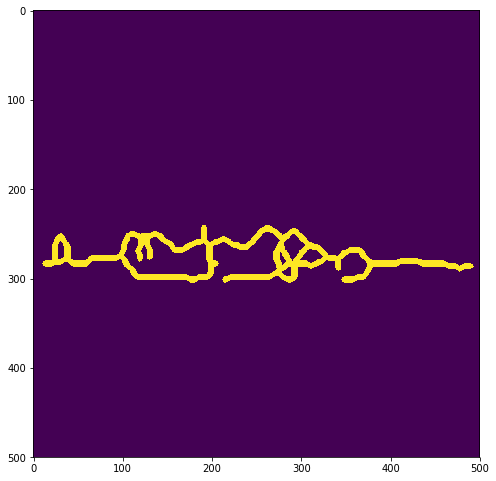

[42.0, 41.0, 40.0, 40.0, 40.0, 38.0, 37.0, 36.0, 34.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0

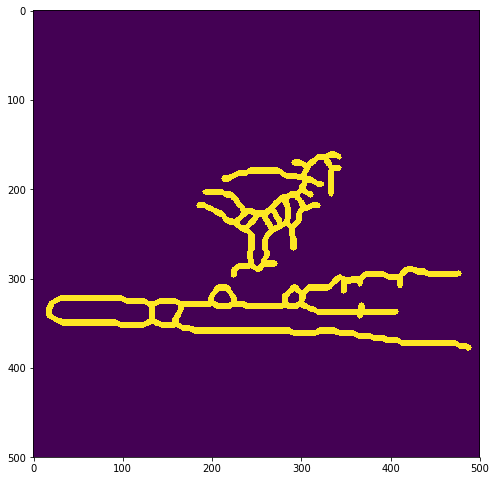

[53.0, 44.0, 42.0, 42.0, 41.0, 40.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 32.0, 32.0, 32.0, 31.0, 31.0, 30.0, 29.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.

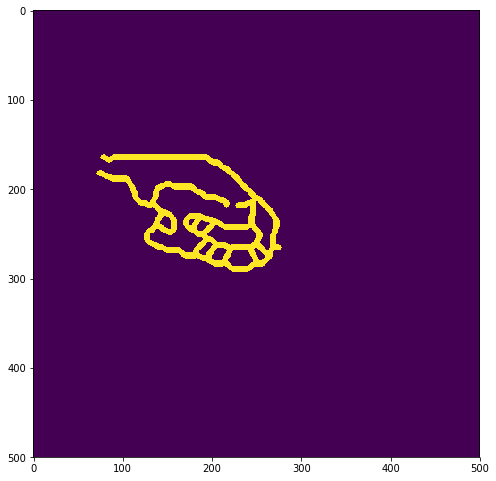

[44.0, 44.0, 43.0, 43.0, 42.0, 40.0, 32.0, 32.0, 30.0, 30.0, 29.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 21.0, 21.0, 20.0, 20.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0

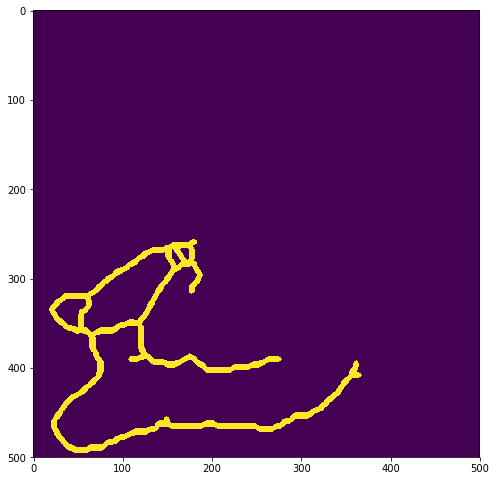

[50.0, 41.0, 38.0, 38.0, 38.0, 36.0, 34.0, 33.0, 31.0, 30.0, 30.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0,

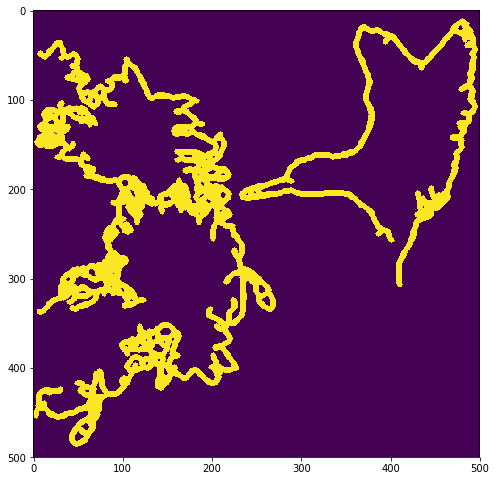

[91.0, 88.0, 82.0, 82.0, 81.0, 77.0, 74.0, 74.0, 71.0, 70.0, 66.0, 65.0, 63.0, 62.0, 62.0, 61.0, 61.0, 60.0, 60.0, 59.0, 58.0, 58.0, 57.0, 57.0, 55.0, 55.0, 55.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.

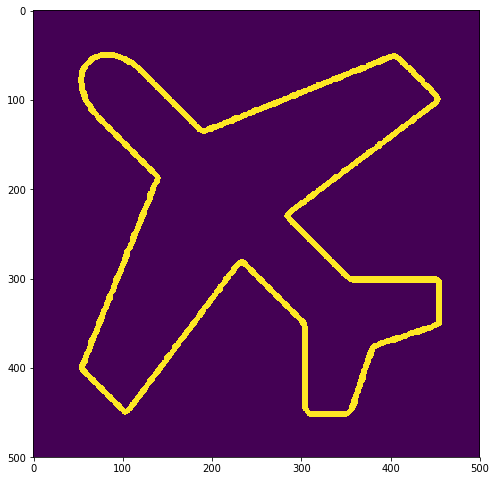

[103.0, 102.0, 102.0, 102.0, 101.0, 101.0, 100.0, 57.0, 55.0, 55.0, 53.0, 51.0, 49.0, 45.0, 42.0, 38.0, 33.0, 28.0, 25.0, 24.0, 24.0, 24.0, 23.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10

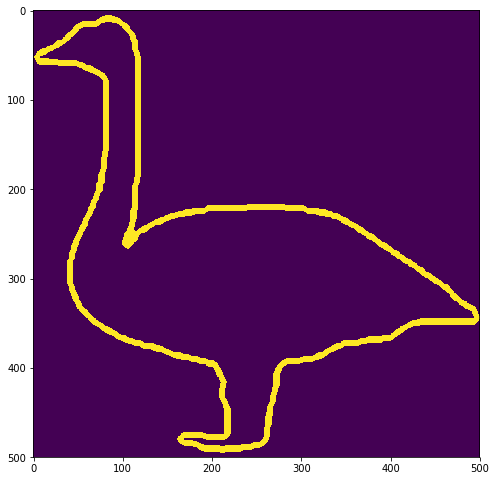

[208.0, 201.0, 190.0, 186.0, 148.00337833982033, 134.0, 129.0, 124.0, 121.0, 110.0, 107.0, 103.0, 87.0, 79.0, 70.0, 67.0, 66.0, 61.0, 56.0, 55.0, 52.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 41.0, 40.0, 39.0, 39.0, 39.0, 39.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 33.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 28.0, 28.0, 28.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 24.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.

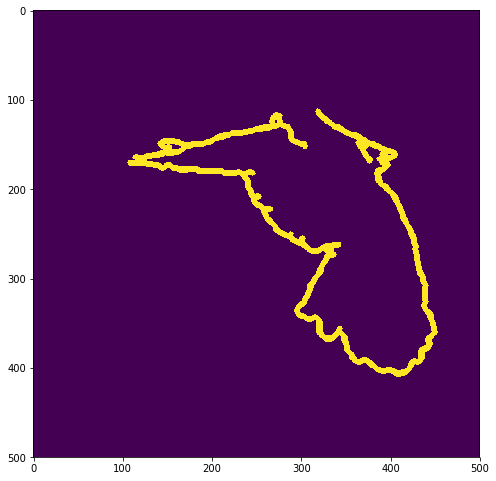

[43.0, 42.0, 42.0, 41.0, 37.0, 37.0, 37.0, 34.0, 34.0, 31.0, 29.0, 29.0, 28.0, 28.0, 28.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.

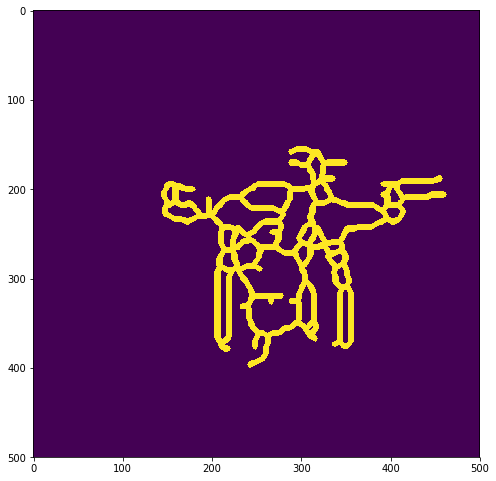

[108.0, 105.0, 102.0, 96.0, 90.0, 88.0, 85.0, 82.0, 82.0, 81.0, 81.0, 80.0, 79.0, 78.0, 78.0, 76.0, 75.0, 74.0, 70.0, 70.0, 70.0, 70.0, 70.0, 66.0, 63.0, 61.0, 61.0, 60.0, 60.0, 59.0, 59.0, 55.0, 55.0, 53.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 47.0, 46.0, 46.0, 43.0, 43.0, 42.0, 42.0, 41.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 38.0, 37.0, 37.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 

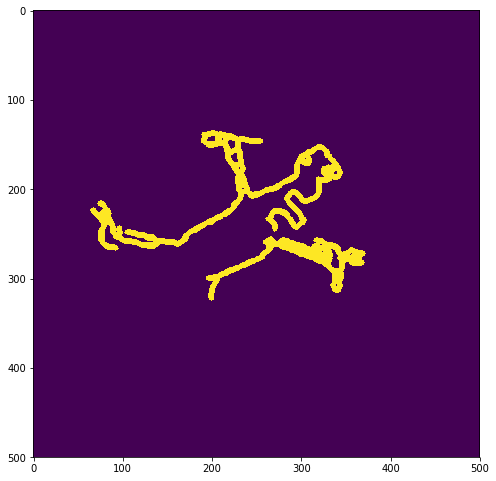

[75.0, 74.0, 73.0, 57.0, 50.0, 50.0, 50.0, 49.0, 46.0, 41.0, 40.0, 40.0, 38.0, 38.0, 34.0, 33.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.

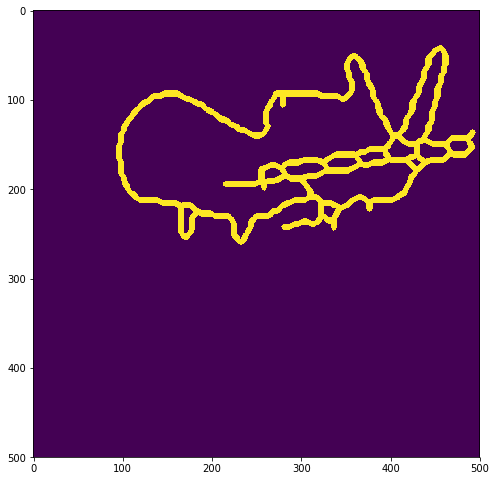

[64.0, 60.0, 51.0, 49.0, 47.0, 47.0, 45.0, 43.0, 40.0, 40.0, 40.0, 38.0, 37.0, 37.0, 36.0, 35.0, 34.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 30.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

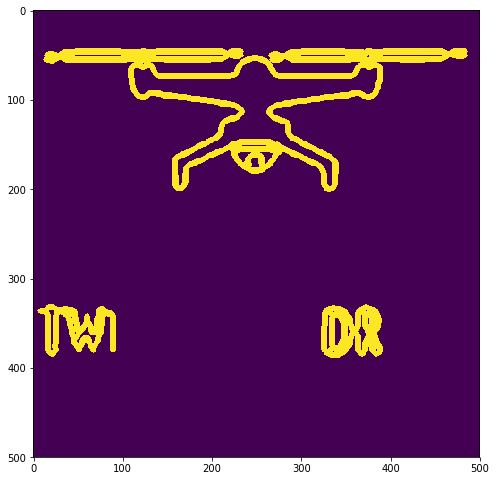

[58.0, 58.0, 58.0, 57.0, 57.0, 56.0, 56.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 48.0, 48.0, 48.0, 48.0, 47.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 38.0, 38.0, 37.0, 36.0, 36.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 29.0, 28.0, 28.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.

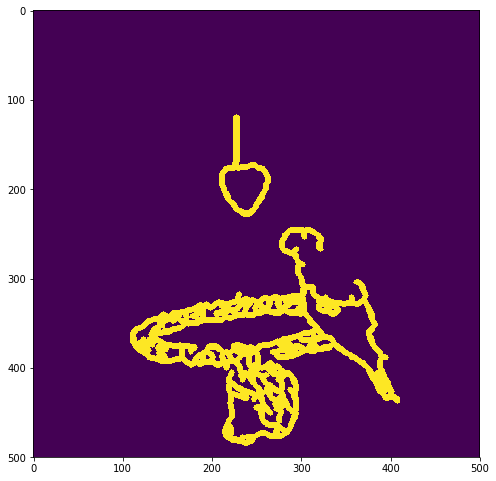

[83.0, 79.0, 79.0, 77.0, 64.0, 63.0, 62.0, 62.0, 62.0, 62.0, 61.0, 60.0, 60.0, 59.0, 58.0, 53.0, 53.0, 52.0, 51.0, 51.0, 51.0, 51.0, 50.0, 49.0, 48.0, 48.0, 47.0, 46.0, 45.0, 44.0, 44.0, 43.0, 43.0, 42.0, 41.0, 41.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 33.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.019992006393608, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 2

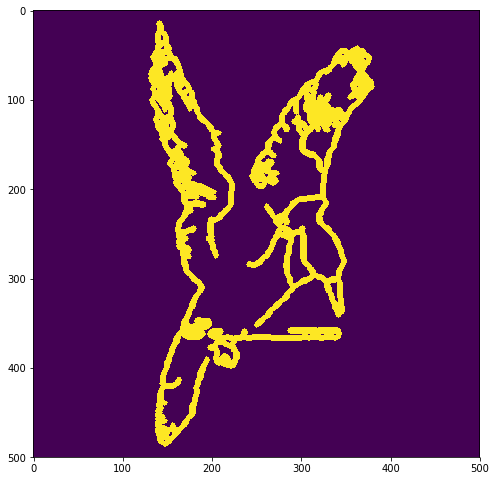

[94.0, 94.0, 91.0, 90.0, 81.0, 79.0, 74.0, 72.0, 70.0, 68.0, 67.0, 66.0, 66.0, 65.0, 65.0, 64.0, 64.0, 64.0, 63.0, 63.0, 62.0, 62.0, 61.0, 61.0, 61.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 58.0, 58.0, 57.0, 57.0, 57.0, 56.0, 56.0, 56.0, 53.0, 53.0, 52.0, 50.0, 50.0, 50.0, 47.0, 47.0, 46.0, 45.0, 45.0, 45.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 42.0, 42.0, 42.0, 42.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.

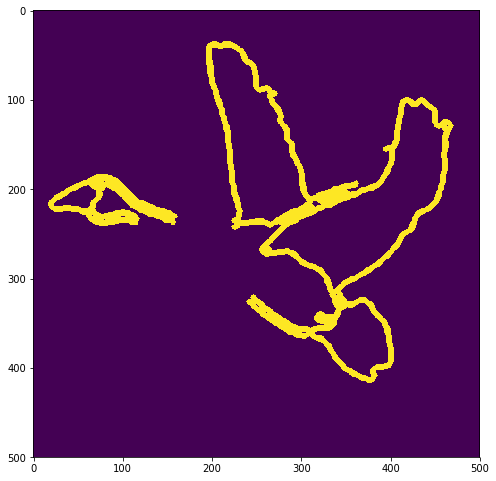

[73.0, 70.0, 66.0, 63.0, 63.0, 62.0, 61.0, 60.0, 57.0, 53.0, 51.0, 51.0, 51.0, 48.0, 48.0, 47.0, 46.0, 45.0, 43.0, 42.0, 42.0, 41.0, 40.0, 40.0, 37.0, 37.0, 37.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.

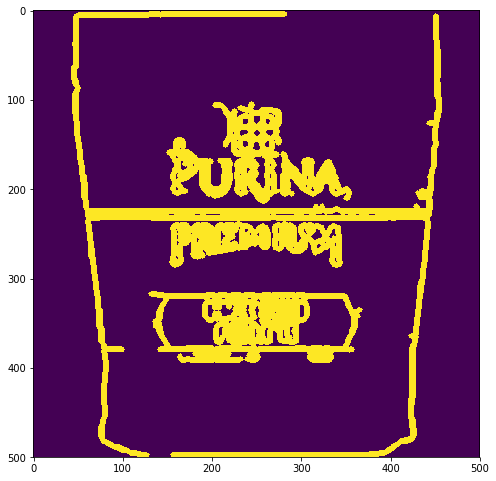

[171.0, 152.0, 149.0, 143.0, 130.0, 129.0, 128.0, 125.0, 121.0, 110.0, 109.0, 102.0, 102.0, 100.0, 98.0, 98.0, 96.0, 94.0, 94.0, 92.0, 91.0, 90.0, 90.0, 90.0, 88.0, 85.0, 84.0, 83.0, 80.0, 79.0, 79.0, 79.0, 78.0, 78.0, 78.0, 77.0, 76.0, 74.0, 72.0, 71.0, 69.0, 69.0, 68.0, 68.0, 67.0, 67.0, 66.0, 66.0, 66.0, 66.0, 66.0, 65.0, 65.0, 65.0, 65.0, 64.0, 64.0, 63.0, 63.0, 63.0, 63.0, 63.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 56.0, 56.0, 56.0, 56.0, 56.0, 56.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 54.0, 54.0, 54.0, 54.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0, 52.0, 52.0, 52.0, 51.0, 51.0, 51.0, 51.0, 51.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.01020301937138, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 47.010

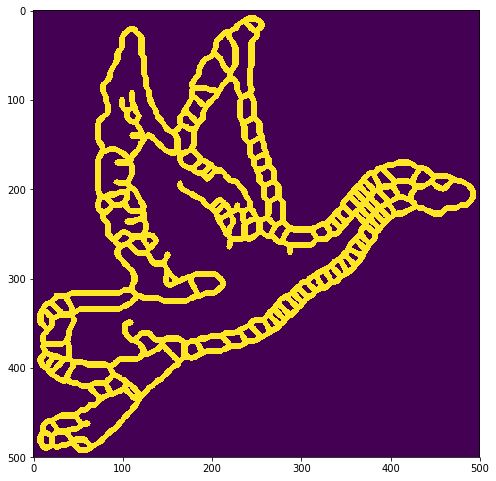

[115.0, 94.0, 93.0, 70.0, 69.0, 67.0, 65.0, 64.0, 61.0, 57.0, 57.0, 50.0, 50.0, 50.0, 49.0, 49.0, 49.0, 49.0, 49.0, 47.0, 47.0, 47.0, 46.0, 46.0, 44.01136216933077, 44.0, 44.0, 44.0, 44.0, 44.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43.0, 42.0, 41.0, 41.0, 40.0, 40.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 37.0, 37.0, 37.0, 37.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 34.0, 34.0, 33.0, 33.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 2

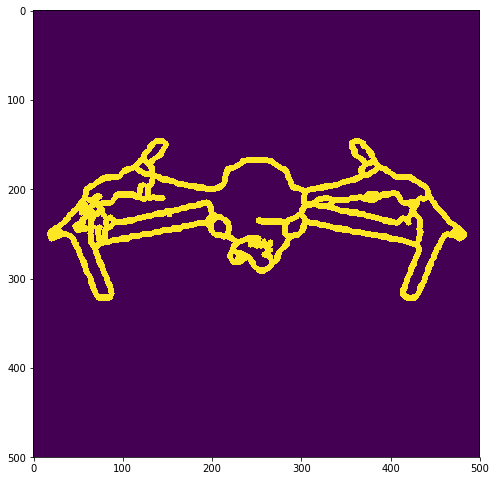

[60.0, 56.0, 55.0, 53.0, 52.0, 51.0, 49.0, 49.0, 47.0, 47.0, 46.0, 45.0, 44.0, 43.0, 41.0, 41.0, 39.0, 36.0, 35.0, 35.0, 35.0, 35.0, 34.0, 34.0, 34.0, 33.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 29.0, 29.0, 27.0, 26.0, 26.0, 26.0, 26.0, 25.0, 25.0, 25.0, 25.0, 25.0, 24.0, 24.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.

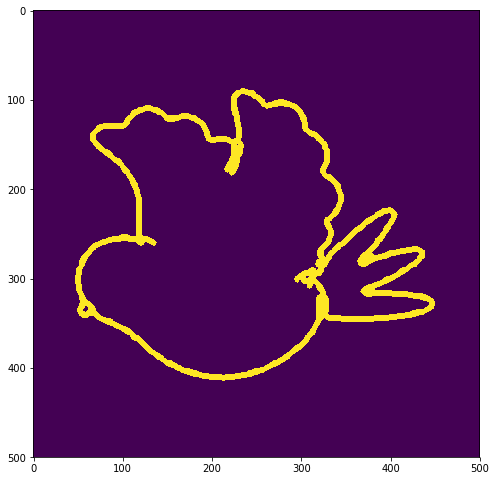

[89.0, 68.0, 67.0, 65.0, 64.0, 64.0, 62.0, 62.0, 57.0, 54.0, 53.0, 49.0, 44.0, 43.0, 42.0, 41.0, 41.0, 41.0, 41.0, 40.0, 40.0, 40.0, 39.0, 39.0, 39.0, 38.0, 38.0, 38.0, 36.0, 36.0, 35.0, 35.0, 35.0, 34.0, 34.0, 33.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 31.0, 31.0, 31.0, 29.0, 29.0, 29.0, 28.0, 27.0, 27.0, 26.0, 26.0, 25.0, 25.0, 24.0, 24.0, 23.0, 22.0, 22.0, 22.0, 22.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.

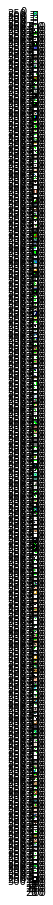

In [9]:
import cv2
import numpy as np

features = []
lined = []
for i, edge in enumerate(edges):
#     plot_images([images[0]])
    img = cv2.imread(imageNames[i][0])
    img = cv2.resize(img, dsize=(500, 500), interpolation=cv2.INTER_CUBIC)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     edges = cv2.Canny(gray,50,150,apertureSize = 3)
#     edges = morphology.remove_small_objects(edges, 300)
    edge = np.array(edge, dtype=np.uint8)
    edge = cv2.resize(edge, dsize=(500, 500), interpolation=cv2.INTER_NEAREST)
    edge = np.array(edge, dtype=np.uint8)
    edge = morphology.thin(edge)
    edge = morphology.dilation(edge, morphology.disk(3))
    plot_images([edge])
    minLineLength = 200
    maxLineGap = 0
    edge = np.array(edge, dtype=np.uint8)
    
    lines = cv2.HoughLinesP(edge,0.01,np.pi/720,1,minLineLength,maxLineGap)
    lineLen = 0
    distances = []
    if type(lines) != type(None):
        for line in lines:
            for x1,y1,x2,y2 in line:
                distances.append(np.sqrt((x2 - x1)**2 + (y2 - y1)**2))
                cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

    lined.append(img)
    distances.sort(reverse=True)
    features.append(distances)
    print(distances)

plot_images(lined)


In [10]:
# import cv2
# import numpy as np

# feature1 = []

# for i, image in enumerate(images):
# #     plot_images([images[0]])
#     img = cv2.imread(imageNames[i])
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     edges = cv2.Canny(gray,50,150,apertureSize = 3)
# #     edges = morphology.remove_small_objects(edges, 300)
#     edges = morphology.dilation(edges, morphology.disk(1))
#     plot_images([edges])
#     minLineLength = 100
#     maxLineGap = 10
#     lines = cv2.HoughLinesP(edges,0.01,np.pi/720,1,minLineLength,maxLineGap)
#     if type(lines) != type(None):
#         for line in lines:
#             for x1,y1,x2,y2 in line:
#                 cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

#     feature1.append(img)

# plot_images(feature1)


## Plot feature space


In [ ]:
import copy

birdsX, birdsY = [], []
dronesX, dronesY = [], []
birdMarker = 'o'
droneMarker = 'x'


for i, feature in enumerate(features):
#     print(feature[0])
    if len(feature) <= 1:
        continue
    f = copy.deepcopy(feature)
    f = [x for x in f if x > 20]
#     print(f)
    s = sum(f)
    if imageNames[i][1] == 'birds':
        plt.plot(s, sum(feature[:2]) * s, 'r' + birdMarker, alpha=0.6)
    if imageNames[i][1] == 'drones':
        plt.plot(s, sum(feature[:2]) * s, 'b' + birdMarker, alpha=0.6)
# plt.legend(numpoints=1)
# plt.xlim(0, 1.8);
plt.show()